# CO2MPAS miracles

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Vehicle parameters

In [2]:
vehicle_inputs = {
    'alternator_efficiency': 0.67,
    'alternator_nominal_voltage': 13.9986805652547,
    'battery_capacity': 80.0,
    'engine_capacity': 1560.0,
    'engine_fuel_lower_heating_value': 44000.0,
    'engine_has_cylinder_deactivation': False,
    'engine_has_direct_injection': False,
    'engine_has_variable_valve_actuation': False,
    'engine_idle_fuel_consumption': 0.075,
    'engine_is_turbo': True,
    'engine_max_power': 82.1,
    'engine_max_speed': 3900.0,
    'engine_max_speed_at_max_power': 3500.0,
    'engine_max_torque': 280.0,
    'engine_stroke': 85.3,
    'final_drive_ratio': 3.7368,
    'fuel_carbon_content': 3.1808,
    'fuel_type': 'diesel',
    'gear_box_ratios': {
        1: 3.538,
        2: 1.92,
        3: 1.281,
        4: 0.907,
        5: 0.673,
        6: 0.561
    },
    'gear_box_type': 'manual',
    'has_energy_recuperation': True,
    'has_exhausted_gas_recirculation': False,
    'has_lean_burn': False,
    'has_nox_storage_catalyst': False,
    'has_particle_filter': False,
    'has_start_stop': True,
    'has_thermal_management': False,
    'idle_engine_speed_median': 700.0,
    'r_dynamic': 0.322,
}

## WLTP preconditioning cycle parameters

In [3]:
wltp_precondition_inputs = {
    'cycle_name': 'WLTP-Precon',
    'cycle_type': 'WLTP',
}

wltp_precondition_inputs.update(vehicle_inputs)

## WLTP-high cycle parameters

In [4]:
wltp_h_inputs = {
    'co2_emission_low': 155.425725711988,
    'co2_emission_medium': 124.662458369878,
    'co2_emission_high': 113.766237450389,
    'co2_emission_extra_high': 145.642429076347,
    'cycle_name': 'WLTP-H',
    'cycle_type': 'WLTP',
    'f0': 140.0,
    'f1': 0.55,
    'f2': 0.032,
    'initial_state_of_charge': 80.0,
    'vehicle_mass': 1520.0,
}

wltp_h_inputs.update(vehicle_inputs)

## WLTP-high cycle time series

In [5]:
wltp_h_series_csv = """
alternator_currents, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -56.768, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -44.603, 0, 0, 0, 0, 0, 0, -56.768, -44.603, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -18.247, -85.151, 0, 0, 0, 0, 0, -4.055, -99.343, -2.027, -101.371, -101.371, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -30.411, -101.371, -101.371, -70.959, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -28.384, -101.371, -101.371, -72.987, 0, 0, 0, 0, 0, 0, 0, 0, -28.384, -101.371, -101.371, -72.987, -28.384, -72.987, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -22.302, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -62.85, 0, 0, 0, -30.411, -101.371, -101.371, -77.042, 0, 0, 0, 0, 0, 0, -12.164, -91.234, -8.11, -95.288, -4.055, -101.371, -101.371, 0, 0, 0, 0, 0, 0, 0, 0, -85.151, -101.371, -20.274, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -24.329, -79.069, -20.274, -83.124, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -99.343, -101.371, -101.371, -8.11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -44.603, -58.795, -40.548, -62.85, -36.493, -66.905, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -81.097, -101.371, -101.371, -101.371, -101.371, -26.356, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -18.247, -85.151, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -83.124, -20.274, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -56.768, -44.603, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -60.822, -42.576, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -99.343, -101.371, -6.082, -95.288, -101.371, -101.371, -101.371, -14.192, -85.151, -101.371, -101.371, -101.371, -22.302, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -52.713, -101.371, -101.371, -101.371, -101.371, -56.768, -42.576, -60.822, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -16.219, -101.371, -101.371, -89.206, 0, 0, 0, 0, 0, 0, -101.371, -2.027, 0, 0, 0, 0, 0, 0, -89.206, -101.371, -14.192, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -18.247, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -95.288, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -62.85, -101.371, -101.371, -101.371, -101.371, -101.371, -48.658, 0, 0, 0, 0, 0, 0, 0, 0, -34.466, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -85.151, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -10.137, -101.371, -95.288, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -85.151, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -54.74, 0, 0, 0, 0, 0, 0, 0, -30.411, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -85.151, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -81.097, -101.371, -101.371, -101.371, -101.371, -101.371, -32.439, -68.932, -101.371, -101.371, -38.521, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -22.302, -101.371, -83.124, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -93.261, -101.371, -12.164, 0, 0, 0, 0, 0, 0, 0, -72.987, -30.411, 0, 0, 0, 0, 0, 0, 0, -60.822, -42.576, 0, 0, 0, -50.685, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -77.042, 0, 0, 0, 0, 0, 0, 0, 0, 0, -14.192, -101.371, -87.179, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -26.356, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -97.316, 0, 0, 0, 0, 0, -95.288, -101.371, -10.137, 0, 0, 0, 0, -81.097, -101.371, -22.302, -77.042, -101.371, -101.371, -101.371, -30.411, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -44.603, -58.795, -40.548, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -68.932, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -12.164, -101.371, -91.234, 0, 0, 0, 0, 0, 0, -6.082, -101.371, -101.371, -101.371, -101.371, -101.371, 0, 0, 0, 0, 0, -91.234, -12.164, 0, 0, 0, 0, -81.097, -22.302, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -38.521, -101.371, -101.371, -101.371, -101.371, -72.987, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -97.316, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -48.658, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -38.521, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -87.179, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -66.905, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -75.014, -24.329, -79.069, -20.274, -101.371, -83.124, 0, 0, 0, 0, 0, 0, 0, 0
battery_currents, -87.978, -213.094, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 35.333, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 23.17, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 35.333, 23.17, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -3.182, 63.712, -21.426, -21.426, -21.426, -21.426, -21.426, -17.372, 77.902, -19.399, 79.929, 79.929, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -197.122, -41.392, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 8.98, 79.929, 79.929, 49.522, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 6.953, 79.929, 79.929, 51.549, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 6.953, 79.929, 79.929, 51.549, 6.953, 51.549, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 0.872, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 41.414, -21.426, -21.426, -21.426, 8.98, 79.929, 79.929, 55.604, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -9.264, 69.793, -13.318, 73.847, -17.372, 79.929, 79.929, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 63.712, 79.929, -1.155, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 2.899, 57.631, -1.155, 61.685, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 77.902, 79.929, 79.929, -13.318, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -49.378, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 23.17, 37.36, 19.116, 41.414, 15.061, 45.468, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 59.658, 79.929, 79.929, 79.929, 79.929, 4.926, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -49.378, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -3.182, 63.712, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -49.378, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 61.685, -1.155, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 35.333, 23.17, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -49.378, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 39.387, 21.143, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 77.902, 79.929, -15.345, 73.847, 79.929, 79.929, 79.929, -7.237, 63.712, 79.929, 79.929, 79.929, 0.872, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 31.278, 79.929, 79.929, 79.929, 79.929, 35.333, 21.143, 39.387, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -5.21, 79.929, 79.929, 67.766, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 79.929, -19.399, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 67.766, 79.929, -7.237, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -3.182, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 73.847, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 41.414, 79.929, 79.929, 79.929, 79.929, 79.929, 27.224, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 13.034, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 63.712, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -11.291, 79.929, 73.847, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 63.712, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 33.305, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 8.98, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 63.712, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -49.378, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 59.658, 79.929, 79.929, 79.929, 79.929, 79.929, 11.007, 47.495, 79.929, 79.929, 17.089, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 0.872, 79.929, 61.685, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 71.82, 79.929, -9.264, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 51.549, 8.98, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 39.387, 21.143, -21.426, -21.426, -21.426, 29.251, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 55.604, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -7.237, 79.929, 65.739, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 4.926, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 75.875, -21.426, -21.426, -21.426, -21.426, -21.426, 73.847, 79.929, -11.291, -21.426, -21.426, -21.426, -21.426, 59.658, 79.929, 0.872, 55.604, 79.929, 79.929, 79.929, 8.98, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 23.17, 37.36, 19.116, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 47.495, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -9.264, 79.929, 69.793, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -15.345, 79.929, 79.929, 79.929, 79.929, 79.929, -21.426, -21.426, -21.426, -21.426, -21.426, 69.793, -9.264, -21.426, -21.426, -21.426, -21.426, 59.658, 0.872, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -49.378, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 17.089, 79.929, 79.929, 79.929, 79.929, 51.549, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 75.875, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 27.224, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 17.089, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 65.739, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 45.468, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 53.576, 2.899, 57.631, -1.155, 79.929, 61.685, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426
engine_coolant_temperatures, 23, 23.028, 23.08, 23.132, 23.185, 23.237, 23.289, 23.341, 23.393, 23.445, 23.497, 23.549, 23.601, 23.657, 23.731, 23.832, 23.979, 24.175, 24.37, 24.642, 24.9, 25.072, 25.186, 25.277, 25.376, 25.498, 25.661, 25.838, 26.08, 26.355, 26.638, 26.846, 27.011, 27.162, 27.301, 27.428, 27.527, 27.577, 27.577, 27.576, 27.575, 27.574, 27.573, 27.572, 27.578, 27.615, 27.679, 27.743, 27.8, 27.854, 27.917, 27.982, 28.026, 28.054, 28.088, 28.137, 28.188, 28.242, 28.298, 28.356, 28.427, 28.518, 28.59, 28.662, 28.736, 28.822, 28.903, 28.979, 29.077, 29.236, 29.455, 29.717, 29.937, 30.156, 30.341, 30.497, 30.652, 30.819, 30.987, 31.133, 31.243, 31.33, 31.393, 31.457, 31.556, 31.636, 31.707, 31.778, 31.849, 31.889, 31.887, 31.886, 31.884, 31.882, 31.901, 31.945, 31.989, 32.033, 32.072, 32.077, 32.075, 32.073, 32.071, 32.069, 32.066, 32.064, 32.062, 32.06, 32.058, 32.056, 32.054, 32.052, 32.05, 32.048, 32.046, 32.044, 32.042, 32.04, 32.038, 32.036, 32.034, 32.032, 32.03, 32.028, 32.026, 32.024, 32.022, 32.02, 32.018, 32.016, 32.014, 32.012, 32.01, 32.008, 32.006, 32.004, 32.002, 32, 31.998, 32.052, 32.13, 32.241, 32.444, 32.608, 32.724, 32.825, 32.945, 33.115, 33.316, 33.51, 33.673, 33.796, 33.849, 33.846, 33.844, 33.842, 33.866, 33.912, 33.973, 34.073, 34.229, 34.412, 34.607, 34.789, 34.982, 35.133, 35.27, 35.402, 35.562, 35.769, 35.957, 36.072, 36.109, 36.106, 36.103, 36.137, 36.205, 36.306, 36.455, 36.594, 36.707, 36.789, 36.853, 36.905, 36.925, 36.932, 36.933, 36.95, 36.961, 36.991, 37.029, 37.061, 37.097, 37.137, 37.177, 37.218, 37.262, 37.308, 37.355, 37.405, 37.458, 37.514, 37.579, 37.654, 37.76, 37.898, 38.053, 38.249, 38.476, 38.657, 38.878, 39.142, 39.365, 39.513, 39.658, 39.825, 40.033, 40.284, 40.552, 40.807, 41.034, 41.229, 41.394, 41.498, 41.604, 41.725, 41.858, 42.015, 42.187, 42.358, 42.519, 42.663, 42.778, 42.851, 42.86, 42.855, 42.868, 42.93, 43.006, 43.058, 43.06, 43.055, 43.051, 43.046, 43.044, 43.041, 43.036, 43.032, 43.044, 43.074, 43.133, 43.196, 43.251, 43.306, 43.37, 43.439, 43.491, 43.531, 43.588, 43.699, 43.865, 44.051, 44.249, 44.475, 44.696, 45.023, 45.358, 45.639, 45.831, 46.07, 46.307, 46.5, 46.601, 46.675, 46.726, 46.723, 46.718, 46.714, 46.709, 46.703, 46.701, 46.722, 46.826, 47.053, 47.337, 47.588, 47.92, 48.258, 48.611, 48.99, 49.288, 49.518, 49.647, 49.707, 49.755, 49.813, 49.889, 49.989, 50.105, 50.23, 50.345, 50.431, 50.492, 50.538, 50.572, 50.593, 50.587, 50.602, 50.64, 50.686, 50.737, 50.782, 50.82, 50.854, 50.876, 50.896, 50.909, 50.926, 50.946, 50.939, 50.933, 50.948, 51.007, 51.07, 51.136, 51.192, 51.253, 51.317, 51.374, 51.402, 51.395, 51.411, 51.448, 51.484, 51.516, 51.549, 51.579, 51.611, 51.649, 51.696, 51.77, 51.9, 52.071, 52.216, 52.306, 52.384, 52.472, 52.566, 52.653, 52.749, 52.847, 52.917, 52.966, 53.013, 53.06, 53.109, 53.161, 53.218, 53.27, 53.304, 53.326, 53.336, 53.362, 53.403, 53.444, 53.491, 53.544, 53.602, 53.673, 53.766, 53.867, 53.949, 54.01, 54.031, 54.024, 54.017, 54.021, 54.048, 54.076, 54.104, 54.132, 54.159, 54.187, 54.215, 54.24, 54.24, 54.233, 54.226, 54.219, 54.212, 54.205, 54.198, 54.191, 54.231, 54.286, 54.343, 54.431, 54.587, 54.741, 54.925, 55.085, 55.182, 55.242, 55.271, 55.298, 55.303, 55.329, 55.337, 55.355, 55.37, 55.392, 55.424, 55.462, 55.502, 55.545, 55.593, 55.658, 55.735, 55.804, 55.853, 55.885, 55.907, 55.932, 55.969, 56.017, 56.089, 56.218, 56.442, 56.734, 56.945, 57.056, 57.109, 57.141, 57.172, 57.212, 57.256, 57.286, 57.296, 57.288, 57.28, 57.273, 57.296, 57.323, 57.343, 57.338, 57.331, 57.323, 57.315, 57.308, 57.3, 57.292, 57.285, 57.277, 57.269, 57.262, 57.254, 57.246, 57.239, 57.231, 57.223, 57.216, 57.208, 57.2, 57.193, 57.185, 57.177, 57.17, 57.162, 57.154, 57.147, 57.139, 57.131, 57.124, 57.116, 57.108, 57.101, 57.093, 57.086, 57.078, 57.07, 57.063, 57.055, 57.047, 57.04, 57.032, 57.025, 57.017, 57.009, 57.002, 56.994, 56.986, 56.979, 56.971, 56.964, 56.956, 56.948, 56.941, 56.933, 56.926, 56.918, 56.91, 56.903, 56.895, 56.888, 56.88, 56.873, 56.865, 56.857, 56.85, 56.842, 56.835, 56.827, 56.819, 56.86, 56.922, 57.008, 57.179, 57.339, 57.468, 57.546, 57.593, 57.627, 57.653, 57.665, 57.671, 57.672, 57.693, 57.718, 57.742, 57.741, 57.733, 57.725, 57.717, 57.709, 57.747, 57.794, 57.838, 57.885, 57.977, 58.176, 58.379, 58.539, 58.628, 58.686, 58.736, 58.771, 58.78, 58.782, 58.786, 58.805, 58.826, 58.848, 58.872, 58.897, 58.92, 58.946, 58.976, 59.009, 59.047, 59.089, 59.147, 59.217, 59.263, 59.302, 59.328, 59.341, 59.364, 59.385, 59.382, 59.374, 59.366, 59.357, 59.349, 59.341, 59.333, 59.325, 59.317, 59.309, 59.3, 59.292, 59.284, 59.276, 59.268, 59.26, 59.252, 59.244, 59.235, 59.227, 59.219, 59.211, 59.203, 59.195, 59.187, 59.179, 59.171, 59.163, 59.154, 59.146, 59.138, 59.13, 59.122, 59.158, 59.201, 59.243, 59.3, 59.419, 59.635, 59.865, 60.162, 60.491, 60.76, 61.091, 61.46, 61.728, 61.907, 61.998, 62.058, 62.119, 62.173, 62.214, 62.238, 62.265, 62.295, 62.338, 62.4, 62.485, 62.591, 62.693, 62.774, 62.84, 62.906, 62.989, 63.109, 63.26, 63.434, 63.623, 63.801, 63.946, 64.048, 64.126, 64.197, 64.266, 64.356, 64.457, 64.615, 64.773, 64.887, 64.998, 65.109, 65.216, 65.303, 65.358, 65.367, 65.357, 65.347, 65.337, 65.327, 65.317, 65.307, 65.297, 65.288, 65.278, 65.268, 65.258, 65.254, 65.27, 65.296, 65.336, 65.434, 65.647, 65.893, 66.173, 66.377, 66.534, 66.706, 66.888, 67.034, 67.117, 67.163, 67.165, 67.155, 67.145, 67.134, 67.139, 67.139, 67.164, 67.236, 67.365, 67.505, 67.652, 67.78, 67.883, 67.948, 68.008, 68.088, 68.172, 68.225, 68.232, 68.222, 68.211, 68.223, 68.255, 68.29, 68.33, 68.372, 68.404, 68.41, 68.4, 68.392, 68.406, 68.432, 68.502, 68.659, 68.797, 68.846, 68.856, 68.846, 68.852, 68.873, 68.902, 68.96, 69.063, 69.169, 69.273, 69.375, 69.498, 69.68, 69.954, 70.219, 70.444, 70.636, 70.739, 70.795, 70.852, 70.912, 70.977, 71.049, 71.13, 71.216, 71.286, 71.372, 71.509, 71.643, 71.745, 71.813, 71.876, 71.938, 72.012, 72.109, 72.227, 72.343, 72.43, 72.494, 72.547, 72.584, 72.607, 72.613, 72.603, 72.592, 72.58, 72.602, 72.603, 72.592, 72.58, 72.58, 72.602, 72.656, 72.768, 72.909, 73.074, 73.292, 73.607, 73.91, 74.276, 74.645, 74.908, 75.271, 75.615, 75.82, 76.044, 76.277, 76.46, 76.594, 76.692, 76.737, 76.781, 76.859, 76.96, 77.037, 77.074, 77.097, 77.129, 77.178, 77.212, 77.178, 77.103, 77.032, 76.963, 76.896, 76.83, 76.782, 76.757, 76.766, 76.864, 77.116, 77.438, 77.662, 77.735, 77.728, 77.671, 77.593, 77.507, 77.423, 77.343, 77.265, 77.218, 77.157, 77.086, 77.017, 76.968, 76.95, 76.984, 77.088, 77.21, 77.294, 77.394, 77.486, 77.578, 77.666, 77.773, 77.872, 78.023, 78.16, 78.211, 78.211, 78.212, 78.218, 78.219, 78.225, 78.253, 78.289, 78.32, 78.327, 78.384, 78.467, 78.504, 78.496, 78.476, 78.464, 78.485, 78.564, 78.672, 78.736, 78.763, 78.786, 78.804, 78.801, 78.777, 78.78, 78.866, 78.98, 79.054, 79.122, 79.296, 79.447, 79.54, 79.591, 79.658, 79.796, 79.935, 79.963, 79.905, 79.821, 79.73, 79.637, 79.532, 79.405, 79.261, 79.137, 79.047, 78.986, 78.934, 78.836, 78.746, 78.71, 78.695, 78.694, 78.706, 78.71, 78.695, 78.655, 78.603, 78.528, 78.433, 78.329, 78.241, 78.172, 78.146, 78.147, 78.159, 78.159, 78.136, 78.083, 77.996, 77.897, 77.802, 77.71, 77.637, 77.601, 77.61, 77.718, 77.969, 78.278, 78.52, 78.637, 78.806, 78.966, 79.06, 79.123, 79.095, 79.079, 79.108, 79.223, 79.414, 79.577, 79.619, 79.501, 79.373, 79.278, 79.194, 79.127, 79.069, 79.016, 78.958, 78.893, 78.807, 78.716, 78.636, 78.571, 78.512, 78.455, 78.399, 78.363, 78.342, 78.326, 78.318, 78.319, 78.342, 78.408, 78.47, 78.488, 78.451, 78.358, 78.248, 78.142, 78.041, 77.968, 77.883, 77.802, 77.778, 77.858, 78.077, 78.427, 78.731, 79.018, 79.229, 79.293, 79.282, 79.224, 79.152, 79.066, 78.954, 78.826, 78.703, 78.585, 78.481, 78.375, 78.269, 78.166, 78.07, 77.997, 77.93, 77.866, 77.803, 77.743, 77.675, 77.592, 77.511, 77.433, 77.357, 77.282, 77.21, 77.14, 77.072, 77.005, 76.941, 76.878, 76.817, 76.757, 76.7, 76.643, 76.589, 76.536, 76.484, 76.433, 76.384, 76.337, 76.29, 76.245, 76.201, 76.158, 76.116, 76.076, 76.036, 75.998, 75.961, 75.924, 75.889, 75.854, 75.82, 75.788, 75.756, 75.725, 75.695, 75.665, 75.636, 75.609, 75.581, 75.604, 75.65, 75.747, 75.94, 76.104, 76.281, 76.473, 76.622, 76.794, 76.946, 77.032, 77.143, 77.308, 77.497, 77.681, 77.825, 77.901, 77.922, 77.915, 77.907, 77.906, 77.896, 77.859, 77.785, 77.693, 77.604, 77.518, 77.435, 77.354, 77.288, 77.217, 77.144, 77.074, 77.006, 76.957, 76.934, 76.933, 76.957, 77.058, 77.156, 77.217, 77.233, 77.247, 77.303, 77.371, 77.513, 77.731, 78.019, 78.364, 78.713, 78.948, 79.17, 79.373, 79.481, 79.534, 79.498, 79.384, 79.242, 79.121, 79.04, 78.989, 78.952, 78.914, 78.871, 78.835, 78.838, 78.919, 79.053, 79.145, 79.164, 79.123, 79.029, 78.899, 78.771, 78.667, 78.609, 78.636, 78.785, 78.996, 79.123, 79.131, 79.063, 78.946, 78.833, 78.757, 78.794, 78.975, 79.261, 79.447, 79.537, 79.517, 79.415, 79.283, 79.157, 79.056, 78.964, 78.853, 78.728, 78.606, 78.488, 78.375, 78.266, 78.161, 78.06, 77.962, 77.868, 77.776, 77.688, 77.602, 77.531, 77.474, 77.427, 77.389, 77.356, 77.333, 77.341, 77.403, 77.474, 77.493, 77.45, 77.372, 77.295, 77.233, 77.188, 77.15, 77.147, 77.21, 77.362, 77.517, 77.683, 77.878, 78.044, 78.253, 78.44, 78.568, 78.731, 78.885, 79.036, 79.172, 79.255, 79.363, 79.498, 79.619, 79.729, 79.816, 79.916, 79.956, 80.033, 80.159, 80.244, 80.325, 80.404, 80.468, 80.509, 80.547, 80.588, 80.638, 80.702, 80.762, 80.799, 80.832, 80.884, 80.936, 80.995, 81.058, 81.129, 81.173, 81.209, 81.236, 81.269, 81.315, 81.361, 81.412, 81.487, 81.551, 81.626, 81.688, 81.724, 81.764, 81.795, 81.837, 81.898, 81.952, 82.007, 82.057, 82.098, 82.139, 82.18, 82.239, 82.318, 82.363, 82.395, 82.425, 82.457, 82.485, 82.503, 82.525, 82.553, 82.578, 82.608, 82.63, 82.655, 82.686, 82.714, 82.746, 82.774, 82.808, 82.832, 82.86, 82.895, 82.925, 82.96, 82.992, 83.033, 83.076, 83.119, 83.158, 83.187, 83.209, 83.221, 83.232, 83.238, 83.238, 83.247, 83.259, 83.265, 83.26, 83.253, 83.246, 83.234, 83.205, 83.164, 83.117, 83.068, 83.039, 83.017, 83, 82.978, 82.96, 82.931, 82.906, 82.896, 82.892, 82.884, 82.875, 82.845, 82.799, 82.719, 82.619, 82.506, 82.399, 82.296, 82.197, 82.095, 81.998, 81.898, 81.79, 81.68, 81.57, 81.462, 81.361, 81.259, 81.157, 81.055, 80.951, 80.847, 80.742, 80.637, 80.533, 80.443, 80.369, 80.297, 80.224, 80.15, 80.076, 80.001, 79.927, 79.855, 79.772, 79.684, 79.643, 79.611, 79.574, 79.542, 79.503, 79.46, 79.407, 79.35, 79.297, 79.232, 79.151, 79.081, 79.033, 79.043, 79.107, 79.23, 79.411, 79.64, 79.838, 79.956, 79.988, 79.973, 79.938, 79.904, 79.874, 79.842, 79.797, 79.736, 79.675, 79.623, 79.589, 79.562, 79.544, 79.532, 79.529, 79.539, 79.577, 79.62, 79.658, 79.677, 79.672, 79.648, 79.59, 79.488, 79.354, 79.209, 79.069, 78.933, 78.803, 78.676, 78.554, 78.436, 78.322, 78.212, 78.106, 78.029, 78.02, 78.096, 78.224, 78.284, 78.262, 78.175, 78.07, 77.985, 77.934, 77.914, 77.89, 77.832, 77.741, 77.65, 77.563, 77.479, 77.397, 77.318, 77.242, 77.22, 77.33, 77.503, 77.604, 77.636, 77.684, 77.813, 78.044, 78.332, 78.529, 78.682, 78.75, 78.744, 78.702, 78.644, 78.57, 78.482, 78.394, 78.289, 78.182, 78.078, 77.978, 77.882, 77.799, 77.713, 77.656, 77.638, 77.631, 77.617, 77.596, 77.57, 77.548, 77.556, 77.586, 77.724, 77.931, 78.112, 78.2, 78.185, 78.105, 78.005, 77.927, 77.885, 77.894, 78.001, 78.158, 78.237, 78.224, 78.148, 78.047, 77.949, 77.854, 77.764, 77.691, 77.649, 77.634, 77.633, 77.614, 77.577, 77.523, 77.468, 77.415, 77.378, 77.35, 77.315, 77.256, 77.191, 77.147, 77.103, 77.041, 76.975, 76.912, 76.85, 76.789, 76.731, 76.674, 76.618, 76.564, 76.512, 76.46, 76.411, 76.362, 76.315, 76.269, 76.225, 76.181, 76.139, 76.098, 76.058, 76.019, 75.981, 75.944, 75.908, 75.873, 75.839, 75.805, 75.818, 75.84, 75.854, 75.865, 75.88, 75.899, 75.921, 75.935, 75.953, 75.992, 76.06, 76.161, 76.302, 76.479, 76.633, 76.834, 77.049, 77.196, 77.374, 77.553, 77.693, 77.792, 77.855, 77.896, 77.933, 77.964, 77.998, 78.027, 78.05, 78.078, 78.116, 78.169, 78.25, 78.374, 78.547, 78.766, 78.943, 79.191, 79.419, 79.507, 79.595, 79.679, 79.729, 79.74, 79.722, 79.663, 79.563, 79.42, 79.274, 79.133, 78.997, 78.866, 78.749, 78.652, 78.578, 78.544, 78.595, 78.719, 78.924, 79.197, 79.521, 79.884, 80.276, 80.701, 81.039, 81.447, 81.78, 81.932, 82.054, 82.143, 82.208, 82.282, 82.369, 82.48, 82.602, 82.732, 82.859, 83.004, 83.174, 83.375, 83.607, 83.884, 84.185, 84.495, 84.813, 85.136, 85.41, 85.622, 85.792, 85.924, 86, 86.047, 86.078, 86.096, 86.103, 86.092, 86.049, 85.973, 85.869, 85.748, 85.626, 85.514, 85.421, 85.338, 85.274, 85.199, 85.124, 85.051, 84.978, 84.896, 84.816, 84.756, 84.724, 84.717, 84.734, 84.763, 84.814, 84.853, 84.864, 84.851, 84.799, 84.743, 84.669, 84.58, 84.499, 84.448, 84.425, 84.431, 84.472, 84.525, 84.599, 84.685, 84.788, 84.892, 85.023, 85.156, 85.283, 85.399, 85.512, 85.622, 85.724, 85.805, 85.843, 85.856, 85.844, 85.793, 85.692, 85.567, 85.41, 85.213, 85.025, 84.833, 84.622, 84.445, 84.326, 84.277, 84.31, 84.376, 84.448, 84.495, 84.509, 84.5, 84.482, 84.483, 84.524, 84.625, 84.791, 85, 85.214, 85.396, 85.56, 85.702, 85.812, 85.884, 85.912, 85.921, 85.915, 85.9, 85.892, 85.891, 85.895, 85.903, 85.912, 85.92, 85.925, 85.936, 85.938, 85.934, 85.923, 85.897, 85.872, 85.843, 85.817, 85.778, 85.722, 85.674, 85.636, 85.599, 85.566, 85.524, 85.474, 85.425, 85.388, 85.373, 85.392, 85.431, 85.497, 85.576, 85.636, 85.681, 85.7, 85.687, 85.67, 85.647, 85.63, 85.619, 85.612, 85.608, 85.606, 85.605, 85.599, 85.578, 85.544, 85.505, 85.476, 85.448, 85.421, 85.412, 85.406, 85.407, 85.418, 85.427, 85.445, 85.48, 85.514, 85.558, 85.605, 85.649, 85.697, 85.741, 85.788, 85.831, 85.87, 85.885, 85.869, 85.823, 85.764, 85.671, 85.528, 85.343, 85.138, 84.931, 84.716, 84.504, 84.294, 84.086, 83.881, 83.677, 83.476, 83.276, 83.079, 82.884, 82.69, 82.521, 82.379, 82.238, 82.107, 81.981, 81.855, 81.733, 81.623, 81.521, 81.437, 81.362, 81.286, 81.208, 81.129, 81.049, 80.968, 80.883, 80.792, 80.704, 80.608, 80.511, 80.413, 80.314, 80.212, 80.099, 79.967, 79.816, 79.656, 79.502, 79.353, 79.209, 79.071, 78.939, 78.811, 78.686, 78.566, 78.451, 78.34, 78.231, 78.127, 78.026, 77.928, 77.834, 77.743, 77.655, 77.579, 77.507, 77.445, 77.376, 77.3, 77.232, 77.189, 77.145, 77.101, 77.038, 76.972, 76.908, 76.847, 76.786
engine_speeds_out, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750.014, 757.771, 757.706, 831.756, 1244.753, 1647.476, 1257.986, 1387.903, 1580.759, 1646.92, 1213.109, 1136.874, 1150.351, 1182.021, 1239.98, 1302.378, 1396.46, 1497.811, 1592.252, 1250.97, 1201.837, 1222.166, 1237.201, 1246.274, 1244.178, 1220.015, 1156.773, 1074.833, 1321.716, 1307.645, 1198.378, 1056.816, 1264.112, 1235.345, 1191.837, 1159.117, 1105.794, 1056.835, 1039.109, 1032.45, 973.535, 835.533, 750.012, 763.029, 779.036, 786.325, 790.846, 793.208, 808.296, 883.496, 923.83, 952.715, 984.833, 1034.019, 1066.304, 1083.424, 1141.476, 1284.862, 1475.009, 1673.817, 1316.215, 1321.58, 1384.132, 1424.176, 1460.61, 1501.211, 1538.944, 1559.408, 1553.994, 1532.505, 1498.538, 1463.701, 1453.619, 1432.944, 1404.185, 1378.269, 1355.415, 1303.5, 1163.764, 1354.393, 1134.086, 904.271, 751.211, 750, 750, 750, 661.499, 112.482, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 644.166, 761.856, 936.733, 1536.908, 1168.928, 1149.561, 1208.57, 1291.456, 1429.64, 1577.956, 1691.832, 1753.91, 1758.946, 1679.001, 1471.027, 1173.445, 889.798, 750.123, 767.79, 785.755, 898.977, 1093.858, 1288.864, 1458.478, 1582.577, 1699.828, 1286.493, 1254.266, 1294.816, 1352.439, 1432.401, 1491.591, 1497.667, 1437.603, 1306.001, 1145.056, 1423.356, 1468.165, 1489.751, 1573.679, 1196.78, 1161.03, 1170.28, 1162.359, 1139.533, 1076.274, 1353.61, 1298.237, 1163.07, 1051.571, 953.671, 885.847, 824.16, 752.307, 750, 752.81, 766.731, 780.686, 787.346, 791.732, 794.538, 795.123, 800.849, 852.159, 927.299, 1045.492, 1193.19, 1338.823, 1509.897, 1683.078, 1303.112, 1325.431, 1441.056, 1522.578, 1180.553, 1143.146, 1179.876, 1227.339, 1284.641, 1343.583, 1394.92, 1435.546, 1465.179, 1483.683, 1160.011, 1111.067, 1118.328, 1128.058, 1138.565, 1149.843, 1160.495, 1168.842, 1173.444, 1171.633, 1158.5, 1122.924, 1080.316, 1333.463, 1373.486, 1356.308, 1327.782, 1270.476, 1194.596, 1127.647, 1064.539, 1319.099, 1306.175, 1197.331, 1056.069, 1279.188, 1249.981, 1199.251, 1163.954, 1108.529, 1057.997, 1039.559, 1032.659, 977.554, 887.575, 865.357, 963.503, 1131.764, 1300.739, 1457.842, 1620.895, 1269.887, 1345.421, 1485.092, 1582.936, 1223.008, 1214.621, 1260.269, 1289.492, 1287.176, 1274.901, 1250, 1184.188, 1102.063, 1340.906, 1283.926, 1105.923, 1252.254, 1191.535, 1232.36, 1439.121, 1670.025, 1327.049, 1397.975, 1538.079, 1672.509, 1805.076, 1420.905, 1386.863, 1391.036, 1366.772, 1336.624, 1315.433, 1304.424, 1303.333, 1308.622, 1316.635, 1321.225, 1320.793, 1311.507, 1293.362, 1267.38, 1231.004, 1188.252, 1151.346, 1130.361, 1119.092, 1111.918, 1100.666, 1084.924, 1411.994, 1437.892, 1379.561, 1323.088, 1268.54, 1212.649, 1138.835, 1062.12, 1395.402, 1452.84, 1441.482, 1433.687, 1409.174, 1400.293, 1395.623, 1379.988, 1289.565, 1116.432, 1007.695, 984.953, 960.015, 925.667, 901.177, 868.614, 846.287, 844.35, 874.295, 967.773, 1142.789, 1341.896, 1466.545, 1500.629, 1511.975, 1540.266, 1572.955, 1591.544, 1623.009, 1652.484, 1211.07, 1123.592, 1115.779, 1108.855, 1104.329, 1105.963, 1111.764, 1111.016, 1088.031, 1404.904, 1408.94, 1316.852, 1260.422, 1225.859, 1214.657, 1219.596, 1235.44, 1274.549, 1344.298, 1414.087, 1445.966, 1432.303, 1334.595, 1150.347, 943.582, 762.735, 750, 750, 750, 750, 750, 750, 750, 687.8, 146.18, 0.002, 0, 0, 0, 0, 0, 0, 606.533, 757.502, 767.702, 1086.114, 1578.593, 1249.403, 1332.859, 1484.209, 1526.969, 1503.746, 1431.648, 1330.047, 1236.312, 1147.184, 1053.721, 949.191, 870.055, 823.148, 814.954, 825.399, 842.185, 864.503, 904.356, 978.724, 1067.343, 1124.45, 1129.662, 1085.957, 1016.496, 969.359, 958.965, 986.132, 1064.139, 1225.664, 1480.73, 1755.26, 1401.796, 1335.161, 1322.548, 1287.146, 1252.807, 1233.029, 1219.125, 1181.503, 1103.118, 1344.024, 1200.502, 892.332, 749.339, 750, 622.293, 76.688, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 607.442, 757.36, 948.325, 1552.449, 1250.403, 1265.175, 1311.175, 1290.811, 1239.965, 1174.264, 1097.373, 983.38, 804.337, 750, 750, 693.666, 155.312, 0.002, 0, 0, 0, 605.517, 757.508, 755.434, 775.007, 1140.38, 1754.679, 1413.413, 1419.013, 1463.06, 1453.609, 1424.337, 1363.176, 1254.807, 1141.155, 1054.815, 986.824, 933.189, 884.886, 851.001, 823.377, 790.255, 781.81, 788.409, 792.196, 797.658, 830.18, 905.778, 993.479, 1012.873, 1011.072, 964.702, 784.46, 750, 661.499, 112.482, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 604.514, 757.452, 757.517, 798.609, 1265.306, 1877.572, 1510.904, 1651.946, 1935.616, 1560.283, 1600.24, 1758.652, 1407.843, 1357.185, 1363.038, 1357.207, 1351.845, 1343.206, 1326.864, 1299.228, 1268.399, 1246.259, 1235.567, 1235.844, 1246.256, 1264.283, 1279.481, 1285.643, 1285.654, 1286.277, 1293.951, 1315.127, 1346.32, 1383.449, 1422.876, 1456.922, 1478.514, 1484.687, 1482.412, 1477.343, 1471.865, 1474.967, 1164.774, 1124.706, 1143.727, 1153.583, 1162.439, 1171.161, 1178.492, 1181.048, 1174.581, 1147.258, 1104.727, 1352.424, 1353.725, 1256.886, 1144.89, 1051.726, 1291.976, 1270.518, 1108.495, 1241.132, 1034.78, 802.468, 750.004, 767.692, 782.908, 927.599, 1226.385, 1513.323, 1782.732, 1418.625, 1388.565, 1467.732, 1546.266, 1594.834, 1602.535, 1576.819, 1477.557, 1331.832, 1159.025, 1338.31, 1273.326, 1163.966, 1094.012, 1165.989, 1324.707, 1471.489, 1607.111, 1249.106, 1212.957, 1230.544, 1244.616, 1274.493, 1303.63, 1301.66, 1201.975, 1068.155, 1316.615, 1304.347, 1255.296, 1234.073, 1230.807, 1231.157, 1203.525, 1115.655, 969.571, 805.264, 750.026, 769.068, 855.534, 1108.181, 1276.798, 1284.128, 1181.743, 956.236, 749.652, 763.105, 780.264, 831.313, 1004.226, 1155.705, 1280.474, 1384.463, 1503.857, 1678.276, 1919.939, 1554.565, 1541.847, 1620.468, 1252.721, 1175.63, 1178.349, 1182.991, 1189.062, 1198.122, 1211.261, 1225.301, 1232.055, 1245.534, 1278.205, 1307.533, 1323.375, 1325.821, 1326.488, 1326.702, 1331.988, 1346.171, 1367.256, 1386.069, 1393.264, 1391.735, 1385.038, 1368.741, 1344.216, 1312.633, 1256.181, 1156.549, 1020.79, 1628.4, 1543.447, 1229.002, 951.277, 755.805, 767.935, 819.162, 1011.75, 1220.17, 1424.721, 1655.113, 1943.773, 1596.204, 1656.196, 1816.044, 1452.486, 1454.842, 1539.559, 1242.006, 1215.475, 1251.327, 1278.726, 1298.273, 1311.329, 1128.558, 1100.046, 1108.528, 1120.179, 1128.434, 1130.781, 1131.009, 1132.933, 1137.567, 1139.683, 1121.874, 1068.232, 1462.7, 1452.219, 1314.383, 1215.709, 1165.66, 1149.818, 1155.695, 1197.368, 1283.708, 1384.798, 1456.485, 1483.305, 1481.582, 1456.739, 1414.717, 1357.872, 1271.754, 1162.462, 1046.599, 1699.171, 1669.927, 1401.326, 1158.76, 1011.92, 1013.352, 1141.471, 1358.608, 1561.657, 1241.126, 1256.496, 1346.593, 1429.841, 1506.064, 1588.78, 1260.712, 1253.497, 1313.624, 1345.402, 1358.772, 1372.308, 1387.016, 1399.256, 1413.035, 1434.455, 1457.63, 1478.45, 1172.653, 1132.912, 1158.507, 1174.952, 1181.893, 1185.801, 1191.333, 1204.368, 1227.81, 1255.371, 1275.217, 1288.155, 1300.129, 1310.831, 1316.821, 1318.395, 1325.752, 1347.985, 1373.96, 1393.085, 1411.545, 1446.981, 1268.959, 1249.652, 1261.732, 1275.9, 1297.939, 1319.324, 1327.72, 1324.93, 1317.914, 1309.667, 1300.622, 1288.15, 1269.9, 1246.095, 1223.948, 1211.064, 1205.821, 1201.22, 1185.905, 1172.783, 1170.966, 1172.399, 1175.983, 1181.394, 1185.445, 1186.41, 1181.649, 1172.151, 1156.829, 1135.27, 1111.498, 1090.648, 1233.991, 1279.479, 1277.82, 1278.5, 1276.428, 1269.093, 1252.807, 1186.258, 1076.316, 1232.535, 1210.005, 1160.409, 1144.095, 1151.595, 1194.721, 1277.098, 1372.773, 1448.045, 1488.749, 1545.329, 1249.612, 1211.373, 1227.846, 1227.502, 1230.128, 1241.635, 1267.766, 1305.239, 1338.209, 1349.012, 1324.691, 1297.978, 1280.889, 1267.199, 1257.947, 1250.182, 1243.282, 1235.233, 1224.384, 1205.792, 1183.732, 1166.141, 1153.848, 1143.558, 1132.955, 1122.629, 1117.275, 1115.572, 1114.933, 1116.098, 1119.331, 1127.706, 1144.631, 1160.434, 1167.074, 1159.716, 1124.442, 1339.209, 1281.816, 1130.178, 1803.037, 1737.418, 1523.83, 1487.558, 1615.343, 1876.846, 2212.025, 1809.009, 1852.725, 1975.389, 1542.838, 1462.157, 1461.712, 1454.106, 1437.027, 1400.937, 1328.388, 1205.741, 1055.901, 1665.854, 1589.664, 1275.92, 1022.104, 827.371, 750.001, 750, 750, 750, 750, 499.914, 19.067, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 608.936, 763.012, 1202.199, 1879.169, 1484.959, 1552.733, 1775.453, 1414.124, 1430.579, 1528.773, 1202.621, 1183.087, 1247.881, 1318.273, 1384.704, 1436.852, 1467.777, 1480.143, 1482.492, 1484.435, 1488.645, 1488.933, 1475.845, 1441.282, 1390.55, 1330.445, 1259.41, 1171.605, 1061.454, 1707.9, 1635.798, 1350.725, 1095.157, 865.063, 750.055, 1059.03, 1319.09, 1523.54, 1924.858, 1456.972, 1427.426, 1482.084, 1532.155, 1635.917, 1278.507, 1315.276, 1474.119, 1659.117, 1856.369, 2033.069, 1636.364, 1608.423, 1678.237, 1350.943, 1303.6, 1307.225, 1286.691, 1250.836, 1223.334, 1213.2, 1213.191, 1215.87, 1218.02, 1218.574, 1220.675, 1231.389, 1256.47, 1289.459, 1314.802, 1326.99, 1326.723, 1311.336, 1275.571, 1238.527, 1215.972, 1210.447, 1224.72, 1259.771, 1303.343, 1333.309, 1342.332, 1334.049, 1307.411, 1280.544, 1616.854, 1716.332, 1772.679, 1852.437, 1503.449, 1440.7, 1443.76, 1227.421, 1170.813, 1152.067, 1139.536, 1128.781, 1108.292, 1229.613, 1205.351, 1101.472, 1255.378, 1184.814, 1059.16, 1256.753, 1218.999, 1097.69, 1321.609, 1221.168, 1029.08, 889.244, 833.026, 824.457, 839.641, 866.711, 919.463, 1036.884, 1226.113, 1396.562, 1468.493, 1417.205, 1188.799, 920.252, 752.153, 763.01, 778.822, 1231.06, 1680.901, 2184.761, 1679.485, 1722.477, 1962.461, 1578.529, 1606.278, 1731.056, 1381.326, 1366.796, 1433.105, 1495.938, 1552.606, 1249.16, 1220.464, 1257.144, 1291.243, 1322.878, 1349.948, 1378.872, 1200.037, 1184.925, 1208.745, 1227.615, 1245.718, 1263.13, 1278.18, 1290.495, 1302.297, 1314.136, 1326.571, 1340.235, 1353.073, 1363.028, 1372.5, 1383.642, 1394.604, 1406.036, 1417.583, 1429.633, 1438.518, 1446.345, 1453.06, 1460.254, 1468.685, 1476.756, 1485.381, 1496.203, 1505.693, 1515.983, 1524.686, 1530.509, 1536.516, 1541.582, 1547.719, 1555.629, 1562.682, 1569.584, 1575.906, 1581.086, 1586.149, 1591.245, 1598.11, 1606.682, 1611.603, 1614.955, 1618.209, 1621.519, 1624.291, 1625.953, 1628.106, 1630.861, 1633.208, 1635.994, 1637.772, 1640.014, 1642.828, 1645.215, 1648.03, 1650.412, 1653.222, 1655.016, 1657.271, 1660.092, 1662.486, 1665.303, 1667.688, 1671.088, 1674.61, 1678.116, 1681.017, 1682.768, 1683.814, 1683.746, 1683.591, 1682.89, 1681.674, 1681.514, 1681.506, 1680.916, 1679.188, 1677.352, 1675.545, 1673.174, 1669.093, 1663.778, 1657.804, 1651.922, 1648.252, 1645.448, 1643.188, 1640.467, 1638.149, 1634.799, 1631.894, 1630.718, 1630.22, 1629.255, 1628.102, 1624.769, 1619.431, 1610.123, 1598.214, 1584.589, 1571.972, 1560.207, 1549.09, 1537.577, 1527.091, 1516.183, 1504.13, 1491.938, 1479.76, 1468.152, 1457.713, 1447.432, 1437.132, 1426.811, 1416.475, 1406.128, 1395.774, 1385.416, 1375.588, 1367.972, 1362.832, 1358.013, 1353.108, 1348.116, 1343.063, 1337.967, 1332.842, 1327.697, 1320.493, 1312.243, 1311.266, 1311.295, 1310.639, 1310.281, 1308.874, 1306.686, 1302.793, 1298.043, 1293.761, 1287.077, 1277.768, 1270.143, 1266.056, 1270.518, 1281.873, 1300.003, 1324.311, 1353.02, 1378.669, 1395.596, 1402.785, 1404.319, 1403.255, 1402.182, 1401.423, 1400.363, 1397.229, 1391.737, 1386.026, 1381.529, 1379.464, 1378.357, 1378.411, 1379.145, 1380.991, 1384.574, 1391.582, 1399.04, 1405.819, 1410.212, 1411.489, 1410.17, 1403.735, 1389.16, 1366.593, 1341.045, 1315.081, 1288.516, 1260.345, 1228.813, 1194.786, 1159.095, 1120.831, 1081.813, 1205.984, 1237.744, 1237.224, 1256.351, 1283.965, 1299.213, 1296.618, 1268.602, 1230.397, 1205.168, 1195.612, 1195.033, 1192.821, 1179.4, 1147.158, 1089.446, 1271.34, 1199.696, 1048.28, 1180.339, 1115.628, 1096.011, 1206.741, 1345.612, 1431.61, 1472.066, 1522.037, 1615.801, 1755.975, 1910.964, 1533.607, 1495.497, 1529.083, 1538.727, 1535.173, 1523.712, 1502.046, 1472.644, 1436.507, 1393.745, 1346.564, 1291.283, 1211.949, 1088.855, 1727.585, 1711.598, 1588.726, 1585.371, 1608.399, 1615.379, 1605.94, 1586.543, 1577.351, 1620.614, 1237.796, 1273.114, 1432.478, 1564.005, 1635.576, 1638.433, 1568.443, 1453.747, 1371.586, 1355.482, 1391.468, 1487.73, 1603.125, 1668.198, 1672.501, 1623.575, 1514.474, 1337.083, 1125.199, 1247.935, 1148.829, 1124.301, 1187.575, 1264.977, 1301.525, 1287.127, 1211.132, 1120.188, 1068.7, 1065.844, 1083.049, 1076.502, 972.631, 769.617, 750, 693.666, 155.312, 0.002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 607.107, 755.204, 752.78, 776.395, 921.607, 1068.942, 1200.366, 835.749, 828.798, 946.8, 1099.019, 1282.896, 1490.842, 1709.668, 1373.256, 1410.564, 1545.216, 1239.52, 1236.358, 1304.377, 1358.62, 1399.575, 1428.168, 1449.309, 1468.227, 1485.066, 1502.69, 1517.708, 1531.08, 1545.672, 1563.271, 1585.01, 1614.82, 1656.199, 1709.185, 1772.45, 1431.787, 1405.24, 1448.591, 1262.847, 1243.436, 1259.568, 1271.789, 1279.181, 1282.407, 1279.168, 1268.107, 1242.59, 1206.942, 1165.842, 1125.197, 1090.103, 1220.174, 1253.171, 1241.748, 1582.635, 1689.182, 1729.752, 1790.243, 1865.013, 1950.645, 2043.453, 2139.441, 2237.224, 1820.366, 1780.053, 1828.101, 1590.532, 1558.223, 1568.771, 1576.781, 1585.512, 1595.48, 1607.691, 1620.683, 1634.149, 1647.1, 1661.592, 1678.488, 1698.327, 1721.241, 1748.172, 1776.381, 1804.5, 1832.475, 1860.949, 1890.487, 1920.073, 1950.202, 1980.205, 2007.379, 2032.521, 2055.871, 2077.468, 2097.321, 2114.231, 2126.551, 2135.221, 2139.786, 2139.736, 2136.112, 2130.245, 2123.187, 2114.674, 2106.04, 2094.794, 2081.715, 2066.919, 2050.406, 2032.775, 2015.76, 2001.183, 1989.621, 1980.602, 1973.896, 1968.526, 1965.318, 1961.01, 1954.341, 1945.597, 1932.402, 1917.615, 1901.279, 1883.777, 1867.446, 1854.649, 1844.961, 1838.381, 1835.221, 1833.467, 1833.834, 1835.484, 1838.668, 1842.014, 1848.007, 1856.463, 1867.785, 1881.536, 1898.723, 1918.845, 1940.746, 1962.499, 1981.326, 1997.49, 2010.026, 2017.705, 2018.954, 2014.751, 2003.445, 1982.983, 1954.961, 1921.689, 1888.507, 1859.775, 1839.187, 1827.208, 1823.687, 1823.496, 1823.769, 1821.548, 1816.15, 1808.701, 1800.591, 1794.728, 1793.065, 1797.398, 1807.707, 1822.348, 1840.977, 1862.017, 1885.781, 1910.661, 1935.433, 1958.817, 1979.207, 1997.586, 2013.494, 2027.081, 2040.551, 2054.122, 2067.771, 2081.474, 2095.213, 2108.376, 2121.032, 2134.132, 2145.632, 2155.912, 2164.919, 2171.717, 2177.759, 2182.749, 2187.102, 2189.975, 2191.813, 2193.17, 2194.011, 2193.812, 2192.978, 2190.485, 2186.217, 2180.787, 2175.332, 2171.158, 2169.899, 2171.202, 2176.032, 2183.259, 2190.589, 2197.797, 2203.715, 2207.314, 2210.077, 2211.734, 2213.315, 2214.938, 2216.594, 2218.271, 2219.965, 2221.669, 2222.781, 2222.172, 2219.741, 2216.113, 2212.437, 2208.226, 2203.533, 2199.905, 2196.423, 2193.553, 2191.815, 2190.176, 2189.714, 2191.487, 2194.039, 2198.256, 2203.648, 2209.676, 2216.759, 2224.485, 2233.277, 2242.716, 2252.627, 2260.866, 2266.628, 2269.421, 2269.71, 2265.321, 2253.905, 2234.704, 2206.619, 2168.121, 2124.28, 2079.162, 2034.378, 1991.552, 1950.62, 1910.638, 1869.83, 1829.112, 1789.284, 1751.269, 1717.657, 1689.451, 1666.721, 1645.812, 1627.592, 1610.581, 1593.629, 1577.657, 1563.907, 1551.568, 1542.008, 1533.759, 1525.521, 1517.164, 1508.718, 1500.211, 1491.649, 1482.491, 1472.734, 1463.42, 1453.117, 1442.669, 1432.237, 1421.824, 1410.901, 1397.837, 1379.389, 1352.896, 1317.527, 1272.741, 1220.278, 1164.542, 1108.928, 1213.244, 1208.018, 1154.859, 1104.879, 1335.912, 1340.834, 1254.608, 1158.373, 1059.372, 1267.72, 1242.061, 1148.063, 1067.235, 1353.263, 1355.772, 1245.666, 1125.567, 978.723, 794.235, 750, 750, 668.498, 120.483, 0.001, 0, 0, 0
gears, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0
times, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800
velocities, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.592, 3.122, 7.227, 11.427, 15.125, 18.753, 23.483, 26.746, 27.865, 28.551, 28.824, 29.165, 29.968, 31.438, 33.02, 35.405, 37.975, 40.369, 42.028, 43.045, 43.773, 44.312, 44.637, 44.562, 43.696, 41.431, 38.496, 35.496, 33.153, 30.383, 26.794, 22.891, 20.901, 20.165, 19.612, 18.709, 17.881, 17.581, 17.468, 16.472, 14.346, 12.593, 11.961, 11.833, 11.846, 11.995, 12.337, 13.364, 14.948, 15.631, 16.119, 16.663, 17.495, 18.041, 18.331, 19.313, 21.739, 24.956, 28.32, 31.094, 33.507, 35.092, 36.108, 37.031, 38.061, 39.017, 39.536, 39.399, 38.854, 37.993, 37.11, 36.854, 36.33, 35.601, 34.944, 34.364, 33.048, 29.505, 24.39, 19.188, 15.326, 12.938, 10.385, 7.4, 4.643, 2.839, 1.025, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.604, 3.571, 8.459, 14.11, 17.651, 19.45, 20.448, 21.851, 24.189, 26.698, 28.625, 29.675, 29.76, 28.408, 24.889, 19.854, 15.179, 12.6, 12.053, 12.956, 15.21, 18.507, 21.807, 24.677, 26.776, 28.76, 30.485, 31.8, 32.828, 34.289, 36.316, 37.817, 37.971, 36.448, 33.112, 29.031, 25.725, 24.841, 25.206, 26.626, 28.378, 29.436, 29.671, 29.47, 28.891, 27.287, 24.508, 21.965, 19.678, 17.792, 16.136, 14.988, 13.966, 13.279, 12.686, 12.319, 11.998, 11.83, 11.843, 11.881, 12.109, 12.644, 13.373, 14.418, 15.689, 17.689, 20.188, 22.652, 25.547, 28.477, 30.861, 33.604, 36.536, 38.603, 39.821, 40.943, 42.259, 43.959, 46.011, 48.122, 49.961, 51.416, 52.477, 53.14, 53.358, 53.591, 53.941, 54.41, 54.917, 55.461, 55.975, 56.377, 56.599, 56.512, 55.879, 54.163, 52.108, 50.16, 49.193, 48.578, 47.556, 45.504, 42.786, 40.388, 38.128, 35.432, 33.116, 30.356, 26.775, 23.172, 21.149, 20.291, 19.693, 18.756, 17.901, 17.589, 17.472, 16.54, 15.017, 14.641, 16.302, 19.149, 22.008, 24.666, 27.425, 30.274, 34.111, 37.652, 40.133, 41.688, 43.503, 45.138, 46.185, 46.102, 45.662, 44.77, 42.413, 39.472, 36.157, 32.552, 28.039, 22.766, 20.16, 20.851, 24.349, 28.256, 31.59, 35.443, 38.996, 42.404, 45.765, 48.248, 49.672, 49.822, 48.953, 47.873, 47.114, 46.72, 46.68, 46.87, 47.157, 47.321, 47.306, 46.973, 46.323, 45.393, 44.09, 42.559, 41.237, 40.485, 40.082, 39.825, 39.422, 38.858, 37.681, 36.455, 34.977, 33.545, 32.162, 30.745, 28.873, 26.928, 25.066, 24.581, 24.389, 24.257, 23.842, 23.692, 23.613, 23.349, 21.819, 18.889, 17.05, 16.665, 16.243, 15.662, 15.247, 14.696, 14.319, 14.286, 14.793, 16.374, 19.335, 22.704, 24.813, 25.39, 25.582, 26.06, 26.614, 26.928, 27.46, 27.959, 28.506, 28.487, 28.289, 28.113, 27.998, 28.04, 28.187, 28.168, 27.585, 25.679, 23.838, 22.28, 21.326, 20.741, 20.551, 20.635, 20.903, 21.565, 22.745, 23.926, 24.465, 24.234, 22.581, 19.463, 15.965, 13.11, 11.002, 9.507, 8.409, 7.558, 6.601, 5.446, 4.242, 2.936, 1.534, 0.398, 0, 0, 0, 0, 0, 0, 0.558, 2.883, 6.081, 9.971, 14.492, 18.591, 22.551, 25.112, 25.835, 25.443, 24.223, 22.504, 20.918, 19.41, 17.828, 16.06, 14.721, 13.927, 13.789, 13.965, 14.249, 14.627, 15.301, 16.559, 18.059, 19.025, 19.113, 18.374, 17.199, 16.401, 16.225, 16.685, 18.005, 20.738, 25.053, 29.698, 32.789, 33.851, 33.531, 32.634, 31.763, 31.261, 30.909, 29.955, 27.968, 24.62, 20.312, 15.302, 10.148, 5.633, 2.441, 0.662, 0.054, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.732, 3.922, 8.629, 14.252, 18.675, 21.406, 22.184, 21.84, 20.98, 19.868, 18.567, 16.638, 13.688, 9.683, 5.766, 2.958, 1.457, 0.461, 0, 0, 0, 0.339, 1.886, 3.998, 6.482, 10.469, 16.109, 20.998, 24.009, 24.754, 24.594, 24.099, 23.064, 21.231, 19.308, 17.847, 16.696, 15.789, 14.972, 14.398, 13.931, 13.433, 13.131, 12.995, 13.088, 13.432, 14.046, 15.325, 16.809, 17.137, 17.107, 16.322, 12.823, 7.593, 2.443, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.236, 1.31, 3.18, 6.635, 11.616, 17.237, 22.428, 27.95, 32.75, 36.452, 40.572, 44.588, 47.223, 48.609, 48.819, 48.61, 48.418, 48.109, 47.523, 46.533, 45.429, 44.636, 44.253, 44.263, 44.636, 45.282, 45.826, 46.047, 46.047, 46.07, 46.344, 47.103, 48.22, 49.55, 50.962, 52.181, 52.955, 53.176, 53.094, 52.913, 52.717, 52.828, 53.254, 54.249, 55.166, 55.641, 56.069, 56.489, 56.843, 56.966, 56.654, 55.336, 53.285, 50.998, 48.485, 45.017, 41.006, 37.669, 34.953, 32.212, 28.104, 22.768, 17.508, 13.861, 12.281, 11.851, 12.74, 15.694, 20.75, 25.605, 30.163, 33.187, 35.205, 37.212, 39.203, 40.434, 40.63, 39.978, 37.461, 33.766, 29.385, 24.511, 21.544, 19.694, 18.51, 19.728, 22.413, 24.897, 27.191, 29.366, 30.753, 31.198, 31.555, 32.313, 33.051, 33.002, 30.474, 27.081, 24.107, 22.069, 21.239, 20.88, 20.825, 20.83, 20.363, 18.876, 16.405, 13.897, 12.368, 12.278, 14.443, 18.75, 21.603, 21.727, 19.994, 16.229, 13.003, 11.929, 12.214, 13.973, 16.991, 19.554, 21.665, 23.424, 25.444, 28.395, 32.484, 36.311, 39.091, 41.084, 41.966, 42.107, 42.204, 42.37, 42.588, 42.912, 43.383, 43.886, 44.128, 44.61, 45.78, 46.831, 47.398, 47.486, 47.51, 47.517, 47.707, 48.215, 48.97, 49.644, 49.901, 49.847, 49.607, 49.023, 48.145, 47.014, 44.992, 41.423, 36.561, 31.234, 26.114, 20.794, 16.095, 12.995, 12.045, 13.698, 17.118, 20.645, 24.105, 28.004, 32.888, 37.297, 41.99, 46.043, 48.724, 52.107, 55.141, 56.908, 58.627, 60.356, 61.678, 62.62, 63.25, 63.46, 63.654, 64.145, 64.819, 65.297, 65.432, 65.446, 65.557, 65.825, 65.948, 64.917, 61.813, 57.319, 52.013, 47.076, 43.542, 41.75, 41.182, 41.393, 42.885, 45.978, 49.598, 52.166, 53.126, 53.065, 52.175, 50.67, 48.634, 45.549, 41.635, 37.485, 32.767, 28.254, 23.71, 19.606, 17.121, 17.145, 19.313, 22.987, 26.422, 29.194, 31.856, 34.141, 36.251, 38.184, 40.281, 42.424, 44.896, 47.049, 48.187, 48.666, 49.151, 49.678, 50.116, 50.61, 51.377, 52.207, 52.953, 53.586, 54.644, 55.879, 56.672, 57.007, 57.195, 57.462, 58.091, 59.222, 60.551, 61.508, 62.132, 62.71, 63.226, 63.515, 63.591, 63.946, 65.018, 66.271, 67.193, 68.084, 69.793, 71.303, 72.311, 73.01, 73.83, 75.105, 76.342, 76.828, 76.667, 76.261, 75.784, 75.26, 74.539, 73.483, 72.105, 70.824, 70.078, 69.775, 69.508, 68.622, 67.863, 67.758, 67.841, 68.048, 68.361, 68.596, 68.651, 68.376, 67.826, 66.94, 65.692, 64.317, 63.11, 62.111, 61.714, 61.634, 61.667, 61.567, 61.213, 60.427, 57.217, 51.915, 46.824, 43.338, 41.561, 40.977, 41.246, 42.79, 45.741, 49.168, 51.864, 53.321, 55.348, 57.289, 58.429, 59.223, 59.207, 59.333, 59.889, 61.149, 62.956, 64.547, 65.068, 63.895, 62.606, 61.782, 61.122, 60.675, 60.301, 59.968, 59.58, 59.056, 58.16, 57.096, 56.247, 55.654, 55.158, 54.646, 54.148, 53.89, 53.808, 53.777, 53.833, 53.989, 54.393, 55.21, 55.972, 56.292, 55.937, 54.236, 50.87, 45.91, 40.479, 34.641, 29.396, 25.782, 25.169, 27.331, 31.755, 37.426, 42.442, 46.973, 50.083, 51.714, 52.369, 52.353, 52.081, 51.469, 50.176, 47.578, 43.185, 37.818, 32.151, 26.896, 21.588, 17.293, 14.323, 11.756, 9.603, 7.875, 6.233, 4.229, 2.032, 0.462, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.058, 5.206, 11.037, 17.252, 22.019, 26.271, 30.04, 33.19, 36.27, 38.76, 40.517, 42.374, 44.694, 47.216, 49.595, 51.463, 52.57, 53.013, 53.097, 53.167, 53.318, 53.328, 52.859, 51.621, 49.804, 47.652, 45.107, 41.962, 38.017, 32.96, 27.677, 22.854, 18.529, 14.794, 12.532, 11.541, 12.11, 13.987, 17.671, 21.651, 24.151, 25.076, 25.923, 27.679, 30.074, 33.347, 37.374, 42.064, 47.065, 51.545, 54.737, 57.608, 60.108, 61.817, 62.877, 63.052, 62.062, 60.332, 59.006, 58.517, 58.517, 58.646, 58.749, 58.776, 58.878, 59.394, 60.604, 62.195, 63.418, 64.005, 63.993, 63.25, 61.525, 59.739, 58.651, 58.384, 59.073, 60.763, 62.865, 64.31, 64.746, 64.346, 63.061, 61.765, 60.882, 61.473, 63.491, 66.347, 68.379, 69.49, 69.638, 69.022, 67.749, 66.664, 65.939, 65.317, 64.131, 61.938, 58.138, 53.128, 47.677, 42.436, 37.935, 34.063, 30.906, 27.83, 24.207, 20.661, 17.411, 15.046, 14.094, 13.949, 14.206, 14.664, 15.557, 17.543, 20.745, 23.629, 24.846, 23.978, 20.114, 15.585, 12.924, 11.908, 11.831, 12.29, 15.432, 20.057, 24.787, 29.143, 33.204, 36.895, 40.725, 43.888, 46.357, 48.953, 51.328, 53.579, 55.609, 57.232, 58.867, 60.637, 62.281, 63.807, 65.113, 66.508, 67.443, 68.565, 69.944, 71.036, 72.083, 73.091, 73.962, 74.674, 75.357, 76.042, 76.762, 77.552, 78.295, 78.871, 79.419, 80.064, 80.699, 81.36, 82.028, 82.726, 83.24, 83.693, 84.081, 84.497, 84.985, 85.452, 85.951, 86.578, 87.127, 87.722, 88.226, 88.563, 88.91, 89.203, 89.559, 90.016, 90.424, 90.824, 91.19, 91.489, 91.782, 92.077, 92.474, 92.97, 93.255, 93.449, 93.637, 93.829, 93.989, 94.085, 94.21, 94.37, 94.505, 94.667, 94.769, 94.899, 95.062, 95.2, 95.363, 95.501, 95.663, 95.767, 95.898, 96.061, 96.199, 96.362, 96.501, 96.697, 96.901, 97.104, 97.272, 97.373, 97.434, 97.43, 97.421, 97.38, 97.31, 97.301, 97.3, 97.266, 97.166, 97.06, 96.955, 96.818, 96.582, 96.274, 95.929, 95.588, 95.376, 95.214, 95.083, 94.925, 94.791, 94.597, 94.429, 94.361, 94.332, 94.277, 94.21, 94.017, 93.708, 93.17, 92.48, 91.692, 90.962, 90.281, 89.638, 88.972, 88.365, 87.734, 87.036, 86.331, 85.626, 84.954, 84.35, 83.755, 83.159, 82.562, 81.964, 81.365, 80.766, 80.167, 79.598, 79.157, 78.86, 78.581, 78.297, 78.009, 77.716, 77.421, 77.125, 76.827, 76.41, 75.933, 75.876, 75.878, 75.84, 75.819, 75.738, 75.611, 75.386, 75.111, 74.863, 74.476, 73.938, 73.497, 73.26, 73.518, 74.175, 75.224, 76.631, 78.292, 79.776, 80.756, 81.172, 81.261, 81.199, 81.137, 81.093, 81.032, 80.85, 80.533, 80.202, 79.942, 79.822, 79.758, 79.762, 79.804, 79.911, 80.118, 80.524, 80.955, 81.347, 81.602, 81.676, 81.599, 81.227, 80.383, 79.078, 77.599, 76.097, 74.56, 72.93, 71.105, 69.136, 67.071, 64.857, 62.599, 60.754, 59.701, 59.676, 60.598, 61.93, 62.666, 62.541, 61.189, 59.346, 58.13, 57.669, 57.641, 57.534, 56.887, 55.332, 52.548, 48.367, 42.969, 37.545, 32.081, 28.285, 27.788, 30.595, 34.116, 36.296, 37.322, 38.589, 40.966, 44.52, 48.449, 51.361, 53.563, 54.766, 55.111, 54.984, 54.574, 53.798, 52.745, 51.45, 49.919, 48.229, 46.249, 43.407, 38.999, 33.335, 28.959, 26.88, 26.824, 27.213, 27.331, 27.172, 26.843, 26.688, 27.42, 28.941, 32.278, 36.318, 39.653, 41.467, 41.54, 39.765, 36.857, 34.774, 34.366, 35.278, 37.719, 40.645, 42.295, 42.404, 41.163, 38.397, 33.9, 28.528, 22.889, 19.438, 19.023, 20.093, 21.403, 22.021, 21.777, 20.492, 18.953, 18.082, 18.033, 18.325, 18.214, 16.456, 12.424, 7.321, 2.919, 0.601, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.646, 2.993, 5.198, 6.99, 8.461, 9.813, 11.02, 12.592, 14.023, 16.019, 18.595, 21.706, 25.224, 28.927, 32.18, 35.763, 39.176, 41.706, 44.282, 46.718, 48.661, 50.127, 51.152, 51.909, 52.586, 53.189, 53.821, 54.359, 54.838, 55.36, 55.99, 56.769, 57.837, 59.319, 61.217, 63.482, 65.474, 67.78, 69.871, 70.951, 71.951, 72.885, 73.592, 74.02, 74.206, 74.019, 73.379, 71.902, 69.84, 67.461, 65.109, 63.079, 61.454, 60.445, 59.894, 59.747, 60.5, 61.953, 64.12, 66.798, 69.865, 73.189, 76.627, 80.129, 82.92, 85.858, 88.176, 89.298, 90.166, 90.777, 91.24, 91.745, 92.322, 93.029, 93.781, 94.56, 95.309, 96.148, 97.125, 98.273, 99.599, 101.158, 102.79, 104.417, 106.036, 107.684, 109.393, 111.105, 112.848, 114.584, 116.157, 117.611, 118.963, 120.212, 121.361, 122.34, 123.053, 123.554, 123.818, 123.815, 123.606, 123.266, 122.858, 122.365, 121.866, 121.215, 120.458, 119.602, 118.646, 117.626, 116.642, 115.798, 115.129, 114.607, 114.219, 113.908, 113.723, 113.474, 113.088, 112.582, 111.818, 110.962, 110.017, 109.004, 108.059, 107.319, 106.758, 106.378, 106.195, 106.093, 106.114, 106.21, 106.394, 106.588, 106.935, 107.424, 108.079, 108.875, 109.869, 111.034, 112.301, 113.56, 114.649, 115.584, 116.31, 116.754, 116.826, 116.583, 115.929, 114.745, 113.124, 111.198, 109.278, 107.616, 106.424, 105.731, 105.527, 105.516, 105.532, 105.404, 105.091, 104.66, 104.191, 103.852, 103.755, 104.006, 104.603, 105.45, 106.528, 107.745, 109.12, 110.56, 111.994, 113.347, 114.526, 115.59, 116.511, 117.297, 118.076, 118.861, 119.651, 120.444, 121.239, 122.001, 122.733, 123.491, 124.157, 124.752, 125.273, 125.666, 126.016, 126.304, 126.556, 126.723, 126.829, 126.907, 126.956, 126.945, 126.896, 126.752, 126.505, 126.191, 125.875, 125.634, 125.561, 125.636, 125.916, 126.334, 126.758, 127.175, 127.518, 127.726, 127.886, 127.982, 128.073, 128.167, 128.263, 128.36, 128.458, 128.557, 128.621, 128.586, 128.445, 128.235, 128.022, 127.779, 127.507, 127.297, 127.096, 126.93, 126.829, 126.734, 126.707, 126.81, 126.958, 127.202, 127.514, 127.863, 128.272, 128.719, 129.228, 129.774, 130.348, 130.825, 131.158, 131.32, 131.336, 131.082, 130.422, 129.311, 127.686, 125.458, 122.921, 120.31, 117.719, 115.241, 112.872, 110.559, 108.197, 105.841, 103.537, 101.337, 99.392, 97.76, 96.445, 95.235, 94.18, 93.196, 92.215, 91.291, 90.495, 89.781, 89.228, 88.751, 88.274, 87.79, 87.302, 86.809, 86.314, 85.784, 85.22, 84.681, 84.084, 83.48, 82.876, 82.274, 81.642, 80.886, 79.818, 78.285, 76.238, 73.647, 70.611, 67.386, 64.168, 61.118, 58.267, 55.703, 53.292, 50.726, 48.024, 44.935, 41.489, 37.943, 34.405, 31.49, 29.107, 27.058, 24.759, 22.939, 21.076, 19.044, 16.559, 13.72, 10.359, 6.886, 2.483, 0, 0, 0, 0, 0
"""
import io

str_file = io.StringIO(wltp_h_series_csv)

df = pd.read_csv(str_file,header=None, index_col=0)

tseries = dict(zip(df.index, df.values))

wltp_h_inputs.update(tseries)

## WLTP-low cycle parameters

In [6]:
wltp_l_inputs = {
    'co2_emission_low': 145.592859090919,
    'co2_emission_medium': 109.010258500832,
    'co2_emission_high': 105.164395377808,
    'co2_emission_extra_high': 133.438512587892,
    'cycle_name': 'WLTP-L',
    'cycle_type': 'WLTP',
    'f0': 80.0,
    'f1': 0.55,
    'f2': 0.033,
    'initial_state_of_charge': 80.0,
    'vehicle_mass': 1480.0,
}

wltp_l_inputs.update(vehicle_inputs)

## WLTP-low cycle time series

In [7]:
wltp_l_series_csv = """
alternator_currents, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -54.74, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -46.631, 0, 0, 0, 0, 0, 0, -54.74, -46.631, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -18.247, -85.151, 0, 0, 0, 0, 0, -4.055, -99.343, -2.027, -101.371, -101.371, -2.027, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -28.384, -101.371, -101.371, -72.987, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -26.356, -101.371, -101.371, -75.014, 0, 0, 0, 0, 0, 0, 0, 0, -26.356, -101.371, -101.371, -75.014, -26.356, -75.014, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -18.247, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -64.877, 0, 0, 0, -28.384, -101.371, -101.371, -79.069, 0, 0, 0, 0, 0, 0, -8.11, -95.288, -4.055, -99.343, 0, -101.371, -101.371, -4.055, 0, 0, 0, 0, 0, 0, 0, -81.097, -101.371, -24.329, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20.274, -83.124, -16.219, -87.179, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -95.288, -101.371, -101.371, -12.164, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -40.548, -62.85, -36.493, -66.905, -32.439, -70.959, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6.082, -97.316, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -77.042, -101.371, -28.384, -72.987, -101.371, -30.411, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -12.164, -101.371, -91.234, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -79.069, -24.329, -75.014, -28.384, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -48.658, -52.713, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -48.658, -54.74, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -87.179, -101.371, -18.247, -83.124, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -30.411, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -44.603, -101.371, -101.371, -101.371, -101.371, -64.877, -34.466, -68.932, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -8.11, -101.371, -101.371, -97.316, 0, 0, 0, 0, 0, -95.288, -101.371, -10.137, 0, 0, 0, 0, 0, 0, -81.097, -101.371, -22.302, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -8.11, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -6.082, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -46.631, -101.371, -101.371, -101.371, -101.371, -101.371, -66.905, 0, 0, 0, 0, 0, 0, 0, 0, -16.219, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -95.288, -101.371, -10.137, 0, 0, 0, -83.124, -20.274, 0, 0, 0, 0, 0, 0, 0, 0, -62.85, -101.371, -101.371, -44.603, 0, 0, 0, 0, 0, 0, -44.603, -101.371, -101.371, -101.371, -101.371, -66.905, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -101.371, -2.027, 0, 0, 0, 0, 0, 0, 0, -83.124, -20.274, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -50.685, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -62.85, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -16.219, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -97.316, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -10.152, -101.391, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -28.384, 0, 0, 0, 0, -62.85, -40.548, 0, 0, 0, 0, 0, 0, 0, -50.685, -101.371, -54.74, 0, 0, -40.548, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -87.179, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6.082, -101.371, -97.316, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -22.302, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, 0, 0, 0, 0, 0, 0, -89.206, -101.371, -16.219, 0, 0, 0, 0, -75.014, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -34.466, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -40.548, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -72.987, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -8.11, -101.371, -95.288, 0, 0, 0, 0, 0, 0, -2.027, -101.371, -101.371, -101.371, -4.055, -97.316, -4.055, 0, 0, 0, 0, -87.179, -16.219, 0, 0, 0, 0, -77.042, -26.356, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -36.493, -101.371, -101.371, -101.371, -101.371, -101.371, -77.042, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -32.439, -101.371, -101.371, -75.014, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -32.439, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -12.164, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -62.85, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -79.069, -20.274, -83.124, -16.219, -101.371, -87.179, 0, 0, 0, 0, 0, 0, 0, 0
battery_currents, -87.978, -213.094, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 33.305, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 25.197, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 33.305, 25.197, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -3.182, 63.712, -21.426, -21.426, -21.426, -21.426, -21.426, -17.372, 77.902, -19.399, 79.929, 79.929, -19.399, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -193.128, -45.385, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 6.953, 79.929, 79.929, 51.549, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 4.926, 79.929, 79.929, 53.576, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 4.926, 79.929, 79.929, 53.576, 4.926, 53.576, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -3.182, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 43.441, -21.426, -21.426, -21.426, 6.953, 79.929, 79.929, 57.631, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -13.318, 73.847, -17.372, 77.902, -21.426, 79.929, 79.929, -17.372, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 59.658, 79.929, 2.899, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -1.155, 61.685, -5.21, 65.739, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 73.847, 79.929, 79.929, -9.264, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -49.378, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 19.116, 41.414, 15.061, 45.468, 11.007, 49.522, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -15.345, 75.875, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 55.604, 79.929, 6.953, 51.549, 79.929, 8.98, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -49.378, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -9.264, 79.929, 69.793, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -49.378, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 57.631, 2.899, 53.576, 6.953, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 27.224, 31.278, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -49.378, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 27.224, 33.305, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 65.739, 79.929, -3.182, 61.685, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 8.98, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 23.17, 79.929, 79.929, 79.929, 79.929, 43.441, 13.034, 47.495, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -13.318, 79.929, 79.929, 75.875, -21.426, -21.426, -21.426, -21.426, -21.426, 73.847, 79.929, -11.291, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 59.658, 79.929, 0.872, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -13.318, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, -15.345, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 25.197, 79.929, 79.929, 79.929, 79.929, 79.929, 45.468, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -5.21, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 73.847, 79.929, -11.291, -21.426, -21.426, -21.426, 61.685, -1.155, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 41.414, 79.929, 79.929, 23.17, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 23.17, 79.929, 79.929, 79.929, 79.929, 45.468, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 79.929, -19.399, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 61.685, -1.155, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 29.251, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 41.414, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -5.21, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 75.875, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -179, 51.977, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 6.953, -21.426, -21.426, -21.426, -21.426, 41.414, 19.116, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 29.251, 79.929, 33.305, -21.426, -21.426, 19.116, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 65.739, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -15.345, 79.929, 75.875, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 0.872, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 67.766, 79.929, -5.21, -21.426, -21.426, -21.426, -21.426, 53.576, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 13.034, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 19.116, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 51.549, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -13.318, 79.929, 73.847, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -19.399, 79.929, 79.929, 79.929, -17.372, 75.875, -17.372, -21.426, -21.426, -21.426, -21.426, 65.739, -5.21, -21.426, -21.426, -21.426, -21.426, 55.604, 4.926, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -49.378, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 15.061, 79.929, 79.929, 79.929, 79.929, 79.929, 55.604, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 11.007, 79.929, 79.929, 53.576, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 11.007, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, -9.264, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 41.414, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 57.631, -1.155, 61.685, -5.21, 79.929, 65.739, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426
engine_coolant_temperatures, 23, 23.028, 23.08, 23.132, 23.185, 23.237, 23.289, 23.341, 23.393, 23.445, 23.497, 23.549, 23.601, 23.656, 23.729, 23.826, 23.969, 24.16, 24.349, 24.608, 24.854, 25.018, 25.126, 25.211, 25.304, 25.418, 25.571, 25.737, 25.963, 26.223, 26.49, 26.679, 26.827, 26.969, 27.1, 27.217, 27.309, 27.354, 27.353, 27.352, 27.351, 27.35, 27.349, 27.348, 27.347, 27.38, 27.443, 27.506, 27.561, 27.614, 27.674, 27.737, 27.778, 27.803, 27.836, 27.884, 27.934, 27.986, 28.04, 28.096, 28.165, 28.251, 28.321, 28.389, 28.461, 28.542, 28.62, 28.693, 28.786, 28.938, 29.147, 29.398, 29.612, 29.819, 29.992, 30.138, 30.284, 30.441, 30.599, 30.736, 30.84, 30.924, 30.977, 31.035, 31.129, 31.206, 31.274, 31.342, 31.41, 31.448, 31.446, 31.444, 31.442, 31.441, 31.462, 31.507, 31.551, 31.596, 31.635, 31.64, 31.638, 31.636, 31.634, 31.632, 31.63, 31.628, 31.626, 31.624, 31.622, 31.62, 31.618, 31.616, 31.615, 31.613, 31.611, 31.609, 31.607, 31.605, 31.603, 31.601, 31.599, 31.597, 31.595, 31.593, 31.591, 31.589, 31.588, 31.586, 31.584, 31.582, 31.58, 31.578, 31.576, 31.574, 31.572, 31.57, 31.568, 31.566, 31.565, 31.617, 31.694, 31.801, 31.997, 32.157, 32.267, 32.363, 32.478, 32.64, 32.832, 33.017, 33.173, 33.293, 33.344, 33.342, 33.339, 33.337, 33.361, 33.407, 33.466, 33.561, 33.709, 33.883, 34.069, 34.242, 34.427, 34.573, 34.702, 34.825, 34.976, 35.17, 35.347, 35.455, 35.489, 35.486, 35.483, 35.518, 35.585, 35.682, 35.824, 35.957, 36.064, 36.139, 36.199, 36.249, 36.268, 36.274, 36.275, 36.291, 36.302, 36.331, 36.368, 36.399, 36.435, 36.476, 36.516, 36.557, 36.598, 36.641, 36.686, 36.734, 36.786, 36.84, 36.902, 36.974, 37.074, 37.206, 37.353, 37.541, 37.758, 37.931, 38.14, 38.389, 38.597, 38.737, 38.871, 39.025, 39.215, 39.447, 39.698, 39.934, 40.143, 40.324, 40.476, 40.572, 40.668, 40.776, 40.895, 41.037, 41.193, 41.348, 41.495, 41.626, 41.73, 41.792, 41.795, 41.79, 41.803, 41.862, 41.933, 41.978, 41.976, 41.971, 41.967, 41.962, 41.961, 41.958, 41.953, 41.949, 41.963, 41.992, 42.051, 42.112, 42.167, 42.22, 42.283, 42.35, 42.401, 42.44, 42.497, 42.603, 42.761, 42.939, 43.129, 43.346, 43.557, 43.864, 44.182, 44.448, 44.626, 44.848, 45.069, 45.249, 45.343, 45.412, 45.457, 45.453, 45.448, 45.444, 45.44, 45.434, 45.432, 45.453, 45.554, 45.771, 46.044, 46.285, 46.599, 46.92, 47.258, 47.62, 47.904, 48.119, 48.238, 48.294, 48.338, 48.394, 48.464, 48.556, 48.663, 48.779, 48.885, 48.964, 49.02, 49.063, 49.083, 49.091, 49.085, 49.099, 49.135, 49.177, 49.224, 49.265, 49.3, 49.332, 49.35, 49.367, 49.38, 49.395, 49.414, 49.408, 49.402, 49.42, 49.479, 49.54, 49.604, 49.66, 49.719, 49.781, 49.837, 49.863, 49.857, 49.873, 49.91, 49.945, 49.975, 50.008, 50.037, 50.068, 50.104, 50.15, 50.221, 50.345, 50.508, 50.646, 50.733, 50.808, 50.893, 50.984, 51.068, 51.16, 51.254, 51.322, 51.369, 51.413, 51.457, 51.503, 51.552, 51.605, 51.654, 51.683, 51.701, 51.714, 51.737, 51.779, 51.819, 51.866, 51.917, 51.973, 52.041, 52.13, 52.226, 52.305, 52.364, 52.386, 52.379, 52.372, 52.378, 52.406, 52.435, 52.464, 52.493, 52.522, 52.55, 52.579, 52.605, 52.605, 52.599, 52.592, 52.586, 52.579, 52.572, 52.566, 52.559, 52.6, 52.655, 52.709, 52.796, 52.947, 53.097, 53.271, 53.423, 53.516, 53.574, 53.601, 53.627, 53.632, 53.657, 53.665, 53.682, 53.697, 53.718, 53.749, 53.786, 53.825, 53.866, 53.913, 53.975, 54.049, 54.115, 54.162, 54.189, 54.207, 54.243, 54.279, 54.326, 54.395, 54.517, 54.731, 55.01, 55.215, 55.321, 55.371, 55.401, 55.431, 55.469, 55.51, 55.536, 55.545, 55.541, 55.535, 55.528, 55.552, 55.58, 55.601, 55.597, 55.59, 55.583, 55.575, 55.568, 55.561, 55.554, 55.546, 55.539, 55.532, 55.524, 55.517, 55.51, 55.503, 55.495, 55.488, 55.481, 55.473, 55.466, 55.459, 55.452, 55.444, 55.437, 55.43, 55.423, 55.415, 55.408, 55.401, 55.394, 55.386, 55.379, 55.372, 55.365, 55.357, 55.35, 55.343, 55.336, 55.328, 55.321, 55.314, 55.307, 55.299, 55.292, 55.285, 55.278, 55.271, 55.263, 55.256, 55.249, 55.242, 55.234, 55.227, 55.22, 55.213, 55.206, 55.198, 55.191, 55.184, 55.177, 55.17, 55.162, 55.155, 55.148, 55.141, 55.134, 55.126, 55.119, 55.112, 55.105, 55.146, 55.207, 55.291, 55.457, 55.619, 55.746, 55.821, 55.866, 55.899, 55.925, 55.935, 55.934, 55.935, 55.964, 55.99, 56.015, 56.014, 56.007, 55.999, 55.992, 55.985, 56.022, 56.07, 56.113, 56.16, 56.249, 56.443, 56.637, 56.788, 56.873, 56.929, 56.978, 57.003, 56.997, 57, 57.004, 57.034, 57.057, 57.077, 57.1, 57.124, 57.147, 57.172, 57.199, 57.23, 57.265, 57.306, 57.362, 57.429, 57.473, 57.511, 57.534, 57.547, 57.573, 57.595, 57.592, 57.584, 57.576, 57.569, 57.561, 57.553, 57.545, 57.538, 57.53, 57.522, 57.515, 57.507, 57.499, 57.491, 57.484, 57.476, 57.468, 57.46, 57.453, 57.445, 57.437, 57.43, 57.422, 57.414, 57.407, 57.399, 57.391, 57.383, 57.376, 57.368, 57.36, 57.353, 57.345, 57.381, 57.425, 57.466, 57.522, 57.636, 57.846, 58.068, 58.353, 58.668, 58.93, 59.248, 59.598, 59.848, 60.009, 60.089, 60.144, 60.198, 60.248, 60.285, 60.3, 60.322, 60.347, 60.387, 60.443, 60.52, 60.617, 60.709, 60.782, 60.84, 60.9, 60.975, 61.085, 61.224, 61.384, 61.559, 61.723, 61.856, 61.948, 62.019, 62.084, 62.147, 62.229, 62.322, 62.465, 62.605, 62.706, 62.804, 62.903, 62.997, 63.074, 63.121, 63.127, 63.117, 63.109, 63.1, 63.09, 63.08, 63.071, 63.062, 63.052, 63.043, 63.035, 63.026, 63.024, 63.042, 63.068, 63.106, 63.203, 63.408, 63.64, 63.856, 64.065, 64.221, 64.383, 64.554, 64.692, 64.769, 64.81, 64.808, 64.798, 64.788, 64.779, 64.784, 64.786, 64.808, 64.879, 65.002, 65.135, 65.275, 65.398, 65.493, 65.552, 65.608, 65.683, 65.759, 65.809, 65.816, 65.806, 65.802, 65.816, 65.849, 65.883, 65.922, 65.963, 65.994, 66.01, 66.013, 66.006, 66.022, 66.049, 66.116, 66.263, 66.392, 66.44, 66.45, 66.44, 66.449, 66.47, 66.499, 66.554, 66.652, 66.752, 66.851, 66.948, 67.065, 67.24, 67.502, 67.753, 67.963, 68.144, 68.24, 68.291, 68.341, 68.395, 68.452, 68.515, 68.589, 68.667, 68.729, 68.807, 68.933, 69.056, 69.148, 69.209, 69.265, 69.321, 69.387, 69.476, 69.584, 69.689, 69.767, 69.825, 69.874, 69.907, 69.927, 69.93, 69.919, 69.908, 69.897, 69.914, 69.914, 69.903, 69.892, 69.895, 69.918, 69.97, 70.077, 70.21, 70.367, 70.575, 70.877, 71.168, 71.518, 71.87, 72.118, 72.459, 72.792, 73.004, 73.234, 73.475, 73.673, 73.832, 73.962, 74.045, 74.128, 74.243, 74.379, 74.497, 74.579, 74.65, 74.731, 74.827, 74.912, 74.934, 74.922, 74.911, 74.899, 74.887, 74.874, 74.877, 74.9, 74.952, 75.088, 75.374, 75.728, 75.974, 76.08, 76.112, 76.096, 76.055, 76.013, 75.973, 75.934, 75.897, 75.889, 75.865, 75.83, 75.796, 75.774, 75.778, 75.838, 75.965, 76.108, 76.215, 76.333, 76.443, 76.552, 76.658, 76.781, 76.897, 77.059, 77.205, 77.27, 77.288, 77.306, 77.328, 77.345, 77.366, 77.408, 77.457, 77.5, 77.522, 77.586, 77.671, 77.714, 77.717, 77.709, 77.707, 77.738, 77.819, 77.926, 77.994, 78.027, 78.057, 78.083, 78.065, 78.038, 78.044, 78.134, 78.266, 78.36, 78.433, 78.598, 78.799, 78.925, 78.969, 79.028, 79.155, 79.282, 79.306, 79.254, 79.178, 79.097, 79.016, 78.922, 78.814, 78.698, 78.588, 78.501, 78.444, 78.397, 78.308, 78.24, 78.214, 78.2, 78.198, 78.208, 78.211, 78.196, 78.156, 78.095, 78.011, 77.919, 77.821, 77.737, 77.665, 77.624, 77.605, 77.596, 77.577, 77.542, 77.481, 77.399, 77.318, 77.24, 77.165, 77.106, 77.072, 77.066, 77.143, 77.371, 77.668, 77.857, 77.937, 78.075, 78.218, 78.281, 78.308, 78.265, 78.236, 78.246, 78.331, 78.485, 78.617, 78.645, 78.536, 78.434, 78.351, 78.275, 78.213, 78.155, 78.101, 78.045, 77.984, 77.908, 77.835, 77.764, 77.704, 77.651, 77.597, 77.545, 77.507, 77.48, 77.456, 77.439, 77.43, 77.441, 77.488, 77.532, 77.539, 77.501, 77.429, 77.347, 77.268, 77.192, 77.146, 77.086, 77.026, 77.003, 77.073, 77.272, 77.511, 77.85, 78.157, 78.328, 78.419, 78.431, 78.393, 78.341, 78.275, 78.184, 78.08, 77.98, 77.883, 77.815, 77.734, 77.647, 77.562, 77.483, 77.43, 77.379, 77.33, 77.283, 77.237, 77.184, 77.115, 77.047, 76.981, 76.917, 76.855, 76.795, 76.736, 76.679, 76.623, 76.569, 76.516, 76.465, 76.415, 76.367, 76.319, 76.273, 76.229, 76.185, 76.143, 76.101, 76.061, 76.022, 75.984, 75.947, 75.911, 75.876, 75.842, 75.808, 75.776, 75.744, 75.714, 75.684, 75.654, 75.626, 75.598, 75.572, 75.545, 75.52, 75.495, 75.471, 75.447, 75.424, 75.45, 75.512, 75.643, 75.863, 76.043, 76.239, 76.447, 76.609, 76.797, 76.963, 77.057, 77.184, 77.366, 77.569, 77.764, 77.917, 78.002, 78.032, 78.034, 78.034, 78.041, 78.038, 78.005, 77.936, 77.84, 77.746, 77.656, 77.569, 77.484, 77.414, 77.339, 77.263, 77.19, 77.119, 77.082, 77.06, 77.043, 77.057, 77.15, 77.296, 77.386, 77.412, 77.437, 77.503, 77.581, 77.735, 77.959, 78.248, 78.589, 78.856, 79.159, 79.399, 79.598, 79.697, 79.75, 79.721, 79.609, 79.459, 79.331, 79.244, 79.198, 79.167, 79.134, 79.096, 79.065, 79.073, 79.159, 79.294, 79.386, 79.407, 79.368, 79.276, 79.142, 79.007, 78.896, 78.84, 78.874, 79.022, 79.202, 79.295, 79.279, 79.194, 79.064, 78.946, 78.861, 78.882, 79.039, 79.299, 79.463, 79.529, 79.493, 79.383, 79.239, 79.115, 79.015, 78.917, 78.802, 78.679, 78.558, 78.442, 78.33, 78.223, 78.119, 78.019, 77.923, 77.829, 77.739, 77.651, 77.567, 77.496, 77.441, 77.393, 77.353, 77.319, 77.294, 77.299, 77.353, 77.417, 77.431, 77.388, 77.311, 77.236, 77.178, 77.135, 77.096, 77.069, 77.087, 77.196, 77.367, 77.534, 77.658, 77.855, 78.066, 78.182, 78.346, 78.514, 78.647, 78.779, 78.898, 78.968, 79.059, 79.179, 79.288, 79.387, 79.41, 79.486, 79.606, 79.714, 79.814, 79.869, 79.922, 79.975, 80.011, 80.028, 80.044, 80.064, 80.091, 80.132, 80.17, 80.186, 80.201, 80.232, 80.263, 80.302, 80.344, 80.394, 80.419, 80.437, 80.448, 80.463, 80.491, 80.518, 80.551, 80.607, 80.652, 80.707, 80.752, 80.771, 80.794, 80.81, 80.836, 80.879, 80.916, 80.954, 80.988, 81.014, 81.039, 81.066, 81.109, 81.171, 81.201, 81.218, 81.235, 81.253, 81.267, 81.272, 81.281, 81.296, 81.308, 81.325, 81.333, 81.346, 81.364, 81.379, 81.399, 81.415, 81.435, 81.447, 81.463, 81.486, 81.504, 81.527, 81.547, 81.576, 81.607, 81.639, 81.666, 81.683, 81.694, 81.695, 81.695, 81.69, 81.68, 81.68, 81.68, 81.676, 81.661, 81.645, 81.629, 81.607, 81.571, 81.523, 81.469, 81.415, 81.379, 81.349, 81.323, 81.293, 81.267, 81.231, 81.199, 81.18, 81.168, 81.152, 81.134, 81.098, 81.046, 80.964, 80.864, 80.753, 80.646, 80.543, 80.444, 80.342, 80.245, 80.145, 80.038, 79.931, 79.825, 79.724, 79.632, 79.542, 79.455, 79.368, 79.284, 79.201, 79.119, 79.039, 78.963, 78.899, 78.851, 78.806, 78.761, 78.717, 78.672, 78.628, 78.585, 78.542, 78.49, 78.433, 78.417, 78.409, 78.396, 78.386, 78.369, 78.349, 78.318, 78.281, 78.249, 78.204, 78.148, 78.099, 78.069, 78.093, 78.165, 78.293, 78.473, 78.697, 78.893, 79.015, 79.055, 79.053, 79.033, 79.013, 78.995, 78.976, 78.944, 78.897, 78.849, 78.809, 78.786, 78.769, 78.761, 78.757, 78.761, 78.778, 78.82, 78.866, 78.908, 78.932, 78.932, 78.916, 78.868, 78.779, 78.663, 78.54, 78.422, 78.307, 78.196, 78.089, 77.985, 77.885, 77.789, 77.695, 77.604, 77.536, 77.52, 77.589, 77.71, 77.767, 77.749, 77.674, 77.584, 77.513, 77.471, 77.454, 77.433, 77.38, 77.3, 77.223, 77.149, 77.077, 77.007, 76.939, 76.874, 76.86, 76.969, 77.135, 77.233, 77.267, 77.316, 77.441, 77.665, 77.942, 78.137, 78.286, 78.349, 78.343, 78.305, 78.253, 78.186, 78.1, 78.014, 77.915, 77.82, 77.727, 77.638, 77.551, 77.492, 77.421, 77.371, 77.358, 77.355, 77.346, 77.329, 77.308, 77.291, 77.301, 77.325, 77.449, 77.645, 77.817, 77.899, 77.887, 77.814, 77.723, 77.652, 77.615, 77.624, 77.725, 77.874, 77.949, 77.937, 77.868, 77.775, 77.685, 77.598, 77.514, 77.446, 77.41, 77.398, 77.398, 77.382, 77.349, 77.299, 77.247, 77.192, 77.16, 77.135, 77.104, 77.05, 76.992, 76.953, 76.915, 76.858, 76.797, 76.738, 76.681, 76.625, 76.571, 76.518, 76.467, 76.417, 76.369, 76.321, 76.275, 76.23, 76.187, 76.144, 76.103, 76.063, 76.024, 75.986, 75.948, 75.912, 75.877, 75.843, 75.81, 75.777, 75.746, 75.715, 75.729, 75.753, 75.768, 75.78, 75.796, 75.815, 75.837, 75.852, 75.869, 75.906, 75.969, 76.064, 76.197, 76.365, 76.509, 76.696, 76.896, 77.033, 77.196, 77.358, 77.482, 77.569, 77.625, 77.66, 77.691, 77.717, 77.719, 77.724, 77.74, 77.757, 77.783, 77.821, 77.886, 78, 78.169, 78.396, 78.657, 78.904, 79.031, 79.148, 79.258, 79.317, 79.345, 79.342, 79.316, 79.253, 79.155, 79.026, 78.893, 78.764, 78.64, 78.52, 78.413, 78.323, 78.253, 78.22, 78.271, 78.39, 78.586, 78.847, 79.162, 79.516, 79.894, 80.295, 80.61, 80.98, 81.28, 81.412, 81.513, 81.578, 81.621, 81.673, 81.739, 81.828, 81.927, 82.034, 82.139, 82.262, 82.411, 82.591, 82.802, 83.053, 83.324, 83.602, 83.888, 84.189, 84.512, 84.848, 85.183, 85.448, 85.619, 85.731, 85.804, 85.851, 85.88, 85.886, 85.856, 85.798, 85.717, 85.615, 85.507, 85.408, 85.323, 85.245, 85.186, 85.116, 85.045, 84.975, 84.89, 84.792, 84.696, 84.618, 84.567, 84.538, 84.532, 84.537, 84.565, 84.581, 84.569, 84.536, 84.462, 84.367, 84.257, 84.135, 84.019, 83.93, 83.865, 83.828, 83.823, 83.83, 83.859, 83.9, 83.957, 84.015, 84.099, 84.211, 84.354, 84.526, 84.741, 84.987, 85.219, 85.395, 85.509, 85.576, 85.593, 85.559, 85.478, 85.369, 85.227, 85.054, 84.869, 84.659, 84.45, 84.271, 84.135, 84.046, 84.031, 84.048, 84.071, 84.07, 84.037, 83.984, 83.923, 83.88, 83.877, 83.93, 84.044, 84.206, 84.413, 84.647, 84.91, 85.169, 85.37, 85.513, 85.604, 85.662, 85.689, 85.692, 85.698, 85.708, 85.722, 85.737, 85.754, 85.764, 85.771, 85.786, 85.783, 85.772, 85.753, 85.717, 85.686, 85.655, 85.628, 85.595, 85.561, 85.536, 85.514, 85.487, 85.461, 85.425, 85.38, 85.336, 85.315, 85.321, 85.355, 85.403, 85.474, 85.554, 85.616, 85.661, 85.68, 85.669, 85.654, 85.632, 85.617, 85.607, 85.6, 85.597, 85.595, 85.594, 85.588, 85.568, 85.534, 85.497, 85.469, 85.442, 85.416, 85.407, 85.401, 85.402, 85.414, 85.422, 85.44, 85.474, 85.506, 85.548, 85.593, 85.636, 85.681, 85.724, 85.77, 85.813, 85.851, 85.865, 85.849, 85.804, 85.747, 85.657, 85.519, 85.339, 85.138, 84.936, 84.721, 84.509, 84.299, 84.091, 83.885, 83.682, 83.48, 83.281, 83.083, 82.888, 82.694, 82.523, 82.38, 82.246, 82.122, 82.003, 81.882, 81.766, 81.661, 81.564, 81.486, 81.418, 81.348, 81.273, 81.181, 81.085, 80.989, 80.889, 80.784, 80.682, 80.575, 80.466, 80.356, 80.247, 80.134, 80.012, 79.871, 79.717, 79.56, 79.409, 79.263, 79.123, 78.987, 78.858, 78.732, 78.61, 78.492, 78.379, 78.269, 78.163, 78.061, 77.962, 77.866, 77.774, 77.685, 77.598, 77.523, 77.454, 77.391, 77.324, 77.249, 77.183, 77.143, 77.1, 77.057, 76.995, 76.931, 76.868, 76.807, 76.748
engine_speeds_out, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750.014, 757.758, 757.87, 838.419, 1252.893, 1652.274, 1262.393, 1391.568, 1582.438, 1647.892, 1215.046, 1138.909, 1151.756, 1183.182, 1240.716, 1302.933, 1396.816, 1497.935, 1592.231, 1247.73, 1197.327, 1218.896, 1234.9, 1244.618, 1242.98, 1218.526, 1155.531, 1073.943, 1320.694, 1306.854, 1197.769, 1056.352, 1263.389, 1234.525, 1191.554, 1158.89, 1105.619, 1056.84, 1039.421, 1032.559, 973.153, 835.735, 750.014, 757.618, 775.075, 784.468, 790.01, 792.768, 808.207, 883.364, 923.494, 952.367, 984.639, 1033.807, 1066.01, 1083.163, 1141.529, 1284.958, 1474.871, 1673.575, 1317.303, 1324.058, 1385.566, 1425.056, 1461.194, 1501.602, 1539.162, 1559.48, 1553.87, 1532.376, 1498.178, 1463.815, 1453.79, 1432.905, 1404.175, 1378.273, 1355.488, 1303.02, 1163.294, 1348.223, 1127.779, 898.504, 749.964, 750, 750, 750, 661.499, 112.482, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 629.014, 762.061, 936.78, 1535.839, 1170.148, 1151.053, 1209.39, 1292.121, 1430.046, 1578.063, 1691.741, 1753.703, 1758.586, 1678.416, 1470.412, 1172.955, 889.466, 750.119, 766.45, 785.195, 898.705, 1093.335, 1288.109, 1457.469, 1581.744, 1699.167, 1287.81, 1255.935, 1295.897, 1353.262, 1432.915, 1491.705, 1497.449, 1437.01, 1305.476, 1144.689, 1423.013, 1468.301, 1490.019, 1574.002, 1198.232, 1162.803, 1171.341, 1162.983, 1139.767, 1075.862, 1352.385, 1297.156, 1162.461, 1051.183, 953.656, 886.084, 824.244, 751.373, 750, 750, 750.127, 763.067, 778.318, 786.028, 791.275, 793.122, 799.772, 851.58, 926.893, 1045.281, 1192.744, 1338.305, 1509.396, 1682.576, 1304.368, 1326.676, 1441.619, 1522.74, 1181.561, 1144.386, 1180.744, 1227.961, 1285.046, 1343.745, 1394.89, 1435.396, 1464.978, 1483.446, 1159.792, 1111.79, 1118.873, 1128.491, 1138.859, 1149.988, 1160.559, 1168.842, 1173.382, 1171.543, 1157.99, 1122.09, 1079.724, 1332.928, 1373.258, 1356.16, 1327.367, 1269.978, 1194.233, 1127.412, 1064.356, 1318.601, 1305.758, 1196.988, 1055.795, 1279.252, 1250.643, 1199.941, 1164.418, 1108.844, 1058.354, 1040.128, 1032.942, 977.437, 887.573, 866.101, 964.582, 1132.329, 1300.732, 1457.548, 1620.631, 1270.465, 1346.213, 1485.238, 1582.762, 1225.162, 1211.488, 1257.972, 1287.677, 1285.73, 1273.88, 1248.806, 1183.14, 1101.319, 1339.934, 1282.955, 1105.146, 1250.479, 1190.54, 1232.526, 1439.258, 1669.889, 1328.566, 1399.601, 1538.921, 1673.001, 1805.364, 1422.037, 1387.904, 1391.449, 1366.894, 1336.73, 1315.573, 1304.727, 1303.616, 1308.845, 1316.783, 1321.259, 1320.828, 1311.41, 1293.179, 1266.975, 1230.561, 1187.864, 1151.498, 1130.696, 1119.562, 1112.316, 1100.786, 1084.927, 1411.182, 1437.158, 1379.242, 1322.639, 1268.544, 1212.344, 1138.631, 1061.965, 1386.755, 1453.34, 1442.026, 1433.911, 1409.376, 1400.579, 1395.784, 1380.085, 1289.121, 1116.021, 1007.813, 985.681, 960.349, 926.007, 901.387, 868.778, 846.632, 844.805, 874.779, 968.406, 1143.203, 1341.738, 1465.872, 1500, 1511.504, 1540.008, 1572.694, 1591.386, 1622.902, 1652.38, 1212.16, 1125.195, 1116.894, 1109.646, 1104.909, 1106.416, 1112.077, 1111.168, 1087.644, 1403.65, 1408.044, 1316.257, 1260.248, 1225.875, 1214.886, 1219.804, 1235.631, 1274.721, 1344.43, 1414.006, 1445.782, 1431.937, 1333.967, 1149.762, 943.184, 760.025, 750, 750, 750, 750, 750, 750, 750, 687.8, 146.18, 0.002, 0, 0, 0, 0, 0, 0, 606.495, 757.393, 770.16, 1094.183, 1582.981, 1254.206, 1336.84, 1486.267, 1528.129, 1504.354, 1431.964, 1330.105, 1236.614, 1147.237, 1053.898, 949.188, 870.497, 823.844, 815.816, 826.089, 842.67, 864.838, 904.663, 979.003, 1067.364, 1124.152, 1129.157, 1085.191, 1008.775, 970.632, 961.149, 987.851, 1065.515, 1226.724, 1481.278, 1755.336, 1401.874, 1336.557, 1323.222, 1287.562, 1253.17, 1233.474, 1219.368, 1181.444, 1102.629, 1342.75, 1199.251, 891.154, 749.233, 750, 622.293, 76.688, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 607.394, 757.417, 959.048, 1560.532, 1256.019, 1266.724, 1311.82, 1291.015, 1240.057, 1174.348, 1097.345, 982.797, 796.704, 750, 750, 693.666, 155.312, 0.002, 0, 0, 0, 605.512, 757.446, 756.343, 775.615, 1141.014, 1754.242, 1415.578, 1420.566, 1463.78, 1454.047, 1424.504, 1363.16, 1254.562, 1140.892, 1050.167, 985.493, 935.571, 886.666, 852.373, 824.35, 783.182, 755.776, 768.039, 776.366, 791.652, 827.725, 904.292, 992.108, 1011.631, 1010.162, 963.871, 781.243, 750, 661.499, 112.482, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 604.392, 757.393, 757.581, 795.409, 1257.738, 1871.95, 1509.975, 1652.303, 1935.625, 1564.366, 1605.509, 1762.154, 1410.342, 1360.242, 1364.958, 1358.524, 1352.761, 1343.796, 1327.106, 1299.269, 1268.269, 1246.457, 1235.981, 1236.228, 1246.587, 1264.53, 1279.586, 1285.639, 1285.637, 1286.261, 1294.003, 1315.239, 1346.421, 1383.513, 1422.872, 1456.834, 1478.336, 1484.477, 1482.262, 1477.234, 1471.799, 1474.967, 1165.242, 1125.839, 1144.456, 1153.962, 1162.666, 1171.297, 1178.549, 1181.018, 1174.389, 1146.404, 1104.076, 1343.949, 1354.05, 1257.048, 1145.004, 1051.847, 1289.316, 1271.825, 1109.417, 1240.668, 1034.621, 802.448, 750.002, 766.113, 782.424, 934.275, 1236.472, 1519.482, 1266.711, 1303.587, 1386.663, 1466.333, 1545.235, 1593.875, 1601.81, 1575.94, 1476.686, 1331.178, 1158.52, 1337.642, 1272.827, 1163.964, 1094.132, 1167.101, 1325.417, 1471.645, 1607.177, 1250.229, 1214.436, 1231.393, 1245.23, 1274.95, 1303.855, 1301.508, 1201.33, 1067.663, 1314.589, 1303.591, 1255.023, 1234.239, 1231.004, 1231.281, 1203.343, 1112.64, 969.672, 805.192, 750.017, 768.911, 857.367, 1109.546, 1276.561, 1283.456, 1180.843, 955.289, 749.445, 760.278, 778.554, 834.273, 1007.642, 1157.484, 1281.38, 1384.842, 1504.147, 1678.506, 1920.249, 1554.618, 1541.421, 1619.973, 1252.764, 1176.365, 1178.862, 1183.349, 1189.318, 1198.315, 1211.42, 1225.373, 1232.036, 1245.637, 1278.334, 1307.529, 1323.222, 1325.649, 1326.369, 1326.619, 1331.967, 1346.208, 1367.297, 1386.03, 1393.151, 1391.647, 1384.94, 1368.5, 1344.009, 1312.111, 1255.71, 1156.156, 1020.481, 1627.664, 1547.141, 1231.636, 952.667, 750.73, 766.936, 820.723, 1013.851, 1221.064, 1424.89, 1655.182, 1943.837, 1597.97, 1658.225, 1817.173, 1454.644, 1456.509, 1540.449, 1243.063, 1216.783, 1252.197, 1279.172, 1298.453, 1311.363, 1129.001, 1100.665, 1109.064, 1120.57, 1128.624, 1130.814, 1130.995, 1132.946, 1137.607, 1139.655, 1121.03, 1067.446, 1461.523, 1451.259, 1313.726, 1215.296, 1165.403, 1150.366, 1156.423, 1198.194, 1286.572, 1389.981, 1459.769, 1485.273, 1482.752, 1457.22, 1414.843, 1357.928, 1271.751, 1162.448, 1046.582, 1698.639, 1669.411, 1400.982, 1158.549, 1018.87, 1012.854, 1141.055, 1358.026, 1560.913, 1242.042, 1257.894, 1347.32, 1430.192, 1506.185, 1588.906, 1261.375, 1254.705, 1314.2, 1345.519, 1358.753, 1372.293, 1386.988, 1399.205, 1413.019, 1434.471, 1457.607, 1478.415, 1172.943, 1133.828, 1159.138, 1175.228, 1181.96, 1185.805, 1191.359, 1204.47, 1227.974, 1255.464, 1275.155, 1288.03, 1300.018, 1310.72, 1126.91, 1095.444, 1101.387, 1119.371, 1142.01, 1159.855, 1175.495, 1201.737, 1231.482, 1252.676, 1264.157, 1277.604, 1299.147, 1320.057, 1328.028, 1325.01, 1317.936, 1309.701, 1300.681, 1288.031, 1269.155, 1245.634, 1224.946, 1211.686, 1205.951, 1201.19, 1184.74, 1172.087, 1171.497, 1172.955, 1176.412, 1181.699, 1185.624, 1186.476, 1182.48, 1173.497, 1156.783, 1133.882, 1110.547, 1090.813, 1245.02, 1280.906, 1278.812, 1279.185, 1276.872, 1269.396, 1251.88, 1184.271, 1074.886, 1231.402, 1208.922, 1160.617, 1146.929, 1154.024, 1196.538, 1285.38, 1389.088, 1459.168, 1496.069, 1550.45, 1257.503, 1217.609, 1231.98, 1230.137, 1231.949, 1242.946, 1268.726, 1305.786, 1338.339, 1348.585, 1322.487, 1297.831, 1281.402, 1267.788, 1258.548, 1250.662, 1243.646, 1235.509, 1224.437, 1204.562, 1183.246, 1166.791, 1154.557, 1144.232, 1133.393, 1123.049, 1117.716, 1115.895, 1115.171, 1116.28, 1119.465, 1127.841, 1144.725, 1160.364, 1166.847, 1158.742, 1121.646, 1336.331, 1279.518, 1128.539, 1800.46, 1734.981, 1523.036, 1489.896, 1617.015, 1877.667, 1567.58, 1669.033, 1851.952, 1487.583, 1440.687, 1460.257, 1460.353, 1453.125, 1436.19, 1400, 1327.608, 1205.123, 1055.457, 1662.559, 1588.772, 1275.274, 1021.777, 826.901, 750, 750, 750, 750, 750, 499.914, 19.067, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 608.793, 762.125, 1186.749, 1875.532, 1478.356, 1554.116, 1776.861, 1409.536, 1429.956, 1528.502, 1197.666, 1178.21, 1244.815, 1316.445, 1383.598, 1436.1, 1467.193, 1479.666, 1482.129, 1484.195, 1488.494, 1488.814, 1475.563, 1441.998, 1391.188, 1330.887, 1259.712, 1171.793, 1061.56, 1706.276, 1634.773, 1350.443, 1094.963, 858.427, 747.398, 718.103, 768.337, 811.193, 1019.483, 1279.661, 1434.304, 1487.016, 1535.837, 1638.961, 1274.29, 1317.505, 1476.297, 1661.038, 1857.906, 1514.175, 1526.958, 1610.95, 1680.036, 1348.208, 1300.431, 1304.848, 1285.649, 1250.4, 1223.345, 1212.078, 1212.146, 1215.161, 1217.535, 1218.234, 1220.477, 1231.388, 1256.682, 1289.729, 1314.944, 1326.985, 1326.63, 1311.496, 1276.142, 1238.969, 1215.606, 1209.838, 1224.52, 1260.749, 1305.013, 1334.291, 1342.776, 1334.082, 1306.901, 1280.39, 1617.097, 1716.763, 1773.172, 1852.821, 1502.637, 1441.924, 1444.45, 1227.792, 1170.739, 1151.622, 1140.316, 1129.539, 1108.055, 1229.298, 1205.088, 1101.264, 1254.988, 1184.487, 1058.963, 1256.299, 1218.612, 1097.408, 1320.535, 1220.195, 1028.418, 888.494, 833.449, 825.5, 840.494, 867.33, 920.003, 1037.468, 1226.361, 1396.151, 1467.84, 1416.253, 1187.612, 914.481, 750.077, 760.724, 777.776, 788.694, 906.489, 1186.427, 1492.319, 1746.204, 1409.869, 1467.493, 1620.164, 1299.756, 1300.64, 1376.522, 1439.738, 1500.35, 1555.597, 1255.098, 1219.975, 1256.697, 1290.858, 1322.521, 1150.917, 1139.097, 1165.049, 1189.526, 1212.587, 1230.184, 1247.395, 1264.207, 1278.834, 1290.878, 1302.527, 1314.273, 1326.657, 1340.288, 1353.075, 1362.984, 1372.463, 1383.616, 1394.577, 1406.006, 1417.559, 1429.596, 1438.456, 1446.282, 1453.001, 1460.216, 1468.663, 1476.726, 1485.372, 1496.195, 1505.675, 1515.973, 1524.65, 1530.465, 1536.481, 1541.549, 1547.712, 1555.63, 1562.674, 1569.576, 1575.889, 1581.064, 1586.132, 1591.232, 1598.125, 1606.688, 1611.575, 1614.924, 1618.186, 1621.503, 1624.27, 1625.93, 1628.099, 1630.855, 1633.204, 1635.989, 1637.761, 1640.014, 1642.826, 1645.215, 1648.027, 1650.411, 1653.219, 1655.006, 1657.271, 1660.091, 1662.486, 1665.3, 1667.688, 1671.094, 1674.613, 1678.117, 1681.008, 1682.753, 1683.795, 1683.725, 1683.576, 1682.871, 1681.664, 1681.514, 1681.507, 1680.908, 1679.175, 1677.344, 1675.54, 1673.162, 1669.07, 1663.756, 1657.781, 1651.918, 1648.265, 1645.468, 1643.201, 1640.479, 1638.156, 1634.797, 1631.901, 1630.74, 1630.235, 1629.267, 1628.1, 1624.753, 1619.394, 1610.068, 1598.204, 1584.612, 1571.98, 1560.186, 1549.081, 1537.576, 1527.072, 1516.205, 1504.189, 1491.992, 1479.805, 1468.175, 1457.714, 1447.441, 1437.153, 1426.841, 1416.511, 1406.168, 1395.817, 1385.461, 1375.606, 1367.968, 1362.847, 1358.03, 1353.124, 1348.131, 1343.077, 1337.981, 1332.856, 1327.712, 1320.522, 1312.283, 1311.331, 1311.343, 1310.67, 1310.301, 1308.878, 1306.679, 1302.769, 1298.027, 1293.756, 1287.086, 1277.805, 1270.141, 1266.097, 1270.645, 1282.041, 1300.181, 1324.481, 1353.135, 1378.661, 1395.457, 1402.577, 1404.115, 1403.093, 1402.073, 1401.353, 1400.309, 1397.168, 1391.679, 1385.99, 1381.528, 1379.488, 1378.389, 1378.443, 1379.178, 1381.022, 1384.621, 1391.639, 1399.075, 1405.825, 1410.182, 1411.434, 1410.101, 1403.667, 1388.796, 1365.904, 1340.659, 1314.804, 1288.318, 1260.2, 1228.705, 1194.706, 1159.036, 1120.784, 1081.781, 1206.041, 1239.7, 1238.185, 1256.703, 1284.167, 1299.174, 1296.36, 1267.776, 1229.792, 1205.067, 1196, 1195.436, 1193.103, 1178.968, 1146.569, 1088.978, 1270.567, 1199.362, 1048.131, 1178.465, 1112.459, 1094.59, 1206.484, 1345.142, 1430.827, 1471.369, 1521.631, 1615.68, 1755.985, 1910.918, 1533.837, 1496.337, 1529.473, 1538.876, 1535.256, 1523.635, 1501.909, 1472.387, 1436.113, 1393.265, 1346.414, 1291.159, 1211.823, 1088.705, 1728.549, 1707.204, 1585.844, 1583.696, 1607.204, 1614.481, 1605.263, 1585.974, 1577.095, 1620.598, 1241.064, 1274.296, 1432.944, 1563.973, 1635.251, 1637.89, 1567.696, 1453.163, 1371.502, 1355.778, 1391.973, 1488.257, 1603.335, 1668.076, 1672.151, 1622.963, 1513.946, 1336.622, 1124.867, 1257.432, 1143.781, 1120.902, 1185.636, 1263.459, 1300.26, 1285.98, 1210.191, 1119.249, 1068.627, 1066.135, 1083.26, 1076.349, 971.849, 769.026, 750, 693.666, 155.312, 0.002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 606.936, 754.847, 752.528, 776.833, 922.058, 1068.938, 1200.101, 838.325, 832.18, 949.259, 1100.555, 1283.685, 1491.093, 1709.716, 1375.066, 1414.522, 1547.653, 1241.799, 1238.681, 1305.773, 1359.362, 1399.931, 1428.296, 1449.35, 1468.214, 1485.045, 1172.986, 1121.614, 1133.169, 1145.062, 1158.701, 1175.045, 1196.832, 1227.144, 1266.454, 1314.063, 1366.042, 1415.526, 1241.28, 1228.051, 1248.969, 1263.812, 1274.608, 1280.992, 1283.546, 1279.852, 1268.072, 1242.15, 1206.707, 1165.67, 1125.078, 1090.027, 1220.346, 1253.558, 1242.363, 1584.923, 1684.757, 1726.752, 1788.232, 1863.659, 1949.738, 2042.835, 2139.041, 2236.95, 1820.526, 1780.267, 1828.113, 1590.984, 1558.606, 1568.99, 1576.915, 1585.607, 1595.559, 1607.758, 1620.734, 1634.178, 1647.117, 1661.614, 1678.523, 1698.368, 1721.296, 1748.231, 1776.423, 1804.523, 1832.486, 1860.96, 1890.497, 1920.076, 1950.207, 1980.193, 2007.347, 2032.483, 2055.832, 2077.429, 2097.281, 2114.173, 2126.475, 2135.138, 2139.69, 2139.633, 2136.011, 2130.162, 2123.112, 2114.618, 2105.991, 2094.739, 2081.661, 2066.866, 2050.353, 2032.732, 2015.738, 2001.191, 1989.65, 1980.647, 1973.941, 1968.575, 1965.364, 1961.026, 1954.339, 1945.569, 1932.815, 1918.076, 1901.628, 1884.065, 1867.624, 1854.787, 1845.085, 1838.504, 1835.329, 1833.561, 1833.912, 1835.554, 1838.718, 1842.058, 1848.055, 1856.516, 1867.838, 1881.588, 1898.78, 1918.894, 1940.783, 1962.501, 1981.294, 1997.433, 2009.951, 2017.604, 2018.832, 2014.621, 2003.288, 1982.776, 1954.261, 1920.837, 1887.9, 1859.64, 1839.835, 1827.799, 1824.157, 1823.845, 1824.007, 1821.688, 1816.225, 1808.739, 1800.624, 1794.778, 1793.142, 1797.507, 1807.822, 1822.46, 1841.072, 1862.093, 1885.84, 1910.693, 1935.439, 1958.789, 1979.152, 1997.521, 2013.42, 2027.014, 2040.503, 2054.088, 2067.746, 2081.455, 2095.199, 2108.356, 2121.019, 2134.119, 2145.607, 2155.886, 2164.883, 2171.678, 2177.722, 2182.716, 2187.071, 2189.758, 2191.282, 2192.775, 2193.73, 2193.611, 2192.83, 2190.367, 2186.121, 2180.626, 2174.775, 2170.74, 2169.631, 2171.041, 2175.953, 2183.22, 2190.564, 2197.78, 2203.688, 2207.282, 2210.046, 2211.706, 2213.296, 2214.926, 2216.586, 2218.267, 2219.962, 2221.667, 2222.772, 2222.15, 2219.71, 2216.084, 2212.416, 2208.202, 2203.517, 2199.9, 2196.419, 2193.558, 2191.825, 2190.183, 2189.735, 2191.516, 2194.069, 2198.293, 2203.682, 2209.709, 2216.79, 2224.517, 2233.308, 2242.749, 2252.65, 2260.869, 2266.607, 2269.384, 2269.66, 2265.237, 2253.783, 2234.581, 2206.386, 2168.156, 2124.359, 2079.216, 2034.419, 1991.584, 1950.644, 1910.655, 1869.84, 1829.121, 1789.291, 1751.278, 1717.669, 1689.683, 1666.276, 1645.413, 1627.375, 1610.466, 1593.509, 1577.658, 1563.966, 1551.569, 1541.982, 1533.741, 1525.502, 1517.723, 1509.458, 1500.741, 1492.019, 1482.751, 1472.919, 1463.557, 1453.242, 1442.772, 1432.322, 1421.896, 1410.973, 1397.763, 1379.044, 1352.411, 1317.159, 1272.468, 1220.075, 1164.397, 1108.824, 1213.181, 1207.983, 1154.841, 1104.867, 1335.678, 1340.687, 1254.489, 1158.277, 1059.306, 1267.39, 1241.778, 1147.883, 1067.115, 1352.503, 1355.22, 1245.238, 1125.192, 978.338, 792.192, 750.001, 750, 668.498, 120.483, 0.001, 0, 0, 0
gears, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0
times, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800
velocities, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.603, 3.148, 7.299, 11.502, 15.169, 18.83, 23.545, 26.774, 27.881, 28.606, 28.875, 29.201, 29.998, 31.456, 33.034, 35.414, 37.978, 40.368, 41.915, 42.884, 43.656, 44.229, 44.578, 44.519, 43.643, 41.387, 38.465, 35.468, 33.133, 30.368, 26.782, 22.88, 20.887, 20.16, 19.608, 18.706, 17.881, 17.586, 17.47, 16.465, 14.334, 12.586, 11.998, 11.858, 11.85, 11.99, 12.333, 13.367, 14.946, 15.625, 16.114, 16.66, 17.491, 18.036, 18.327, 19.314, 21.741, 24.954, 28.316, 31.141, 33.569, 35.129, 36.13, 37.046, 38.071, 39.023, 39.538, 39.396, 38.851, 37.984, 37.113, 36.859, 36.329, 35.601, 34.944, 34.366, 33.036, 29.493, 24.276, 19.081, 15.254, 12.886, 10.348, 7.374, 4.625, 2.827, 1.016, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.587, 3.575, 8.461, 14.1, 17.679, 19.475, 20.462, 21.862, 24.196, 26.7, 28.623, 29.672, 29.754, 28.398, 24.879, 19.846, 15.174, 12.6, 12.083, 12.973, 15.206, 18.499, 21.794, 24.66, 26.762, 28.749, 30.524, 31.842, 32.855, 34.31, 36.329, 37.82, 37.965, 36.433, 33.098, 29.022, 25.719, 24.843, 25.21, 26.631, 28.429, 29.481, 29.697, 29.486, 28.897, 27.277, 24.487, 21.947, 19.668, 17.785, 16.135, 14.992, 13.973, 13.273, 12.678, 12.33, 12.083, 11.9, 11.839, 11.852, 12.074, 12.62, 13.359, 14.408, 15.683, 17.686, 20.181, 22.643, 25.538, 28.468, 30.89, 33.636, 36.55, 38.607, 39.861, 40.988, 42.29, 43.981, 46.026, 48.128, 49.96, 51.41, 52.47, 53.131, 53.383, 53.626, 53.967, 54.431, 54.931, 55.468, 55.978, 56.377, 56.596, 56.508, 55.854, 54.122, 52.079, 50.141, 49.185, 48.573, 47.541, 45.486, 42.773, 40.38, 38.121, 35.42, 33.105, 30.348, 26.768, 23.174, 21.16, 20.302, 19.701, 18.761, 17.907, 17.598, 17.477, 16.538, 15.017, 14.654, 16.32, 19.158, 22.008, 24.661, 27.42, 30.301, 34.131, 37.656, 40.128, 41.592, 43.391, 45.056, 46.12, 46.05, 45.626, 44.728, 42.376, 39.445, 36.125, 32.527, 28.019, 22.736, 20.143, 20.854, 24.351, 28.254, 31.637, 35.485, 39.017, 42.416, 45.772, 48.294, 49.709, 49.836, 48.957, 47.877, 47.119, 46.73, 46.691, 46.878, 47.162, 47.323, 47.307, 46.97, 46.317, 45.378, 44.074, 42.545, 41.242, 40.497, 40.098, 39.839, 39.426, 38.858, 37.669, 36.437, 34.968, 33.533, 32.162, 30.737, 28.868, 26.924, 25.092, 24.59, 24.398, 24.261, 23.846, 23.697, 23.616, 23.35, 21.811, 18.882, 17.052, 16.677, 16.249, 15.668, 15.251, 14.699, 14.325, 14.294, 14.801, 16.385, 19.342, 22.701, 24.802, 25.379, 25.574, 26.056, 26.609, 26.925, 27.459, 27.957, 28.551, 28.528, 28.317, 28.133, 28.013, 28.051, 28.195, 28.172, 27.575, 25.663, 23.823, 22.27, 21.323, 20.741, 20.555, 20.638, 20.906, 21.568, 22.747, 23.924, 24.462, 24.228, 22.57, 19.453, 15.958, 13.107, 11.001, 9.51, 8.411, 7.56, 6.602, 5.447, 4.243, 2.936, 1.533, 0.396, 0, 0, 0, 0, 0, 0, 0.569, 2.909, 6.121, 10.045, 14.533, 18.676, 22.619, 25.147, 25.855, 25.453, 24.228, 22.505, 20.923, 19.411, 17.831, 16.06, 14.728, 13.939, 13.803, 13.977, 14.258, 14.633, 15.306, 16.564, 18.059, 19.02, 19.105, 18.361, 17.068, 16.423, 16.262, 16.714, 18.028, 20.755, 25.062, 29.699, 32.813, 33.886, 33.548, 32.644, 31.772, 31.273, 30.915, 29.954, 27.955, 24.598, 20.291, 15.278, 10.131, 5.623, 2.435, 0.657, 0.051, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.745, 3.952, 8.732, 14.327, 18.666, 21.432, 22.195, 21.843, 20.981, 19.869, 18.566, 16.628, 13.669, 9.685, 5.769, 2.962, 1.46, 0.461, 0, 0, 0, 0.346, 1.908, 4.014, 6.496, 10.475, 16.105, 21.052, 24.035, 24.766, 24.602, 24.102, 23.064, 21.226, 19.303, 17.768, 16.674, 15.829, 15.002, 14.422, 13.948, 13.471, 13.249, 13.052, 13.089, 13.387, 14.005, 15.3, 16.786, 17.116, 17.091, 16.308, 12.798, 7.572, 2.428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.242, 1.327, 3.201, 6.62, 11.547, 17.186, 22.437, 27.956, 32.75, 36.575, 40.705, 44.677, 47.369, 48.719, 48.888, 48.657, 48.451, 48.13, 47.532, 46.535, 45.425, 44.643, 44.268, 44.277, 44.648, 45.291, 45.83, 46.047, 46.047, 46.069, 46.346, 47.107, 48.224, 49.552, 50.962, 52.178, 52.948, 53.168, 53.089, 52.909, 52.714, 52.828, 53.294, 54.303, 55.201, 55.66, 56.08, 56.496, 56.846, 56.965, 56.645, 55.295, 53.254, 51.002, 48.497, 45.023, 41.01, 37.673, 34.977, 32.245, 28.127, 22.759, 17.505, 13.859, 12.286, 11.885, 12.771, 15.807, 20.92, 25.709, 29.789, 33.05, 35.157, 37.177, 39.177, 40.41, 40.611, 39.955, 37.439, 33.75, 29.372, 24.499, 21.536, 19.694, 18.512, 19.747, 22.425, 24.899, 27.193, 29.412, 30.79, 31.22, 31.571, 32.324, 33.057, 32.998, 30.458, 27.069, 24.071, 22.056, 21.234, 20.883, 20.828, 20.833, 20.36, 18.825, 16.406, 13.897, 12.372, 12.309, 14.481, 18.773, 21.599, 21.715, 19.979, 16.214, 12.995, 11.959, 12.24, 14.035, 17.049, 19.584, 21.68, 23.431, 25.449, 28.399, 32.49, 36.319, 39.08, 41.072, 41.989, 42.133, 42.222, 42.383, 42.597, 42.919, 43.388, 43.888, 44.127, 44.614, 45.785, 46.831, 47.393, 47.48, 47.506, 47.514, 47.706, 48.216, 48.971, 49.642, 49.897, 49.844, 49.603, 49.014, 48.137, 46.995, 44.975, 41.409, 36.55, 31.312, 26.177, 20.839, 16.127, 13.019, 12.093, 13.746, 17.154, 20.66, 24.108, 28.005, 32.889, 37.35, 42.042, 46.072, 48.788, 52.167, 55.173, 56.953, 58.69, 60.398, 61.699, 62.629, 63.252, 63.484, 63.69, 64.176, 64.842, 65.308, 65.434, 65.445, 65.558, 65.827, 65.946, 64.868, 61.768, 57.274, 51.979, 47.053, 43.527, 41.74, 41.202, 41.419, 42.915, 46.08, 49.784, 52.283, 53.197, 53.107, 52.192, 50.674, 48.636, 45.549, 41.635, 37.485, 32.757, 28.246, 23.704, 19.602, 17.239, 17.137, 19.306, 22.977, 26.41, 29.228, 31.892, 34.159, 36.26, 38.187, 40.284, 42.464, 44.939, 47.07, 48.191, 48.665, 49.15, 49.677, 50.114, 50.609, 51.377, 52.206, 52.951, 53.616, 54.689, 55.909, 56.685, 57.01, 57.196, 57.463, 58.096, 59.23, 60.556, 61.505, 62.126, 62.705, 63.221, 63.376, 63.388, 63.732, 64.772, 66.082, 67.115, 68.02, 69.538, 71.26, 72.486, 73.15, 73.928, 75.175, 76.385, 76.846, 76.671, 76.262, 75.786, 75.264, 74.532, 73.439, 72.078, 70.881, 70.114, 69.782, 69.507, 68.555, 67.823, 67.788, 67.873, 68.073, 68.379, 68.606, 68.655, 68.424, 67.904, 66.937, 65.612, 64.262, 63.12, 62.206, 61.783, 61.682, 61.7, 61.588, 61.228, 60.383, 57.122, 51.846, 46.768, 43.299, 41.569, 41.079, 41.333, 42.855, 46.037, 49.752, 52.262, 53.584, 55.531, 57.586, 58.73, 59.423, 59.334, 59.421, 59.952, 61.195, 62.983, 64.553, 65.047, 63.788, 62.599, 61.807, 61.15, 60.704, 60.324, 59.986, 59.593, 59.059, 58.1, 57.072, 56.279, 55.688, 55.19, 54.668, 54.169, 53.911, 53.824, 53.789, 53.842, 53.996, 54.4, 55.214, 55.969, 56.281, 55.89, 54.101, 50.758, 45.828, 40.42, 34.583, 29.355, 25.769, 25.208, 27.359, 31.769, 36.677, 42.316, 46.953, 49.848, 51.6, 52.301, 52.304, 52.045, 51.439, 50.143, 47.55, 43.163, 37.803, 32.092, 26.881, 21.577, 17.288, 14.32, 11.754, 9.605, 7.877, 6.234, 4.229, 2.032, 0.46, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.065, 4.974, 10.895, 17.218, 22.028, 26.295, 30.063, 33.17, 36.254, 38.753, 40.361, 42.199, 44.585, 47.15, 49.555, 51.436, 52.549, 52.996, 53.084, 53.158, 53.312, 53.324, 52.849, 51.647, 49.827, 47.667, 45.118, 41.969, 38.021, 32.931, 27.659, 22.849, 18.526, 14.779, 12.539, 11.781, 11.899, 13.509, 17.249, 21.651, 24.268, 25.159, 25.985, 27.73, 30.116, 33.403, 37.429, 42.113, 47.104, 50.968, 54.69, 57.698, 60.173, 61.703, 62.724, 62.937, 62.011, 60.311, 59.006, 58.463, 58.466, 58.612, 58.726, 58.76, 58.868, 59.394, 60.614, 62.208, 63.424, 64.005, 63.988, 63.258, 61.553, 59.76, 58.633, 58.355, 59.063, 60.81, 62.945, 64.358, 64.767, 64.348, 63.037, 61.758, 60.892, 61.488, 63.508, 66.361, 68.445, 69.549, 69.671, 69.036, 67.745, 66.638, 65.984, 65.361, 64.117, 61.923, 58.126, 53.118, 47.662, 42.424, 37.928, 34.051, 30.896, 27.823, 24.188, 20.645, 17.4, 15.033, 14.101, 13.967, 14.221, 14.675, 15.566, 17.553, 20.749, 23.622, 24.835, 23.962, 20.094, 15.571, 12.917, 11.936, 11.851, 12.58, 15.337, 20.074, 25.249, 29.545, 33.042, 37.206, 41.077, 43.714, 46.584, 49.302, 51.566, 53.737, 55.716, 57.249, 58.844, 60.615, 62.263, 63.79, 64.679, 65.914, 67.415, 68.832, 70.166, 71.184, 72.18, 73.153, 74, 74.696, 75.371, 76.05, 76.767, 77.556, 78.295, 78.869, 79.417, 80.063, 80.697, 81.358, 82.027, 82.723, 83.236, 83.689, 84.078, 84.495, 84.984, 85.45, 85.951, 86.577, 87.126, 87.722, 88.224, 88.56, 88.908, 89.201, 89.558, 90.016, 90.424, 90.823, 91.189, 91.488, 91.781, 92.076, 92.475, 92.971, 93.254, 93.447, 93.636, 93.828, 93.988, 94.084, 94.21, 94.369, 94.505, 94.666, 94.769, 94.899, 95.062, 95.2, 95.363, 95.501, 95.663, 95.767, 95.898, 96.061, 96.199, 96.362, 96.5, 96.698, 96.901, 97.104, 97.271, 97.372, 97.432, 97.428, 97.42, 97.379, 97.309, 97.301, 97.3, 97.265, 97.165, 97.059, 96.955, 96.817, 96.58, 96.273, 95.927, 95.588, 95.377, 95.215, 95.084, 94.926, 94.792, 94.597, 94.43, 94.362, 94.333, 94.277, 94.21, 94.016, 93.706, 93.166, 92.48, 91.693, 90.962, 90.28, 89.637, 88.972, 88.364, 87.735, 87.04, 86.334, 85.629, 84.956, 84.35, 83.756, 83.161, 82.564, 81.966, 81.368, 80.769, 80.169, 79.599, 79.157, 78.861, 78.582, 78.298, 78.009, 77.717, 77.422, 77.125, 76.828, 76.412, 75.935, 75.88, 75.881, 75.842, 75.82, 75.738, 75.611, 75.385, 75.11, 74.863, 74.477, 73.94, 73.496, 73.262, 73.526, 74.185, 75.235, 76.641, 78.299, 79.776, 80.748, 81.16, 81.249, 81.19, 81.131, 81.089, 81.029, 80.847, 80.529, 80.2, 79.942, 79.824, 79.76, 79.763, 79.806, 79.913, 80.121, 80.527, 80.957, 81.348, 81.6, 81.672, 81.595, 81.223, 80.362, 79.038, 77.577, 76.081, 74.548, 72.921, 71.099, 69.131, 67.067, 64.854, 62.597, 60.757, 59.795, 59.722, 60.615, 61.94, 62.664, 62.528, 61.149, 59.317, 58.125, 57.687, 57.66, 57.548, 56.866, 55.303, 52.525, 48.339, 42.957, 37.54, 31.993, 28.205, 27.752, 30.588, 34.104, 36.276, 37.304, 38.579, 40.963, 44.52, 48.448, 51.378, 53.593, 54.78, 55.117, 54.987, 54.571, 53.793, 52.735, 51.436, 49.901, 48.223, 46.244, 43.403, 38.993, 33.218, 28.885, 26.832, 26.795, 27.193, 27.316, 27.16, 26.834, 26.684, 27.42, 29.034, 32.308, 36.33, 39.652, 41.459, 41.526, 39.746, 36.843, 34.772, 34.374, 35.291, 37.732, 40.65, 42.291, 42.395, 41.148, 38.384, 33.888, 28.519, 22.826, 19.352, 18.965, 20.06, 21.377, 22, 21.758, 20.476, 18.937, 18.081, 18.038, 18.328, 18.211, 16.443, 12.411, 7.311, 2.913, 0.597, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.659, 3.02, 5.216, 6.999, 8.465, 9.813, 11.018, 12.641, 14.08, 16.061, 18.621, 21.719, 25.228, 28.927, 32.3, 35.863, 39.238, 41.796, 44.365, 46.768, 48.687, 50.14, 51.156, 51.91, 52.586, 53.189, 53.627, 54.099, 54.657, 55.23, 55.888, 56.677, 57.727, 59.19, 61.086, 63.382, 65.889, 68.276, 69.75, 71.061, 72.271, 73.13, 73.755, 74.124, 74.272, 74.058, 73.377, 71.877, 69.826, 67.451, 65.102, 63.074, 61.462, 60.464, 59.924, 59.58, 60.342, 61.846, 64.048, 66.749, 69.832, 73.167, 76.612, 80.119, 82.935, 85.869, 88.176, 89.319, 90.188, 90.789, 91.248, 91.751, 92.327, 93.033, 93.784, 94.561, 95.31, 96.149, 97.127, 98.276, 99.603, 101.161, 102.792, 104.418, 106.036, 107.684, 109.393, 111.105, 112.848, 114.584, 116.155, 117.609, 118.96, 120.21, 121.359, 122.336, 123.048, 123.549, 123.813, 123.81, 123.6, 123.261, 122.854, 122.362, 121.863, 121.212, 120.455, 119.599, 118.643, 117.624, 116.64, 115.799, 115.131, 114.61, 114.222, 113.911, 113.725, 113.474, 113.087, 112.58, 111.842, 110.989, 110.037, 109.021, 108.07, 107.327, 106.766, 106.385, 106.201, 106.099, 106.119, 106.214, 106.397, 106.59, 106.937, 107.427, 108.082, 108.878, 109.873, 111.037, 112.303, 113.56, 114.647, 115.581, 116.305, 116.748, 116.819, 116.576, 115.92, 114.733, 113.083, 111.149, 109.243, 107.608, 106.462, 105.765, 105.555, 105.537, 105.546, 105.412, 105.096, 104.662, 104.193, 103.855, 103.76, 104.012, 104.609, 105.456, 106.533, 107.75, 109.124, 110.562, 111.994, 113.345, 114.523, 115.586, 116.506, 117.293, 118.073, 118.859, 119.65, 120.443, 121.238, 122, 122.732, 123.49, 124.155, 124.75, 125.271, 125.664, 126.014, 126.303, 126.554, 126.71, 126.798, 126.885, 126.94, 126.933, 126.888, 126.745, 126.5, 126.182, 125.843, 125.61, 125.545, 125.627, 125.911, 126.332, 126.757, 127.174, 127.516, 127.724, 127.884, 127.98, 128.072, 128.166, 128.262, 128.36, 128.458, 128.556, 128.62, 128.584, 128.443, 128.233, 128.021, 127.777, 127.506, 127.297, 127.095, 126.93, 126.83, 126.735, 126.709, 126.812, 126.959, 127.204, 127.516, 127.864, 128.274, 128.721, 129.23, 129.776, 130.349, 130.825, 131.157, 131.318, 131.334, 131.078, 130.415, 129.304, 127.672, 125.46, 122.926, 120.314, 117.721, 115.243, 112.874, 110.56, 108.198, 105.842, 103.537, 101.337, 99.393, 97.773, 96.419, 95.212, 94.168, 93.189, 92.208, 91.291, 90.499, 89.781, 89.227, 88.75, 88.273, 87.823, 87.345, 86.84, 86.335, 85.799, 85.23, 84.688, 84.092, 83.486, 82.881, 82.278, 81.646, 80.881, 79.798, 78.257, 76.217, 73.631, 70.599, 67.378, 64.162, 61.115, 58.265, 55.702, 53.292, 50.721, 48.018, 44.931, 41.485, 37.94, 34.396, 31.483, 29.103, 27.055, 24.745, 22.93, 21.069, 19.038, 16.553, 13.679, 10.31, 6.852, 2.457, 0, 0, 0, 0, 0
"""
import io

str_file = io.StringIO(wltp_l_series_csv)

df = pd.read_csv(str_file,header=None, index_col=0)

tseries = dict(zip(df.index, df.values))

wltp_l_inputs.update(tseries)

## NEDC cycle parameters

In [8]:
nedc_inputs = {
    'cycle_name': 'NEDC',
    'cycle_type': 'NEDC',
    'f0': 72.0,
    'f1': 0.45,
    'f2': 0.03,
    'initial_state_of_charge': 98.0,
    'initial_temperature': 25.0003392495744,
    'vehicle_mass': 1360.0
}

nedc_inputs.update(vehicle_inputs)

## NEDC targets

In [9]:
nedc_targets = {
    'co2_emission_value': 115.148928,
    'phases_co2_emissions': [141.64985516137418, 99.673603958345751]
}

nedc_series_csv = """
alternator_currents, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -66.905, -36.493, -62.85, -38.521, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -8.11, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -4.055, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -28.384, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -72.987, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -28.384, -72.987, -28.384, -101.371, -101.371, -101.371, -101.371, -72.987, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -26.356, -75.014, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -75.014, -101.371, -101.371, -101.371, -101.371, -101.371, -38.521, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -42.576, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -75.014, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -99.343, -101.371, -101.371, -101.371, -101.371, -101.371, -12.164, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -22.302, -81.097, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -4.055, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -6.082, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -77.042, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -40.548, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -34.466, -66.905, -32.439, -101.371, -101.371, -101.371, -101.371, -77.042, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -60.822, -42.576, -56.768, -44.603, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -48.658, -101.371, -101.371, -101.371, -101.371, -101.371, -62.85, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20.274, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -97.316, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -81.097, -22.302, -79.069, -101.371, -101.371, -101.371, -101.371, -32.439, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -36.493, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -81.097, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -77.042, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -101.371, -70.959, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
battery_currents, -87.978, -213.094, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 45.468, 15.061, 41.414, 17.089, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -13.318, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, -17.372, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -53.371, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 6.953, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 51.549, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 6.953, 51.549, 6.953, 79.929, 79.929, 79.929, 79.929, 51.549, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -197.122, -41.392, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 4.926, 53.576, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -197.122, -41.392, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 53.576, 79.929, 79.929, 79.929, 79.929, 79.929, 17.089, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -193.128, -49.378, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 21.143, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 53.576, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 77.902, 79.929, 79.929, 79.929, 79.929, 79.929, -9.264, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -53.371, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 0.872, 59.658, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -53.371, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -17.372, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, -15.345, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -53.371, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 55.604, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 19.116, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 13.034, 45.468, 11.007, 79.929, 79.929, 79.929, 79.929, 55.604, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -49.378, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 39.387, 21.143, 35.333, 23.17, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -49.378, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 27.224, 79.929, 79.929, 79.929, 79.929, 79.929, 41.414, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -49.378, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -1.155, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 75.875, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 59.658, 0.872, 57.631, 79.929, 79.929, 79.929, 79.929, 11.007, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -189.135, -49.378, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 15.061, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 59.658, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, 55.604, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 79.929, 49.522, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426, -21.426
co2_emissions, 0.48, 0.48, 0.48, 0.479, 0.479, 0.479, 0.478, 0.478, 0.478, 0.477, 0.477, 0.476, 0.94, 1.024, 1.633, 2.322, 1.1, 1.066, 1.066, 1.064, 1.063, 1.062, 1.06, 1.046, 0.361, 0.194, 0.287, 0.582, 0.466, 0.466, 0.465, 0.465, 0.465, 0.464, 0.464, 0.464, 0.463, 0.463, 0.463, 0.463, 0.462, 0.462, 0.462, 0.461, 0.461, 0.461, 0.46, 0.46, 0.46, 0.459, 0.809, 0.872, 1.031, 1.587, 2.031, 1.046, 0.393, 1.831, 2.413, 2.807, 3.201, 3.616, 1.383, 1.295, 1.303, 1.309, 1.312, 1.314, 1.314, 1.313, 1.312, 1.311, 1.309, 1.307, 1.305, 1.303, 1.3, 1.298, 1.296, 1.293, 1.291, 1.289, 1.286, 1.284, 1.282, 1.259, 0.009, 0, 0, 0, 0, 0, 0.344, 0.442, 0.43, 0.43, 0.429, 0.103, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.728, 0.429, 0.429, 0.428, 0.428, 0.767, 0.834, 0.987, 1.525, 1.95, 0.976, 0.429, 1.23, 1.539, 1.727, 1.925, 2.127, 2.342, 2.58, 2.815, 3.04, 1.443, 0.693, 2.194, 2.498, 2.659, 2.813, 2.985, 3.138, 3.318, 3.461, 1.587, 1.459, 1.47, 1.477, 1.482, 1.484, 1.485, 1.485, 1.485, 1.484, 1.482, 1.464, 0.047, 0, 0, 0, 0, 0, 0, 0.016, 1.092, 0.89, 0.875, 0.87, 0.867, 0.864, 0.862, 0.86, 0.859, 0.858, 0.856, 0.855, 0.848, 0.124, 0.565, 0, 0, 0, 0, 0, 0.13, 0.393, 0.393, 0.392, 0.392, 0.078, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.706, 0.392, 0.392, 0.391, 0.391, 0.834, 0.913, 1.494, 2.104, 0.898, 0.869, 0.87, 0.87, 0.87, 0.87, 0.869, 0.856, 0.09, 0.276, 0.07, 0.385, 0.385, 0.077, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.699, 0.385, 0.384, 0.384, 0.384, 0.723, 0.781, 0.932, 1.443, 1.839, 0.875, 0.312, 1.699, 2.252, 2.617, 2.983, 3.371, 1.161, 1.079, 1.088, 1.095, 1.099, 1.101, 1.103, 1.103, 1.103, 1.103, 1.102, 1.102, 1.101, 1.1, 1.099, 1.097, 1.096, 1.095, 1.094, 1.093, 1.091, 1.09, 1.089, 1.069, 0.006, 0, 0, 0, 0, 0, 0.133, 0.365, 0.364, 0.364, 0.364, 0.08, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.67, 0.364, 0.364, 0.364, 0.363, 0.703, 0.759, 0.907, 1.409, 1.792, 0.833, 0.349, 1.134, 1.425, 1.6, 1.783, 1.968, 2.164, 2.381, 2.597, 2.801, 1.238, 0.602, 2.047, 2.341, 2.492, 2.638, 2.8, 2.944, 3.115, 3.249, 1.397, 1.269, 1.282, 1.29, 1.296, 1.299, 1.301, 1.302, 1.303, 1.302, 1.302, 1.286, 0.036, 0, 0, 0, 0, 0, 0, 0.012, 0.987, 0.792, 0.778, 0.775, 0.772, 0.77, 0.768, 0.767, 0.766, 0.765, 0.765, 0.764, 0.757, 0.04, 0.273, 0, 0, 0, 0, 0, 0.2, 0.375, 0.338, 0.338, 0.338, 0.081, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.638, 0.338, 0.338, 0.337, 0.337, 0.776, 0.85, 1.403, 1.982, 0.791, 0.763, 0.764, 0.764, 0.764, 0.764, 0.764, 0.751, 0.06, 0.234, 0.06, 0.333, 0.333, 0.08, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.633, 0.333, 0.333, 0.333, 0.333, 0.668, 0.728, 0.869, 1.356, 1.723, 0.775, 0.325, 1.599, 2.128, 2.479, 2.832, 3.205, 1.018, 0.941, 0.954, 0.963, 0.969, 0.973, 0.976, 0.978, 0.978, 0.979, 0.979, 0.979, 0.978, 0.978, 0.977, 0.976, 0.976, 0.975, 0.974, 0.973, 0.972, 0.971, 0.971, 0.952, 0.004, 0, 0, 0, 0, 0, 0.298, 0.338, 0.32, 0.319, 0.319, 0.077, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.62, 0.319, 0.319, 0.319, 0.319, 0.655, 0.713, 0.853, 1.333, 1.691, 0.748, 0.308, 1.071, 1.353, 1.52, 1.693, 1.868, 2.051, 2.254, 2.456, 2.647, 1.106, 0.538, 1.953, 2.239, 2.384, 2.522, 2.678, 2.815, 2.979, 3.106, 1.278, 1.155, 1.167, 1.176, 1.181, 1.185, 1.187, 1.188, 1.189, 1.189, 1.189, 1.174, 0.029, 0, 0, 0, 0, 0, 0, 0.01, 0.805, 0.724, 0.718, 0.714, 0.711, 0.709, 0.708, 0.707, 0.706, 0.705, 0.705, 0.704, 0.697, 0.078, 0.605, 0, 0, 0, 0, 0, 0.127, 0.301, 0.301, 0.301, 0.301, 0.072, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.602, 0.301, 0.301, 0.301, 0.301, 0.738, 0.81, 1.354, 1.899, 0.717, 0.69, 0.692, 0.693, 0.693, 0.694, 0.694, 0.681, 0.14, 0.102, 0.198, 0.438, 0.298, 0.071, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.599, 0.298, 0.298, 0.298, 0.298, 0.637, 0.696, 0.83, 1.296, 1.642, 0.705, 0.287, 1.544, 2.061, 2.399, 2.738, 3.097, 0.935, 0.861, 0.873, 0.881, 0.887, 0.891, 0.893, 0.895, 0.896, 0.897, 0.897, 0.897, 0.897, 0.896, 0.896, 0.896, 0.895, 0.895, 0.894, 0.894, 0.893, 0.893, 0.892, 0.874, 0.003, 0, 0, 0, 0, 0, 0.164, 0.288, 0.288, 0.288, 0.288, 0.069, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.59, 0.288, 0.288, 0.288, 0.288, 0.629, 0.688, 0.82, 1.28, 1.621, 0.686, 0.275, 1.028, 1.302, 1.463, 1.629, 1.797, 1.97, 2.164, 2.358, 2.539, 1.024, 0.491, 1.886, 2.167, 2.307, 2.441, 2.591, 2.723, 2.882, 3.004, 1.193, 1.073, 1.086, 1.094, 1.1, 1.104, 1.107, 1.108, 1.109, 1.11, 1.11, 1.095, 0.024, 0, 0, 0, 0, 0, 0, 0.008, 0.912, 0.713, 0.672, 0.669, 0.666, 0.665, 0.663, 0.662, 0.662, 0.661, 0.661, 0.66, 0.654, 0.124, 0.435, 0, 0, 0, 0, 0, 0.058, 0.274, 0.274, 0.274, 0.274, 0.066, 0, 0, 0, 0, 0, 0, 0.576, 0.274, 0.274, 0.274, 0.274, 0.274, 0.274, 0.274, 0.274, 0.274, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.618, 0.677, 0.799, 1.255, 1.588, 0.658, 0.261, 1.008, 1.279, 1.436, 1.6, 1.763, 1.933, 2.122, 2.311, 2.488, 0.986, 0.47, 1.855, 2.133, 2.271, 2.402, 2.55, 2.68, 2.836, 2.955, 1.153, 0.649, 2.192, 2.582, 2.673, 2.758, 2.873, 2.981, 3.088, 3.197, 3.304, 3.403, 3.531, 3.651, 3.759, 1.351, 1.191, 1.225, 1.256, 1.278, 1.293, 1.303, 1.31, 1.315, 1.318, 1.321, 1.322, 1.323, 1.324, 1.324, 1.324, 1.325, 1.325, 1.325, 1.325, 1.324, 1.324, 1.324, 1.324, 1.324, 1.324, 1.324, 1.324, 1.324, 1.324, 1.324, 1.324, 1.323, 1.323, 1.323, 1.323, 1.323, 1.323, 1.323, 1.323, 1.323, 1.323, 1.323, 1.323, 1.323, 1.323, 1.323, 1.322, 1.322, 1.308, 0.031, 0, 0, 0, 0.012, 0, 0, 0.003, 1.012, 0.905, 0.862, 0.85, 0.842, 0.837, 0.833, 0.831, 0.829, 0.828, 0.827, 0.826, 0.826, 0.826, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.833, 2.291, 2.65, 2.718, 2.784, 2.886, 2.985, 3.086, 3.19, 3.294, 3.391, 3.518, 3.637, 3.744, 1.342, 1.182, 1.216, 1.247, 1.269, 1.284, 1.295, 1.302, 1.307, 1.311, 1.313, 1.315, 1.316, 1.317, 1.317, 1.318, 1.318, 1.318, 1.319, 1.319, 1.319, 1.319, 1.319, 1.319, 1.319, 1.319, 1.319, 1.319, 1.319, 1.319, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.325, 2.413, 2.728, 2.77, 2.802, 2.845, 2.877, 2.937, 2.992, 3.03, 3.096, 3.154, 3.21, 3.252, 3.321, 3.383, 3.427, 3.499, 3.56, 3.622, 3.669, 3.746, 3.814, 3.863, 3.943, 4.014, 4.082, 4.133, 4.216, 4.29, 4.342, 4.427, 4.5, 4.574, 4.63, 4.716, 2.585, 2.733, 2.741, 2.75, 2.757, 2.761, 2.764, 2.766, 2.768, 2.769, 2.769, 2.77, 2.77, 2.77, 2.77, 2.77, 2.77, 2.77, 2.77, 2.77, 2.77, 2.77, 2.77, 2.77, 2.77, 2.77, 2.77, 2.769, 2.769, 2.778, 4.66, 5.233, 5.295, 5.36, 5.435, 5.519, 5.609, 5.704, 5.802, 5.902, 6.006, 6.112, 6.221, 6.332, 6.445, 6.559, 6.665, 6.774, 6.884, 6.986, 4.769, 4.237, 4.265, 4.293, 4.313, 4.327, 4.336, 4.343, 4.348, 4.322, 0.321, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.034, 0, 0.2, 0.25, 0.25, 0.25, 0.25, 0.251, 0.251, 0.251, 0.055, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
engine_coolant_temperatures, 25, 25.027, 25.078, 25.129, 25.179, 25.23, 25.281, 25.331, 25.382, 25.432, 25.483, 25.533, 25.594, 25.676, 25.775, 25.931, 26.086, 26.196, 26.307, 26.417, 26.526, 26.636, 26.745, 26.854, 26.928, 26.981, 26.992, 27.042, 27.093, 27.142, 27.19, 27.239, 27.288, 27.337, 27.385, 27.434, 27.483, 27.531, 27.58, 27.628, 27.676, 27.725, 27.773, 27.821, 27.87, 27.918, 27.966, 28.014, 28.062, 28.11, 28.166, 28.237, 28.31, 28.413, 28.557, 28.697, 28.768, 28.854, 29.018, 29.213, 29.44, 29.699, 29.914, 30.044, 30.174, 30.304, 30.434, 30.564, 30.694, 30.823, 30.953, 31.082, 31.21, 31.339, 31.467, 31.595, 31.723, 31.851, 31.978, 32.105, 32.231, 32.358, 32.484, 32.609, 32.735, 32.86, 32.926, 32.924, 32.922, 32.921, 32.919, 32.917, 32.921, 32.965, 33.009, 33.052, 33.096, 33.127, 33.127, 33.125, 33.123, 33.121, 33.119, 33.118, 33.116, 33.114, 33.112, 33.11, 33.108, 33.107, 33.105, 33.103, 33.101, 33.148, 33.2, 33.243, 33.287, 33.33, 33.381, 33.447, 33.514, 33.611, 33.746, 33.876, 33.948, 34.015, 34.124, 34.248, 34.388, 34.544, 34.716, 34.907, 35.117, 35.347, 35.542, 35.644, 35.758, 35.938, 36.132, 36.337, 36.556, 36.787, 37.031, 37.288, 37.498, 37.633, 37.767, 37.902, 38.036, 38.171, 38.306, 38.441, 38.575, 38.709, 38.844, 38.977, 39.052, 39.049, 39.046, 39.043, 39.039, 39.036, 39.033, 39.029, 39.072, 39.16, 39.239, 39.317, 39.395, 39.473, 39.551, 39.629, 39.706, 39.784, 39.861, 39.938, 40.015, 40.062, 40.103, 40.142, 40.138, 40.135, 40.131, 40.128, 40.126, 40.154, 40.192, 40.23, 40.269, 40.294, 40.291, 40.288, 40.284, 40.281, 40.278, 40.274, 40.271, 40.267, 40.264, 40.26, 40.257, 40.254, 40.3, 40.345, 40.383, 40.421, 40.459, 40.507, 40.574, 40.656, 40.79, 40.918, 41.005, 41.091, 41.177, 41.263, 41.349, 41.434, 41.52, 41.565, 41.596, 41.609, 41.632, 41.669, 41.694, 41.691, 41.687, 41.683, 41.68, 41.676, 41.672, 41.668, 41.665, 41.661, 41.657, 41.653, 41.65, 41.646, 41.642, 41.639, 41.684, 41.728, 41.765, 41.802, 41.839, 41.883, 41.941, 42.001, 42.089, 42.212, 42.329, 42.384, 42.456, 42.601, 42.775, 42.977, 43.209, 43.395, 43.499, 43.603, 43.707, 43.812, 43.916, 44.02, 44.124, 44.228, 44.332, 44.436, 44.54, 44.643, 44.746, 44.85, 44.953, 45.056, 45.158, 45.261, 45.363, 45.466, 45.568, 45.67, 45.772, 45.824, 45.819, 45.814, 45.809, 45.804, 45.8, 45.797, 45.823, 45.857, 45.891, 45.925, 45.948, 45.944, 45.939, 45.934, 45.93, 45.925, 45.92, 45.916, 45.911, 45.906, 45.902, 45.897, 45.892, 45.888, 45.883, 45.878, 45.92, 45.962, 45.995, 46.029, 46.063, 46.104, 46.159, 46.216, 46.3, 46.417, 46.529, 46.585, 46.641, 46.735, 46.844, 46.967, 47.104, 47.255, 47.423, 47.608, 47.811, 47.979, 48.063, 48.161, 48.322, 48.496, 48.68, 48.877, 49.085, 49.305, 49.537, 49.723, 49.835, 49.946, 50.058, 50.17, 50.282, 50.395, 50.507, 50.619, 50.731, 50.843, 50.955, 51.016, 51.01, 51.004, 50.998, 50.992, 50.986, 50.98, 50.974, 51.008, 51.081, 51.147, 51.213, 51.278, 51.343, 51.408, 51.473, 51.538, 51.603, 51.668, 51.732, 51.797, 51.834, 51.847, 51.872, 51.865, 51.859, 51.853, 51.847, 51.843, 51.87, 51.9, 51.93, 51.959, 51.979, 51.974, 51.968, 51.962, 51.956, 51.95, 51.944, 51.938, 51.932, 51.926, 51.92, 51.914, 51.908, 51.946, 51.983, 52.013, 52.043, 52.073, 52.112, 52.17, 52.242, 52.362, 52.475, 52.548, 52.62, 52.692, 52.764, 52.836, 52.908, 52.979, 53.016, 53.038, 53.048, 53.065, 53.094, 53.113, 53.108, 53.101, 53.095, 53.089, 53.082, 53.076, 53.07, 53.064, 53.057, 53.051, 53.045, 53.038, 53.032, 53.026, 53.02, 53.057, 53.094, 53.123, 53.152, 53.181, 53.217, 53.267, 53.319, 53.396, 53.506, 53.609, 53.659, 53.722, 53.854, 54.013, 54.198, 54.411, 54.579, 54.666, 54.754, 54.841, 54.929, 55.017, 55.106, 55.194, 55.282, 55.37, 55.458, 55.546, 55.634, 55.722, 55.81, 55.897, 55.985, 56.072, 56.16, 56.247, 56.334, 56.421, 56.508, 56.595, 56.638, 56.63, 56.623, 56.616, 56.608, 56.601, 56.599, 56.628, 56.655, 56.682, 56.708, 56.725, 56.719, 56.712, 56.705, 56.698, 56.691, 56.684, 56.677, 56.67, 56.663, 56.656, 56.648, 56.641, 56.634, 56.627, 56.62, 56.656, 56.691, 56.718, 56.744, 56.771, 56.805, 56.853, 56.902, 56.977, 57.083, 57.181, 57.229, 57.276, 57.361, 57.46, 57.571, 57.695, 57.833, 57.986, 58.154, 58.339, 58.49, 58.56, 58.647, 58.796, 58.956, 59.126, 59.308, 59.5, 59.703, 59.919, 60.088, 60.185, 60.282, 60.379, 60.476, 60.574, 60.672, 60.769, 60.867, 60.965, 61.062, 61.16, 61.212, 61.203, 61.195, 61.186, 61.178, 61.169, 61.161, 61.152, 61.178, 61.238, 61.295, 61.351, 61.408, 61.464, 61.521, 61.577, 61.633, 61.689, 61.745, 61.801, 61.857, 61.888, 61.924, 61.951, 61.943, 61.934, 61.926, 61.917, 61.911, 61.928, 61.951, 61.975, 61.998, 62.013, 62.006, 61.997, 61.989, 61.981, 61.973, 61.964, 61.956, 61.948, 61.94, 61.931, 61.923, 61.915, 61.949, 61.98, 62.004, 62.027, 62.051, 62.085, 62.136, 62.202, 62.312, 62.414, 62.477, 62.539, 62.602, 62.664, 62.726, 62.788, 62.85, 62.886, 62.908, 62.907, 62.934, 62.959, 62.973, 62.966, 62.957, 62.949, 62.94, 62.932, 62.923, 62.915, 62.906, 62.898, 62.889, 62.881, 62.872, 62.864, 62.855, 62.847, 62.88, 62.911, 62.934, 62.958, 62.981, 63.011, 63.056, 63.102, 63.172, 63.272, 63.364, 63.407, 63.463, 63.586, 63.734, 63.908, 64.109, 64.264, 64.34, 64.417, 64.493, 64.57, 64.648, 64.725, 64.802, 64.879, 64.957, 65.034, 65.111, 65.188, 65.265, 65.342, 65.419, 65.495, 65.572, 65.649, 65.725, 65.802, 65.878, 65.955, 66.031, 66.067, 66.057, 66.048, 66.038, 66.029, 66.019, 66.014, 66.032, 66.053, 66.074, 66.095, 66.108, 66.1, 66.09, 66.081, 66.072, 66.063, 66.054, 66.044, 66.035, 66.026, 66.017, 66.008, 65.999, 65.989, 65.98, 65.971, 66.003, 66.033, 66.054, 66.075, 66.097, 66.126, 66.168, 66.213, 66.281, 66.378, 66.467, 66.508, 66.549, 66.627, 66.718, 66.82, 66.935, 67.063, 67.205, 67.361, 67.533, 67.671, 67.733, 67.812, 67.951, 68.1, 68.261, 68.431, 68.612, 68.803, 69.005, 69.162, 69.248, 69.334, 69.421, 69.507, 69.594, 69.681, 69.768, 69.856, 69.943, 70.03, 70.117, 70.161, 70.151, 70.14, 70.129, 70.119, 70.108, 70.097, 70.087, 70.11, 70.171, 70.221, 70.271, 70.321, 70.37, 70.42, 70.469, 70.519, 70.568, 70.617, 70.666, 70.716, 70.75, 70.784, 70.803, 70.793, 70.782, 70.771, 70.761, 70.751, 70.761, 70.779, 70.798, 70.817, 70.827, 70.818, 70.808, 70.798, 70.787, 70.777, 70.767, 70.797, 70.824, 70.843, 70.862, 70.88, 70.899, 70.918, 70.937, 70.955, 70.974, 70.993, 71.011, 71.03, 71.049, 71.067, 71.086, 71.105, 71.123, 71.142, 71.16, 71.187, 71.227, 71.269, 71.334, 71.427, 71.511, 71.548, 71.587, 71.661, 71.748, 71.846, 71.957, 72.08, 72.216, 72.367, 72.532, 72.664, 72.722, 72.797, 72.931, 73.076, 73.231, 73.396, 73.571, 73.756, 73.953, 74.103, 74.165, 74.253, 74.414, 74.586, 74.764, 74.949, 75.14, 75.334, 75.531, 75.73, 75.93, 76.133, 76.339, 76.547, 76.676, 76.712, 76.742, 76.774, 76.806, 76.839, 76.871, 76.903, 76.935, 76.965, 76.995, 77.025, 77.053, 77.081, 77.108, 77.134, 77.159, 77.184, 77.208, 77.231, 77.253, 77.275, 77.296, 77.317, 77.337, 77.356, 77.375, 77.393, 77.411, 77.428, 77.445, 77.461, 77.477, 77.492, 77.507, 77.521, 77.535, 77.548, 77.561, 77.574, 77.586, 77.598, 77.61, 77.621, 77.632, 77.642, 77.653, 77.663, 77.672, 77.682, 77.647, 77.561, 77.478, 77.397, 77.32, 77.245, 77.171, 77.1, 77.066, 77.076, 77.077, 77.076, 77.075, 77.074, 77.073, 77.071, 77.069, 77.068, 77.066, 77.065, 77.063, 77.061, 77.06, 77.058, 77.057, 77.055, 77.054, 77.053, 77.051, 77.05, 77.049, 77.048, 77.047, 77.045, 77.044, 77.043, 77.042, 77.041, 77.04, 77.039, 77.038, 77.037, 77.037, 77.036, 77.035, 77.034, 77.033, 77.033, 77.032, 77.031, 77.03, 77.03, 77.029, 77.029, 77.028, 77.027, 77.027, 77.026, 77.026, 77.025, 77.025, 77.024, 77.024, 77.023, 77.023, 77.022, 77.022, 77.021, 77.021, 77.021, 77.02, 77.02, 77.019, 77.019, 77.019, 77.018, 77.018, 77.055, 77.163, 77.276, 77.39, 77.507, 77.628, 77.752, 77.879, 78.01, 78.144, 78.281, 78.423, 78.569, 78.636, 78.613, 78.586, 78.562, 78.541, 78.521, 78.503, 78.485, 78.469, 78.453, 78.438, 78.424, 78.41, 78.397, 78.384, 78.372, 78.359, 78.348, 78.336, 78.326, 78.315, 78.305, 78.295, 78.285, 78.276, 78.267, 78.258, 78.249, 78.241, 78.233, 78.225, 78.218, 78.21, 78.203, 78.197, 78.19, 78.183, 78.177, 78.171, 78.165, 78.16, 78.154, 78.149, 78.144, 78.139, 78.134, 78.129, 78.125, 78.12, 78.116, 78.139, 78.219, 78.303, 78.387, 78.471, 78.556, 78.64, 78.726, 78.812, 78.899, 78.987, 79.076, 79.166, 79.256, 79.348, 79.441, 79.534, 79.629, 79.725, 79.821, 79.918, 80.016, 80.118, 80.222, 80.331, 80.444, 80.56, 80.68, 80.804, 80.931, 81.062, 81.198, 81.338, 81.481, 81.627, 81.7, 81.714, 81.727, 81.74, 81.754, 81.768, 81.782, 81.796, 81.81, 81.824, 81.838, 81.852, 81.866, 81.88, 81.894, 81.908, 81.921, 81.935, 81.948, 81.961, 81.975, 81.988, 82.001, 82.013, 82.026, 82.039, 82.051, 82.064, 82.076, 82.089, 82.151, 82.316, 82.493, 82.672, 82.855, 83.041, 83.232, 83.428, 83.629, 83.835, 84.046, 84.263, 84.485, 84.713, 84.947, 85.165, 85.334, 85.463, 85.562, 85.64, 85.644, 85.549, 85.475, 85.422, 85.386, 85.36, 85.342, 85.33, 85.321, 85.315, 85.201, 84.969, 84.762, 84.559, 84.357, 84.158, 83.961, 83.765, 83.572, 83.381, 83.191, 83.004, 82.818, 82.634, 82.452, 82.272, 82.094, 81.918, 81.743, 81.571, 81.4, 81.232, 81.065, 80.901, 80.74, 80.58, 80.429, 80.298, 80.169, 80.042, 79.918, 79.798, 79.683, 79.572, 79.457, 79.328, 79.202, 79.079, 78.96, 78.844, 78.732, 78.622, 78.516, 78.413, 78.313, 78.215, 78.12, 78.028, 77.938, 77.851, 77.766, 77.683, 77.603, 77.525
engine_powers_out, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.872, 3.332, 5.899, 8.215, 0.481, 0.307, 0.33, 0.347, 0.358, 0.367, 0.372, 0.287, -2.787, -2.262, -0.706, 0.804, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.307, 2.69, 3.365, 5.49, 6.743, 0.408, -0.877, 7.035, 9.632, 11.11, 12.466, 13.86, 1.31, 0.839, 0.927, 0.989, 1.033, 1.064, 1.086, 1.102, 1.113, 1.121, 1.126, 1.13, 1.133, 1.135, 1.136, 1.137, 1.138, 1.139, 1.139, 1.139, 1.139, 1.14, 1.14, 1.003, -4.532, -3.959, -3.444, -2.962, -2.513, -2.11, 0.032, 0.084, 0, 0, 0, -0.791, -0.061, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.872, 0, 0, 0, 0, 2.266, 2.7, 3.36, 5.491, 6.75, 0.426, -0.741, 4.283, 5.666, 6.376, 7.062, 7.729, 8.428, 9.21, 9.934, 10.572, 1.453, -0.503, 8.366, 9.771, 10.374, 10.939, 11.587, 12.125, 12.791, 13.259, 3.023, 2.315, 2.404, 2.467, 2.512, 2.543, 2.565, 2.581, 2.592, 2.6, 2.606, 2.504, -4.872, -4.719, -4.45, -4.187, -3.933, -3.697, -3.47, -3.199, 2.683, 1.498, 1.408, 1.383, 1.365, 1.352, 1.343, 1.337, 1.332, 1.329, 1.327, 1.326, 1.278, -2.822, -2.383, -4.388, -3.777, -3.224, -2.701, -2.228, -1.231, 0, 0, 0, 0, -0.807, -0.045, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.872, 0, 0, 0, 0, 2.871, 3.333, 5.932, 8.201, 0.453, 0.291, 0.319, 0.338, 0.353, 0.363, 0.37, 0.281, -3.266, -1.803, -1.607, -0.001, 0, -0.807, -0.045, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.872, 0, 0, 0, 0, 2.307, 2.69, 3.372, 5.489, 6.742, 0.406, -0.93, 7.025, 9.619, 11.098, 12.457, 13.853, 1.302, 0.833, 0.922, 0.986, 1.031, 1.062, 1.085, 1.101, 1.112, 1.12, 1.126, 1.13, 1.133, 1.135, 1.136, 1.137, 1.138, 1.139, 1.139, 1.139, 1.139, 1.14, 1.14, 1.003, -4.529, -3.959, -3.445, -2.962, -2.513, -2.11, -1.131, 0, 0, 0, 0, -0.799, -0.053, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.872, 0, 0, 0, 0, 2.306, 2.69, 3.371, 5.49, 6.742, 0.407, -0.74, 4.289, 5.665, 6.376, 7.062, 7.729, 8.428, 9.21, 9.934, 10.572, 1.453, -0.426, 8.359, 9.766, 10.37, 10.936, 11.585, 12.123, 12.79, 13.263, 3.032, 2.31, 2.401, 2.465, 2.51, 2.542, 2.565, 2.58, 2.592, 2.6, 2.605, 2.508, -4.865, -4.72, -4.45, -4.187, -3.933, -3.697, -3.47, -3.201, 2.714, 1.508, 1.41, 1.384, 1.365, 1.352, 1.343, 1.337, 1.332, 1.329, 1.327, 1.326, 1.28, -2.922, -3.632, -4.384, -3.776, -3.224, -2.701, -2.228, -0.638, 0.254, 0, 0, 0, -0.791, -0.061, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.872, 0, 0, 0, 0, 2.871, 3.332, 5.898, 8.215, 0.48, 0.307, 0.33, 0.346, 0.358, 0.367, 0.372, 0.287, -3.31, -1.732, -1.605, -0.001, 0, -0.791, -0.061, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.872, 0, 0, 0, 0, 2.266, 2.7, 3.365, 5.491, 6.75, 0.425, -0.727, 6.898, 9.464, 10.958, 12.351, 13.773, 1.211, 0.761, 0.872, 0.95, 1.005, 1.044, 1.072, 1.092, 1.106, 1.116, 1.123, 1.128, 1.131, 1.134, 1.135, 1.137, 1.138, 1.138, 1.139, 1.139, 1.139, 1.139, 1.14, 1.008, -4.531, -3.959, -3.445, -2.962, -2.513, -2.11, 0.032, 0.126, 0, 0, 0, -0.791, -0.061, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.872, 0, 0, 0, 0, 2.266, 2.7, 3.366, 5.491, 6.75, 0.425, -0.741, 4.283, 5.666, 6.376, 7.062, 7.729, 8.428, 9.21, 9.934, 10.572, 1.453, -0.426, 8.359, 9.766, 10.37, 10.936, 11.585, 12.123, 12.79, 13.263, 3.032, 2.31, 2.401, 2.465, 2.51, 2.542, 2.565, 2.58, 2.592, 2.6, 2.605, 2.508, -4.864, -4.72, -4.45, -4.188, -3.933, -3.697, -3.47, -3.201, 2.013, 1.463, 1.417, 1.389, 1.369, 1.355, 1.345, 1.338, 1.333, 1.33, 1.328, 1.326, 1.28, -2.775, -0.917, -4.393, -3.78, -3.226, -2.703, -2.229, -1.069, 0, 0, 0, 0, -0.791, -0.061, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.872, 0, 0, 0, 0, 2.871, 3.33, 5.927, 8.207, 0.457, 0.29, 0.318, 0.338, 0.352, 0.362, 0.369, 0.285, -2.86, -2.192, -0.726, 0.931, 0, -0.791, -0.061, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.872, 0, 0, 0, 0, 2.266, 2.7, 3.361, 5.491, 6.751, 0.426, -0.726, 6.898, 9.465, 10.958, 12.351, 13.773, 1.211, 0.761, 0.872, 0.95, 1.005, 1.044, 1.072, 1.092, 1.106, 1.116, 1.123, 1.128, 1.131, 1.134, 1.135, 1.137, 1.138, 1.138, 1.139, 1.139, 1.139, 1.139, 1.14, 1.008, -4.529, -3.959, -3.445, -2.962, -2.513, -2.11, -0.773, 0, 0, 0, 0, -0.791, -0.061, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.872, 0, 0, 0, 0, 2.266, 2.7, 3.366, 5.491, 6.75, 0.425, -0.741, 4.283, 5.666, 6.376, 7.062, 7.729, 8.428, 9.21, 9.934, 10.572, 1.453, -0.426, 8.359, 9.766, 10.37, 10.936, 11.585, 12.123, 12.79, 13.263, 3.032, 2.31, 2.401, 2.465, 2.51, 2.542, 2.565, 2.58, 2.592, 2.6, 2.605, 2.508, -4.865, -4.72, -4.45, -4.187, -3.933, -3.697, -3.47, -3.201, 3.01, 1.695, 1.405, 1.38, 1.363, 1.351, 1.342, 1.336, 1.332, 1.329, 1.327, 1.325, 1.279, -2.431, -1.781, -4.395, -3.783, -3.228, -2.704, -2.23, -1.429, -0.001, 0, 0, 0, -0.791, -0.061, 0, 0, 0, 0, 0, 0.872, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.266, 2.7, 3.335, 5.495, 6.761, 0.443, -0.723, 4.286, 5.669, 6.378, 7.064, 7.731, 8.429, 9.211, 9.935, 10.572, 1.454, -0.426, 8.359, 9.766, 10.37, 10.936, 11.585, 12.123, 12.79, 13.263, 3.032, 0.976, 10.21, 12.21, 12.631, 13.01, 13.539, 14.034, 14.526, 15.025, 15.512, 15.953, 16.54, 17.085, 17.571, 5.249, 4.705, 4.908, 5.092, 5.221, 5.31, 5.372, 5.415, 5.444, 5.465, 5.479, 5.489, 5.496, 5.5, 5.504, 5.506, 5.507, 5.508, 5.509, 5.51, 5.51, 5.51, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.423, -3.073, -3.132, -2.978, -2.827, -3.577, -3.699, -3.489, -3.264, 3.751, 3.182, 2.913, 2.833, 2.777, 2.738, 2.711, 2.692, 2.679, 2.67, 2.664, 2.659, 2.656, 2.654, 2.653, 2.651, 2.651, 2.65, 2.65, 2.65, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.649, 2.698, 10.825, 12.657, 12.954, 13.233, 13.699, 14.149, 14.609, 15.085, 15.555, 15.984, 16.562, 17.101, 17.582, 5.256, 4.712, 4.913, 5.096, 5.223, 5.312, 5.373, 5.415, 5.445, 5.465, 5.479, 5.489, 5.496, 5.5, 5.504, 5.506, 5.507, 5.509, 5.509, 5.51, 5.51, 5.51, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.511, 5.539, 11.448, 13.069, 13.266, 13.41, 13.603, 13.747, 14.034, 14.294, 14.469, 14.786, 15.068, 15.338, 15.532, 15.873, 16.174, 16.378, 16.732, 17.032, 17.333, 17.552, 17.929, 18.259, 18.484, 18.873, 19.214, 19.54, 19.777, 20.184, 20.541, 20.786, 21.206, 21.555, 21.912, 22.175, 22.589, 11.614, 12.836, 12.876, 12.925, 12.96, 12.984, 13.001, 13.012, 13.02, 13.026, 13.029, 13.032, 13.034, 13.035, 13.036, 13.037, 13.037, 13.037, 13.038, 13.038, 13.038, 13.038, 13.038, 13.038, 13.038, 13.038, 13.038, 13.038, 13.038, 13.082, 22.744, 25.652, 25.962, 26.289, 26.662, 27.069, 27.502, 27.955, 28.423, 28.905, 29.398, 29.901, 30.413, 30.932, 31.46, 31.988, 32.499, 33.054, 33.617, 34.129, 23.012, 20.221, 20.372, 20.522, 20.628, 20.701, 20.752, 20.787, 20.812, 20.677, -3.174, -5.278, -5.11, -4.945, -4.785, -4.627, -4.47, -4.316, -4.165, -4.016, -3.871, -3.735, -3.602, -3.47, -3.341, -3.212, -3.052, -2.865, -2.683, -2.512, -2.346, -2.183, -2.038, -1.903, -1.791, -1.874, -0.294, 0, 0, 0, 0, 0, 0, 0, -0.799, -0.053, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
engine_speeds_out, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 758.214, 756.763, 993.792, 1437.359, 1649.339, 1645.236, 1641.961, 1639.632, 1637.975, 1636.796, 1635.957, 1635.283, 1492.799, 1219.319, 887.856, 749.027, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 759.405, 755.448, 817.458, 1141.42, 1486.932, 1651.822, 1020.182, 985.444, 1194.684, 1403.705, 1607.057, 1807.367, 1909.112, 1904.417, 1900.616, 1897.918, 1896.003, 1894.643, 1893.678, 1892.992, 1892.506, 1892.161, 1891.916, 1891.742, 1891.618, 1891.53, 1891.468, 1891.424, 1891.393, 1891.37, 1891.355, 1891.343, 1891.335, 1891.33, 1891.326, 1891.285, 1809.382, 1643.403, 1479.383, 1315.748, 1152.366, 989.119, 807.081, 749.912, 750, 750, 750, 534.229, 29.753, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 601.794, 750, 750, 750, 750, 759.161, 755.355, 815.842, 1139.521, 1485.669, 1651.319, 1061.523, 983.22, 1108.718, 1238.172, 1367.991, 1497.257, 1625.8, 1755.045, 1884.601, 2014.232, 2080.328, 1517.112, 1432.387, 1503.216, 1575.304, 1647.874, 1720.793, 1793.932, 1867.176, 1940.645, 1979.883, 1978.04, 1976.305, 1975.079, 1974.212, 1973.6, 1973.166, 1972.86, 1972.644, 1972.491, 1972.383, 1972.294, 1936.569, 1860.825, 1785.834, 1711.125, 1636.641, 1562.29, 1488.06, 1413.907, 1373.598, 1377.036, 1378.117, 1378.823, 1379.319, 1379.666, 1379.91, 1380.082, 1380.202, 1380.286, 1380.346, 1380.387, 1380.409, 1352.821, 1781.023, 1768.066, 1587.077, 1405.473, 1222.874, 1039.309, 840.18, 750, 750, 750, 750, 511.627, 22.354, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 631.794, 750, 750, 750, 750, 758.212, 757.357, 1001.519, 1442.697, 1652.506, 1647.48, 1643.557, 1640.767, 1638.782, 1637.37, 1636.366, 1635.566, 1494.702, 1215.273, 899.324, 750.027, 750, 511.627, 22.354, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 631.794, 750, 750, 750, 750, 759.405, 755.448, 817.615, 1141.805, 1487.19, 1652, 1023.024, 987.699, 1196.232, 1404.757, 1607.775, 1807.871, 1909.468, 1904.67, 1900.796, 1898.045, 1896.093, 1894.707, 1893.723, 1893.025, 1892.529, 1892.177, 1891.927, 1891.75, 1891.624, 1891.535, 1891.471, 1891.426, 1891.394, 1891.371, 1891.355, 1891.344, 1891.336, 1891.33, 1891.326, 1891.286, 1808.564, 1643.632, 1479.549, 1315.867, 1152.451, 989.179, 814.898, 750.001, 750, 750, 750, 523.066, 25.915, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 616.794, 750, 750, 750, 750, 759.405, 755.437, 817.505, 1141.608, 1487.058, 1651.909, 1047.605, 983.313, 1108.806, 1238.235, 1368.032, 1497.285, 1625.82, 1755.059, 1884.611, 2014.239, 2080.333, 1516.722, 1432.622, 1503.38, 1575.418, 1647.955, 1720.85, 1793.973, 1867.204, 1940.667, 1980.009, 1978.137, 1976.374, 1975.128, 1974.247, 1973.624, 1973.183, 1972.872, 1972.652, 1972.497, 1972.387, 1972.298, 1936.613, 1860.935, 1785.911, 1711.181, 1636.68, 1562.319, 1488.079, 1413.921, 1373.453, 1376.965, 1378.075, 1378.794, 1379.298, 1379.652, 1379.9, 1380.074, 1380.197, 1380.283, 1380.343, 1380.385, 1380.408, 1353.204, 1775.099, 1766.868, 1587.036, 1405.442, 1222.852, 1039.293, 839.443, 749.703, 750, 750, 750, 534.229, 29.753, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 601.794, 750, 750, 750, 750, 758.212, 756.714, 993.852, 1437.397, 1649.365, 1645.255, 1641.974, 1639.641, 1637.981, 1636.801, 1635.961, 1635.285, 1495.29, 1214.859, 899.541, 750.026, 750, 534.229, 29.753, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 601.794, 750, 750, 750, 750, 759.161, 755.357, 815.979, 1139.677, 1485.774, 1651.391, 1061.566, 1013.794, 1214.174, 1416.97, 1616.113, 1813.727, 1913.812, 1907.761, 1902.99, 1899.603, 1897.199, 1895.492, 1894.28, 1893.42, 1892.81, 1892.376, 1892.069, 1891.85, 1891.695, 1891.585, 1891.507, 1891.452, 1891.412, 1891.384, 1891.364, 1891.35, 1891.34, 1891.333, 1891.328, 1891.29, 1809.599, 1643.518, 1479.459, 1315.803, 1152.405, 989.146, 807.093, 749.86, 750, 750, 750, 534.229, 29.753, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 601.794, 750, 750, 750, 750, 759.161, 755.355, 815.914, 1139.741, 1485.816, 1651.421, 1061.573, 983.25, 1108.739, 1238.187, 1368.001, 1497.264, 1625.805, 1755.048, 1884.604, 2014.233, 2080.329, 1516.72, 1432.621, 1503.379, 1575.418, 1647.954, 1720.849, 1793.973, 1867.204, 1940.667, 1980.009, 1978.137, 1976.374, 1975.128, 1974.247, 1973.624, 1973.183, 1972.872, 1972.652, 1972.497, 1972.387, 1972.298, 1936.453, 1860.981, 1785.944, 1711.204, 1636.696, 1562.33, 1488.088, 1413.927, 1374.342, 1376.759, 1377.875, 1378.653, 1379.199, 1379.583, 1379.852, 1380.04, 1380.173, 1380.266, 1380.331, 1380.377, 1380.402, 1352.814, 1764.356, 1769.45, 1588.123, 1406.217, 1223.405, 1039.688, 838.498, 750, 750, 750, 750, 534.229, 29.753, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 601.794, 750, 750, 750, 750, 758.212, 757.401, 1000.898, 1442.254, 1652.65, 1647.59, 1643.636, 1640.823, 1638.822, 1637.398, 1636.386, 1635.588, 1493.313, 1218.992, 888.644, 748.871, 750, 534.229, 29.753, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 601.794, 750, 750, 750, 750, 759.161, 755.358, 815.853, 1139.441, 1485.615, 1651.283, 1061.512, 1013.76, 1214.151, 1416.955, 1616.102, 1813.72, 1913.807, 1907.757, 1902.987, 1899.601, 1897.197, 1895.491, 1894.28, 1893.42, 1892.809, 1892.376, 1892.068, 1891.85, 1891.695, 1891.585, 1891.507, 1891.452, 1891.412, 1891.384, 1891.364, 1891.35, 1891.34, 1891.333, 1891.328, 1891.29, 1809.028, 1643.671, 1479.577, 1315.887, 1152.465, 989.189, 808.117, 750, 750, 750, 750, 534.229, 29.753, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 601.794, 750, 750, 750, 750, 759.161, 755.355, 815.908, 1139.684, 1485.778, 1651.395, 1061.56, 983.243, 1108.734, 1238.183, 1367.998, 1497.262, 1625.804, 1755.047, 1884.603, 2014.233, 2080.329, 1516.719, 1432.621, 1503.379, 1575.418, 1647.954, 1720.849, 1793.973, 1867.204, 1940.667, 1980.009, 1978.137, 1976.374, 1975.128, 1974.247, 1973.624, 1973.183, 1972.872, 1972.652, 1972.497, 1972.387, 1972.298, 1936.729, 1860.902, 1785.888, 1711.164, 1636.668, 1562.31, 1488.073, 1413.917, 1373.04, 1376.89, 1378.218, 1378.894, 1379.368, 1379.701, 1379.935, 1380.099, 1380.214, 1380.295, 1380.351, 1380.391, 1380.412, 1352.188, 1766.74, 1769.934, 1589.017, 1406.855, 1223.86, 1040.013, 846.124, 750.013, 750, 750, 750, 534.229, 29.753, 0, 0, 0, 0, 0, 601.794, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 759.161, 755.355, 812.032, 1134.316, 1482.181, 1648.922, 1060.579, 982.783, 1108.414, 1237.964, 1367.846, 1497.157, 1625.731, 1754.996, 1884.567, 2014.207, 2080.31, 1516.709, 1432.614, 1503.375, 1575.414, 1647.952, 1720.848, 1793.971, 1867.203, 1940.667, 1980.009, 1498.26, 1422.834, 1464.339, 1507.284, 1549.911, 1592.517, 1635.351, 1678.231, 1721.14, 1764.045, 1806.783, 1849.508, 1892.428, 1935.371, 1538.068, 1457.798, 1455.824, 1454.426, 1453.457, 1452.785, 1452.319, 1451.997, 1451.774, 1451.619, 1451.512, 1451.438, 1451.387, 1451.351, 1451.326, 1451.309, 1451.298, 1451.289, 1451.284, 1451.28, 1451.277, 1451.275, 1451.274, 1451.273, 1451.272, 1451.272, 1451.272, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.267, 1428.034, 1374.683, 1321.697, 1269.041, 1543.66, 1563.138, 1494.338, 1425.272, 1387.853, 1390.788, 1392.484, 1393.556, 1394.303, 1394.823, 1395.185, 1395.437, 1395.613, 1395.735, 1395.82, 1395.879, 1395.92, 1395.949, 1395.969, 1395.983, 1395.993, 1396, 1396.004, 1396.008, 1396.01, 1396.012, 1396.013, 1396.013, 1396.014, 1396.014, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.015, 1396.019, 1413.422, 1457.793, 1502.755, 1546.765, 1590.317, 1633.811, 1677.153, 1720.385, 1763.516, 1806.413, 1849.248, 1892.246, 1935.242, 1537.994, 1457.746, 1455.789, 1454.401, 1453.44, 1452.773, 1452.311, 1451.991, 1451.77, 1451.617, 1451.51, 1451.437, 1451.386, 1451.35, 1451.326, 1451.309, 1451.297, 1451.289, 1451.284, 1451.28, 1451.277, 1451.275, 1451.274, 1451.273, 1451.272, 1451.272, 1451.272, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.271, 1451.272, 1457.881, 1475.987, 1494.684, 1513.163, 1531.404, 1549.437, 1567.33, 1585.289, 1603.135, 1620.899, 1638.768, 1656.631, 1674.403, 1692.116, 1709.951, 1727.709, 1745.414, 1763.223, 1781.028, 1798.76, 1816.447, 1834.263, 1852.008, 1869.705, 1887.528, 1905.359, 1923.107, 1940.807, 1958.633, 1976.383, 1994.084, 2011.888, 2029.682, 2047.404, 2065.083, 1783.458, 1729.211, 1728.899, 1728.674, 1728.518, 1728.41, 1728.335, 1728.283, 1728.247, 1728.222, 1728.204, 1728.192, 1728.184, 1728.178, 1728.174, 1728.172, 1728.17, 1728.168, 1728.167, 1728.167, 1728.166, 1728.166, 1728.166, 1728.166, 1728.165, 1728.165, 1728.165, 1728.165, 1728.165, 1728.166, 1734.464, 1751.953, 1770.126, 1788.035, 1805.751, 1823.334, 1840.824, 1858.25, 1875.631, 1892.982, 1910.311, 1927.625, 1944.929, 1962.226, 1979.518, 1996.805, 2014.061, 2031.303, 2048.554, 2065.813, 2076.704, 2076.532, 2075.715, 2075.131, 2074.726, 2074.443, 2074.247, 2074.11, 2074.015, 2073.946, 2056.682, 2012.048, 1967.278, 1922.976, 1878.987, 1835.223, 1791.618, 1748.127, 1704.718, 1661.366, 1618.056, 1574.776, 1531.516, 1488.272, 1445.038, 1401.804, 1347.323, 1282.3, 1217.334, 1152.41, 1087.518, 1022.648, 957.792, 892.94, 945.605, 879.338, 759.866, 750, 750, 750, 750, 750, 750, 750, 523.066, 25.915, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
state_of_charges, 98, 97.961, 97.921, 97.913, 97.906, 97.898, 97.891, 97.883, 97.876, 97.868, 97.861, 97.854, 97.846, 97.839, 97.831, 97.824, 97.817, 97.809, 97.802, 97.794, 97.787, 97.779, 97.772, 97.764, 97.764, 97.783, 97.785, 97.803, 97.798, 97.791, 97.783, 97.776, 97.769, 97.761, 97.754, 97.746, 97.739, 97.731, 97.724, 97.716, 97.709, 97.702, 97.694, 97.687, 97.679, 97.672, 97.664, 97.657, 97.65, 97.642, 97.635, 97.627, 97.62, 97.612, 97.605, 97.597, 97.59, 97.583, 97.575, 97.568, 97.56, 97.553, 97.546, 97.538, 97.531, 97.523, 97.516, 97.508, 97.501, 97.493, 97.486, 97.479, 97.471, 97.464, 97.456, 97.449, 97.441, 97.434, 97.426, 97.419, 97.412, 97.404, 97.397, 97.389, 97.382, 97.374, 97.367, 97.38, 97.407, 97.435, 97.463, 97.491, 97.518, 97.53, 97.523, 97.515, 97.508, 97.501, 97.493, 97.486, 97.478, 97.471, 97.463, 97.456, 97.448, 97.441, 97.434, 97.426, 97.419, 97.411, 97.404, 97.396, 97.389, 97.358, 97.306, 97.297, 97.29, 97.282, 97.275, 97.268, 97.26, 97.253, 97.245, 97.238, 97.23, 97.223, 97.216, 97.208, 97.201, 97.193, 97.186, 97.178, 97.171, 97.164, 97.156, 97.149, 97.141, 97.134, 97.126, 97.119, 97.111, 97.104, 97.097, 97.089, 97.082, 97.074, 97.067, 97.059, 97.052, 97.044, 97.037, 97.03, 97.022, 97.015, 97.007, 97, 96.994, 97.012, 97.04, 97.068, 97.095, 97.123, 97.151, 97.179, 97.205, 97.207, 97.2, 97.192, 97.185, 97.177, 97.17, 97.162, 97.155, 97.147, 97.14, 97.133, 97.125, 97.119, 97.136, 97.139, 97.157, 97.185, 97.213, 97.24, 97.267, 97.268, 97.261, 97.253, 97.246, 97.238, 97.231, 97.224, 97.216, 97.209, 97.201, 97.194, 97.186, 97.179, 97.172, 97.164, 97.157, 97.149, 97.116, 97.067, 97.059, 97.052, 97.044, 97.037, 97.029, 97.022, 97.014, 97.007, 96.999, 96.992, 96.985, 96.977, 96.97, 96.962, 96.955, 96.948, 96.965, 96.968, 96.96, 96.953, 96.945, 96.938, 96.93, 96.923, 96.916, 96.908, 96.901, 96.893, 96.886, 96.878, 96.871, 96.864, 96.856, 96.849, 96.841, 96.834, 96.8, 96.751, 96.743, 96.736, 96.729, 96.721, 96.714, 96.706, 96.699, 96.691, 96.684, 96.677, 96.669, 96.662, 96.654, 96.647, 96.639, 96.632, 96.625, 96.617, 96.61, 96.602, 96.595, 96.587, 96.58, 96.573, 96.565, 96.558, 96.55, 96.543, 96.535, 96.528, 96.52, 96.513, 96.506, 96.498, 96.491, 96.483, 96.476, 96.468, 96.461, 96.463, 96.489, 96.517, 96.545, 96.573, 96.6, 96.622, 96.617, 96.609, 96.602, 96.594, 96.587, 96.58, 96.572, 96.565, 96.557, 96.55, 96.542, 96.535, 96.528, 96.52, 96.513, 96.505, 96.498, 96.49, 96.483, 96.475, 96.443, 96.392, 96.384, 96.376, 96.369, 96.361, 96.354, 96.347, 96.339, 96.332, 96.324, 96.317, 96.31, 96.302, 96.295, 96.287, 96.28, 96.272, 96.265, 96.257, 96.25, 96.243, 96.235, 96.228, 96.22, 96.213, 96.205, 96.198, 96.191, 96.183, 96.176, 96.168, 96.161, 96.153, 96.146, 96.138, 96.131, 96.124, 96.116, 96.109, 96.101, 96.094, 96.086, 96.082, 96.104, 96.131, 96.159, 96.187, 96.215, 96.242, 96.27, 96.297, 96.299, 96.292, 96.284, 96.277, 96.269, 96.262, 96.254, 96.247, 96.24, 96.232, 96.225, 96.217, 96.21, 96.203, 96.212, 96.239, 96.267, 96.295, 96.323, 96.35, 96.364, 96.357, 96.35, 96.342, 96.335, 96.327, 96.32, 96.313, 96.305, 96.298, 96.29, 96.283, 96.275, 96.268, 96.26, 96.253, 96.246, 96.214, 96.162, 96.154, 96.146, 96.139, 96.132, 96.124, 96.117, 96.109, 96.102, 96.095, 96.087, 96.08, 96.072, 96.065, 96.057, 96.05, 96.043, 96.059, 96.064, 96.056, 96.049, 96.041, 96.034, 96.026, 96.019, 96.011, 96.004, 95.997, 95.989, 95.982, 95.974, 95.967, 95.959, 95.952, 95.944, 95.937, 95.93, 95.898, 95.846, 95.838, 95.831, 95.823, 95.816, 95.808, 95.801, 95.793, 95.786, 95.778, 95.771, 95.764, 95.756, 95.749, 95.741, 95.734, 95.726, 95.719, 95.712, 95.704, 95.697, 95.689, 95.682, 95.674, 95.667, 95.66, 95.652, 95.645, 95.637, 95.63, 95.622, 95.615, 95.607, 95.6, 95.593, 95.585, 95.578, 95.57, 95.563, 95.555, 95.548, 95.559, 95.587, 95.615, 95.642, 95.67, 95.698, 95.71, 95.703, 95.696, 95.688, 95.681, 95.673, 95.666, 95.658, 95.651, 95.644, 95.636, 95.629, 95.621, 95.614, 95.606, 95.599, 95.592, 95.584, 95.577, 95.569, 95.538, 95.486, 95.478, 95.47, 95.463, 95.455, 95.448, 95.44, 95.433, 95.425, 95.418, 95.411, 95.403, 95.396, 95.388, 95.381, 95.374, 95.366, 95.359, 95.351, 95.344, 95.336, 95.329, 95.321, 95.314, 95.307, 95.299, 95.292, 95.284, 95.277, 95.269, 95.262, 95.255, 95.247, 95.24, 95.232, 95.225, 95.217, 95.21, 95.202, 95.195, 95.188, 95.18, 95.183, 95.209, 95.237, 95.265, 95.292, 95.32, 95.348, 95.376, 95.397, 95.393, 95.385, 95.378, 95.371, 95.363, 95.356, 95.348, 95.341, 95.333, 95.326, 95.318, 95.311, 95.306, 95.323, 95.325, 95.344, 95.372, 95.4, 95.428, 95.455, 95.458, 95.45, 95.443, 95.435, 95.428, 95.42, 95.413, 95.405, 95.398, 95.391, 95.383, 95.376, 95.368, 95.361, 95.353, 95.346, 95.338, 95.307, 95.256, 95.248, 95.241, 95.233, 95.226, 95.218, 95.211, 95.204, 95.196, 95.189, 95.181, 95.174, 95.166, 95.159, 95.151, 95.144, 95.143, 95.162, 95.163, 95.182, 95.178, 95.171, 95.163, 95.156, 95.148, 95.141, 95.133, 95.126, 95.118, 95.111, 95.104, 95.096, 95.089, 95.081, 95.074, 95.066, 95.059, 95.028, 94.977, 94.969, 94.961, 94.954, 94.946, 94.939, 94.931, 94.924, 94.917, 94.909, 94.902, 94.894, 94.887, 94.88, 94.872, 94.865, 94.857, 94.85, 94.842, 94.835, 94.827, 94.82, 94.813, 94.805, 94.798, 94.79, 94.783, 94.775, 94.768, 94.76, 94.753, 94.746, 94.738, 94.731, 94.723, 94.716, 94.708, 94.701, 94.694, 94.686, 94.683, 94.705, 94.733, 94.761, 94.789, 94.816, 94.842, 94.841, 94.834, 94.826, 94.819, 94.811, 94.804, 94.797, 94.789, 94.782, 94.774, 94.767, 94.759, 94.752, 94.745, 94.737, 94.73, 94.722, 94.715, 94.707, 94.7, 94.669, 94.618, 94.61, 94.602, 94.595, 94.587, 94.58, 94.572, 94.565, 94.558, 94.55, 94.543, 94.535, 94.528, 94.521, 94.513, 94.506, 94.498, 94.491, 94.483, 94.476, 94.468, 94.461, 94.454, 94.446, 94.439, 94.431, 94.424, 94.416, 94.409, 94.401, 94.394, 94.387, 94.379, 94.372, 94.364, 94.357, 94.349, 94.342, 94.335, 94.327, 94.32, 94.312, 94.305, 94.322, 94.349, 94.377, 94.405, 94.433, 94.46, 94.488, 94.516, 94.525, 94.518, 94.51, 94.503, 94.495, 94.488, 94.48, 94.473, 94.465, 94.458, 94.451, 94.443, 94.447, 94.463, 94.467, 94.493, 94.521, 94.549, 94.577, 94.597, 94.591, 94.584, 94.576, 94.569, 94.561, 94.554, 94.546, 94.539, 94.531, 94.524, 94.517, 94.485, 94.435, 94.426, 94.419, 94.411, 94.404, 94.397, 94.389, 94.382, 94.374, 94.367, 94.359, 94.352, 94.345, 94.337, 94.33, 94.322, 94.315, 94.307, 94.3, 94.292, 94.285, 94.278, 94.27, 94.263, 94.255, 94.248, 94.241, 94.233, 94.226, 94.218, 94.211, 94.203, 94.196, 94.189, 94.181, 94.174, 94.166, 94.159, 94.151, 94.144, 94.136, 94.129, 94.122, 94.114, 94.107, 94.099, 94.092, 94.084, 94.077, 94.07, 94.062, 94.055, 94.047, 94.04, 94.032, 94.025, 94.017, 94.01, 94.003, 93.995, 93.988, 93.98, 93.973, 93.965, 93.958, 93.951, 93.943, 93.936, 93.928, 93.921, 93.913, 93.906, 93.898, 93.891, 93.884, 93.876, 93.869, 93.861, 93.854, 93.846, 93.839, 93.831, 93.824, 93.817, 93.809, 93.802, 93.794, 93.787, 93.779, 93.772, 93.765, 93.757, 93.75, 93.742, 93.735, 93.727, 93.72, 93.712, 93.705, 93.698, 93.69, 93.683, 93.675, 93.668, 93.66, 93.653, 93.645, 93.638, 93.631, 93.623, 93.618, 93.638, 93.666, 93.694, 93.721, 93.749, 93.777, 93.805, 93.832, 93.836, 93.828, 93.821, 93.814, 93.806, 93.799, 93.791, 93.784, 93.776, 93.769, 93.762, 93.754, 93.747, 93.739, 93.732, 93.724, 93.717, 93.709, 93.702, 93.695, 93.687, 93.68, 93.672, 93.665, 93.657, 93.65, 93.643, 93.635, 93.628, 93.62, 93.613, 93.605, 93.598, 93.59, 93.583, 93.576, 93.568, 93.561, 93.553, 93.546, 93.538, 93.531, 93.523, 93.516, 93.509, 93.501, 93.494, 93.486, 93.479, 93.471, 93.464, 93.457, 93.449, 93.442, 93.434, 93.427, 93.419, 93.412, 93.404, 93.397, 93.39, 93.382, 93.375, 93.367, 93.36, 93.352, 93.345, 93.337, 93.33, 93.323, 93.315, 93.308, 93.3, 93.293, 93.285, 93.278, 93.271, 93.263, 93.256, 93.248, 93.241, 93.233, 93.226, 93.218, 93.211, 93.204, 93.196, 93.189, 93.181, 93.174, 93.166, 93.159, 93.151, 93.144, 93.137, 93.129, 93.122, 93.114, 93.107, 93.099, 93.092, 93.085, 93.077, 93.07, 93.062, 93.055, 93.047, 93.04, 93.032, 93.025, 93.018, 93.01, 93.003, 92.995, 92.988, 92.98, 92.973, 92.965, 92.958, 92.951, 92.943, 92.936, 92.928, 92.921, 92.913, 92.906, 92.899, 92.891, 92.884, 92.876, 92.869, 92.861, 92.854, 92.846, 92.839, 92.832, 92.824, 92.817, 92.809, 92.802, 92.794, 92.787, 92.779, 92.772, 92.765, 92.757, 92.75, 92.742, 92.735, 92.727, 92.72, 92.713, 92.705, 92.698, 92.69, 92.683, 92.675, 92.668, 92.66, 92.653, 92.646, 92.638, 92.631, 92.623, 92.616, 92.608, 92.601, 92.594, 92.586, 92.579, 92.571, 92.564, 92.556, 92.549, 92.542, 92.534, 92.527, 92.519, 92.512, 92.504, 92.497, 92.489, 92.482, 92.475, 92.467, 92.46, 92.452, 92.445, 92.437, 92.43, 92.423, 92.415, 92.408, 92.4, 92.393, 92.385, 92.378, 92.37, 92.363, 92.356, 92.348, 92.341, 92.333, 92.326, 92.318, 92.311, 92.304, 92.296, 92.289, 92.281, 92.274, 92.266, 92.259, 92.251, 92.244, 92.237, 92.229, 92.222, 92.214, 92.207, 92.199, 92.192, 92.184, 92.177, 92.17, 92.162, 92.155, 92.157, 92.184, 92.212, 92.239, 92.267, 92.295, 92.323, 92.35, 92.378, 92.406, 92.434, 92.461, 92.489, 92.517, 92.545, 92.572, 92.6, 92.628, 92.656, 92.683, 92.711, 92.739, 92.767, 92.794, 92.821, 92.822, 92.815, 92.807, 92.8, 92.792, 92.785, 92.777, 92.77, 92.763, 92.755, 92.748, 92.74, 92.733, 92.725, 92.718, 92.71, 92.703, 92.696, 92.688, 92.681, 92.673, 92.666, 92.658, 92.651, 92.644, 92.636, 92.629, 92.621
times, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180
velocities, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.494, 5.352, 9.124, 13.196, 15.142, 15.104, 15.074, 15.053, 15.037, 15.027, 15.019, 15.013, 13.705, 11.194, 8.263, 4.94, 1.573, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.18, 4.283, 7.322, 10.479, 13.651, 15.165, 15.357, 16.673, 20.213, 23.75, 27.19, 30.58, 32.301, 32.222, 32.157, 32.112, 32.079, 32.056, 32.04, 32.028, 32.02, 32.014, 32.01, 32.007, 32.005, 32.004, 32.003, 32.002, 32.001, 32.001, 32.001, 32, 32, 32, 32, 31.999, 30.614, 27.805, 25.03, 22.262, 19.497, 16.735, 14.015, 11.287, 8.216, 4.861, 1.518, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.134, 4.245, 7.298, 10.461, 13.639, 15.16, 15.818, 16.636, 18.759, 20.949, 23.146, 25.333, 27.508, 29.694, 31.886, 34.08, 35.198, 35.582, 36.316, 38.112, 39.939, 41.779, 43.628, 45.482, 47.339, 49.202, 50.197, 50.15, 50.106, 50.075, 50.053, 50.037, 50.026, 50.019, 50.013, 50.009, 50.007, 50.004, 49.099, 47.178, 45.277, 43.383, 41.494, 39.609, 37.727, 35.847, 34.825, 34.913, 34.94, 34.958, 34.97, 34.979, 34.985, 34.99, 34.993, 34.995, 34.996, 34.998, 34.998, 34.299, 32.196, 29.915, 26.852, 23.78, 20.69, 17.585, 14.511, 11.45, 8.194, 4.846, 1.509, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.494, 5.359, 9.194, 13.245, 15.171, 15.125, 15.089, 15.063, 15.045, 15.032, 15.023, 15.015, 13.722, 11.157, 8.284, 4.933, 1.569, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.18, 4.283, 7.324, 10.482, 13.653, 15.166, 15.41, 16.711, 20.24, 23.768, 27.203, 30.588, 32.307, 32.226, 32.16, 32.114, 32.081, 32.057, 32.041, 32.029, 32.021, 32.015, 32.01, 32.007, 32.005, 32.004, 32.003, 32.002, 32.001, 32.001, 32.001, 32, 32, 32, 32, 31.999, 30.6, 27.809, 25.033, 22.264, 19.499, 16.736, 14.019, 11.285, 8.213, 4.859, 1.518, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.18, 4.283, 7.323, 10.481, 13.652, 15.165, 15.837, 16.637, 18.76, 20.95, 23.146, 25.333, 27.508, 29.695, 31.887, 34.08, 35.198, 35.588, 36.322, 38.116, 39.942, 41.781, 43.629, 45.483, 47.34, 49.203, 50.2, 50.153, 50.108, 50.076, 50.054, 50.038, 50.027, 50.019, 50.013, 50.01, 50.007, 50.004, 49.1, 47.181, 45.279, 43.384, 41.495, 39.61, 37.728, 35.848, 34.822, 34.911, 34.939, 34.957, 34.97, 34.979, 34.985, 34.99, 34.993, 34.995, 34.996, 34.997, 34.998, 34.308, 32.232, 29.894, 26.852, 23.779, 20.69, 17.584, 14.511, 11.451, 8.195, 4.847, 1.509, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.494, 5.352, 9.124, 13.196, 15.142, 15.104, 15.074, 15.053, 15.038, 15.027, 15.019, 15.013, 13.728, 11.153, 8.288, 4.936, 1.57, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.134, 4.245, 7.299, 10.463, 13.64, 15.161, 15.819, 17.153, 20.543, 23.974, 27.344, 30.687, 32.381, 32.278, 32.198, 32.14, 32.1, 32.071, 32.05, 32.036, 32.025, 32.018, 32.013, 32.009, 32.006, 32.005, 32.003, 32.002, 32.002, 32.001, 32.001, 32.001, 32, 32, 32, 32, 30.617, 27.807, 25.032, 22.263, 19.498, 16.736, 14.016, 11.288, 8.216, 4.861, 1.518, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.134, 4.245, 7.3, 10.463, 13.641, 15.161, 15.819, 16.636, 18.759, 20.949, 23.146, 25.333, 27.508, 29.694, 31.886, 34.08, 35.198, 35.587, 36.322, 38.116, 39.942, 41.781, 43.629, 45.483, 47.34, 49.203, 50.2, 50.153, 50.108, 50.076, 50.054, 50.038, 50.027, 50.019, 50.013, 50.01, 50.007, 50.004, 49.096, 47.182, 45.28, 43.385, 41.496, 39.61, 37.728, 35.848, 34.844, 34.906, 34.934, 34.954, 34.967, 34.977, 34.984, 34.989, 34.992, 34.994, 34.996, 34.997, 34.998, 34.298, 32.206, 29.938, 26.87, 23.792, 20.699, 17.591, 14.495, 11.406, 8.163, 4.824, 1.493, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.494, 5.358, 9.189, 13.241, 15.172, 15.126, 15.089, 15.064, 15.045, 15.032, 15.023, 15.016, 13.709, 11.191, 8.27, 4.94, 1.572, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.134, 4.245, 7.297, 10.461, 13.639, 15.16, 15.818, 17.152, 20.543, 23.974, 27.344, 30.687, 32.381, 32.278, 32.197, 32.14, 32.1, 32.071, 32.05, 32.036, 32.025, 32.018, 32.013, 32.009, 32.006, 32.005, 32.003, 32.002, 32.002, 32.001, 32.001, 32.001, 32, 32, 32, 32, 30.608, 27.81, 25.034, 22.264, 19.499, 16.737, 14.016, 11.287, 8.215, 4.861, 1.518, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.134, 4.245, 7.299, 10.463, 13.64, 15.161, 15.819, 16.636, 18.759, 20.949, 23.146, 25.333, 27.508, 29.694, 31.886, 34.08, 35.198, 35.587, 36.322, 38.116, 39.942, 41.781, 43.629, 45.483, 47.34, 49.203, 50.2, 50.153, 50.108, 50.076, 50.054, 50.038, 50.027, 50.019, 50.013, 50.01, 50.007, 50.004, 49.103, 47.18, 45.278, 43.384, 41.495, 39.61, 37.728, 35.848, 34.811, 34.909, 34.943, 34.96, 34.972, 34.98, 34.986, 34.99, 34.993, 34.995, 34.997, 34.998, 34.998, 34.283, 32.244, 29.946, 26.885, 23.803, 20.707, 17.596, 14.509, 11.403, 8.161, 4.822, 1.492, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.134, 4.245, 7.262, 10.414, 13.607, 15.138, 15.806, 16.628, 18.754, 20.946, 23.143, 25.331, 27.506, 29.694, 31.886, 34.079, 35.198, 35.587, 36.322, 38.116, 39.942, 41.781, 43.629, 45.483, 47.34, 49.203, 50.2, 50.409, 50.961, 52.447, 53.985, 55.512, 57.038, 58.572, 60.108, 61.645, 63.181, 64.712, 66.242, 67.78, 69.318, 70.324, 70.315, 70.22, 70.152, 70.105, 70.073, 70.051, 70.035, 70.024, 70.017, 70.012, 70.008, 70.006, 70.004, 70.003, 70.002, 70.001, 70.001, 70.001, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 68.879, 66.306, 63.75, 61.21, 58.486, 55.986, 53.522, 51.048, 49.708, 49.813, 49.874, 49.912, 49.939, 49.957, 49.97, 49.979, 49.986, 49.99, 49.993, 49.995, 49.997, 49.998, 49.998, 49.999, 49.999, 49.999, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50.623, 52.213, 53.823, 55.399, 56.959, 58.517, 60.069, 61.618, 63.163, 64.699, 66.233, 67.773, 69.313, 70.321, 70.312, 70.218, 70.151, 70.105, 70.072, 70.05, 70.035, 70.024, 70.017, 70.012, 70.008, 70.006, 70.004, 70.003, 70.002, 70.001, 70.001, 70.001, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70.319, 71.192, 72.094, 72.985, 73.865, 74.735, 75.598, 76.464, 77.325, 78.182, 79.044, 79.905, 80.762, 81.617, 82.477, 83.334, 84.188, 85.047, 85.905, 86.761, 87.614, 88.473, 89.329, 90.183, 91.042, 91.902, 92.758, 93.612, 94.472, 95.328, 96.182, 97.041, 97.899, 98.754, 99.606, 100.048, 100.061, 100.042, 100.029, 100.02, 100.014, 100.01, 100.007, 100.005, 100.003, 100.002, 100.002, 100.001, 100.001, 100.001, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100.364, 101.376, 102.428, 103.464, 104.49, 105.507, 106.519, 107.527, 108.533, 109.537, 110.54, 111.542, 112.543, 113.544, 114.544, 115.545, 116.543, 117.541, 118.539, 119.538, 120.168, 120.158, 120.111, 120.077, 120.054, 120.037, 120.026, 120.018, 120.013, 120.009, 119.01, 116.427, 113.836, 111.273, 108.727, 106.195, 103.672, 101.155, 98.643, 96.135, 93.629, 91.124, 88.621, 86.119, 83.617, 81.115, 77.963, 74.2, 70.441, 66.684, 62.929, 59.175, 55.423, 51.67, 47.452, 42.414, 37.38, 32.336, 27.303, 22.279, 17.262, 12.25, 7.241, 2.244, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
"""
import io

str_file = io.StringIO(nedc_series_csv)

df = pd.read_csv(str_file,header=None, index_col=0)

tseries = dict(zip(df.index, df.values))

nedc_targets.update(tseries)

## Run the CO2MPAS model

In [10]:
veh_input = {
    'wltp_precondition_inputs': wltp_precondition_inputs,
    'wltp_h_inputs': wltp_h_inputs,
    'wltp_l_inputs': wltp_l_inputs,
    'nedc_inputs': nedc_inputs,
    'nedc_targets': nedc_targets,
}

from co2mpas.models import co2mpas_model

dsp = co2mpas_model()

workflow, out = dsp.dispatch(inputs=veh_input)

In [11]:
## You may see all available models with this command:
#
from co2mpas.functions import plot as graphplot
graphplot.get_models_path()

['co2mpas.models.vehicle_processing_model',
 'co2mpas.models.load_inputs',
 'co2mpas.models.write_outputs',
 'co2mpas.models.load',
 'co2mpas.models.physical.physical_calibration',
 'co2mpas.models.physical.physical_prediction',
 'co2mpas.models.physical.vehicle.vehicle',
 'co2mpas.models.physical.wheels.wheels',
 'co2mpas.models.physical.final_drive.final_drive',
 'co2mpas.models.physical.gear_box.gear_box_calibration',
 'co2mpas.models.physical.gear_box.gear_box_prediction',
 'co2mpas.models.physical.gear_box.thermal.thermal',
 'co2mpas.models.physical.gear_box.AT_gear.AT_gear',
 'co2mpas.models.physical.gear_box.AT_gear.cmv',
 'co2mpas.models.physical.gear_box.AT_gear.cmv_cold_hot',
 'co2mpas.models.physical.gear_box.AT_gear.dt_va',
 'co2mpas.models.physical.gear_box.AT_gear.dt_vap',
 'co2mpas.models.physical.gear_box.AT_gear.dt_vat',
 'co2mpas.models.physical.gear_box.AT_gear.dt_vatp',
 'co2mpas.models.physical.gear_box.AT_gear.gspv',
 'co2mpas.models.physical.gear_box.AT_gear.gspv

## Results

### Predicted NEDC CO2 emission value

In [12]:
predicted = out['prediction_nedc_outputs']['co2_emission_value']
target = out['nedc_targets']['co2_emission_value']
print('Predicted:%.3f\nTarget:%.3f\nError:%.2f%s' % (predicted, target, (predicted - target) / target * 100, '%')) 

Predicted:114.019
Target:115.149
Error:-0.98%


### Plot output time series

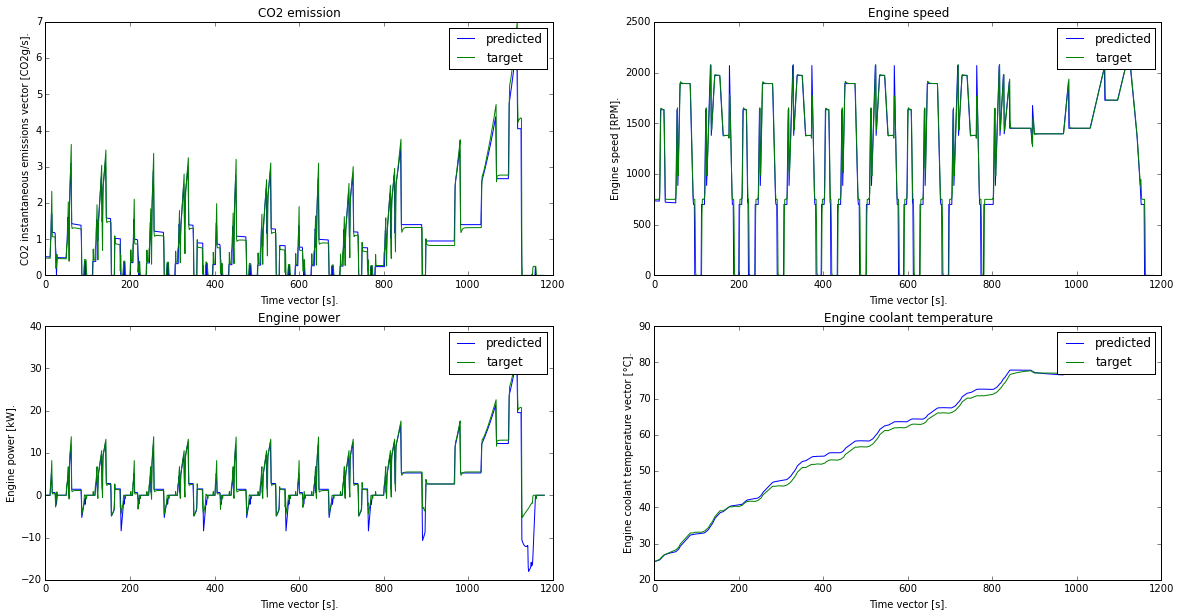

In [13]:
from co2mpas.functions.plot import plot_time_series

def init(data_id):
    x_predicted = ('predict_nedc', 'times') 
    y_predicted = {'id': ('predict_nedc', data_id), 'label': 'predicted'}
    target = {'y': nedc_targets[data_id], 'label': 'target'}
    return x_predicted, y_predicted, target

plt.figure(figsize=(20, 10))
plt.subplot(221)
plot_time_series(dsp, *init('co2_emissions'), title='CO2 emission')

plt.subplot(222)
plot_time_series(dsp, *init('engine_speeds_out'), title='Engine speed')

plt.subplot(223)
plot_time_series(dsp, *init('engine_powers_out'), title='Engine power')

plt.subplot(224)
plot_time_series(dsp, *init('engine_coolant_temperatures'), title='Engine coolant temperature')

### Get intermediate results

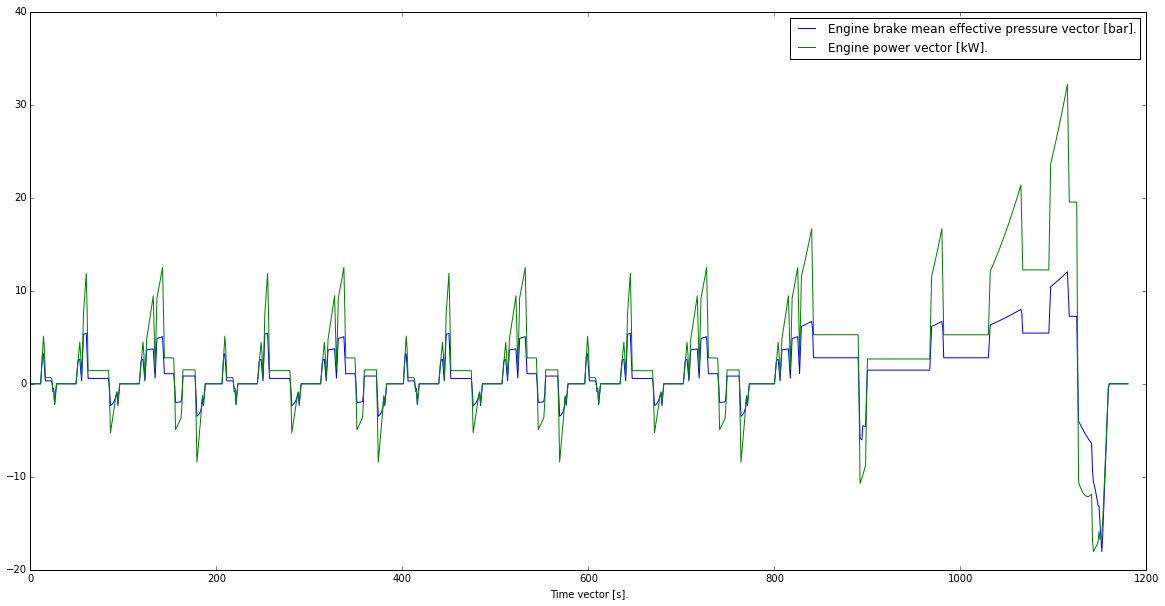

In [14]:
n_temp = ('predict_nedc', 'engine_model', 'CO2_emission_model', 'brake_mean_effective_pressures')
e_power = ('predict_nedc', 'engine_model', 'CO2_emission_model', 'engine_powers_out')
x = ('predict_nedc', 'times')
plt.figure(figsize=(20,10))
plot_time_series(dsp, x, n_temp, e_power, y_label='')

## Dispatcher workflow

### Visualize CO2MPAS model workflow

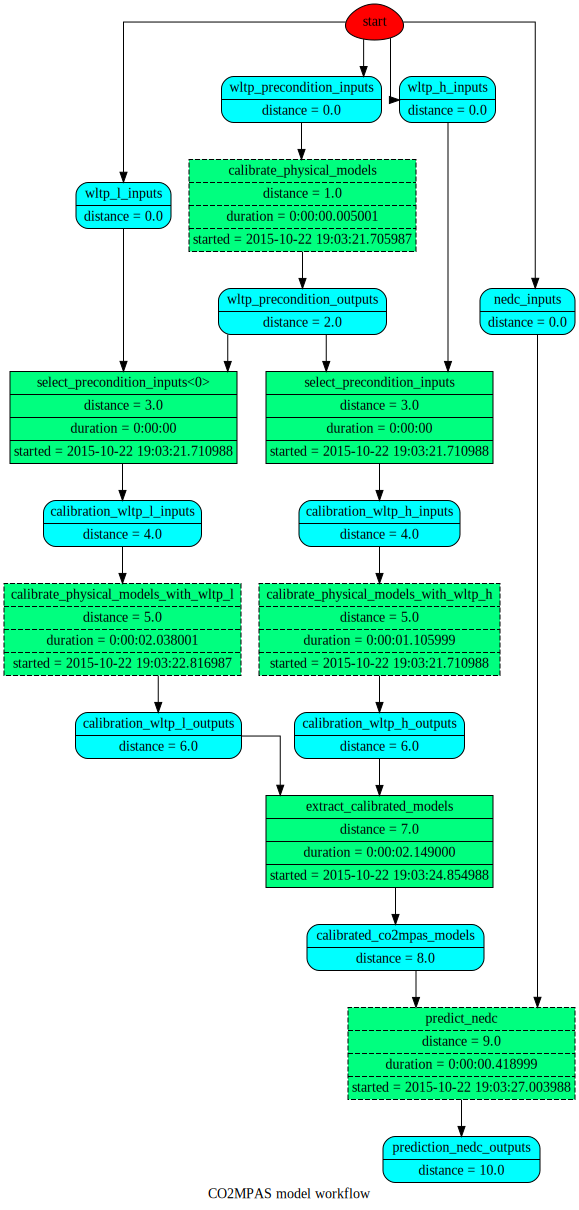

In [15]:
dsp.plot(depth=0, workflow=True, node_output=False, view=False)

### Visualize intermediate workflow

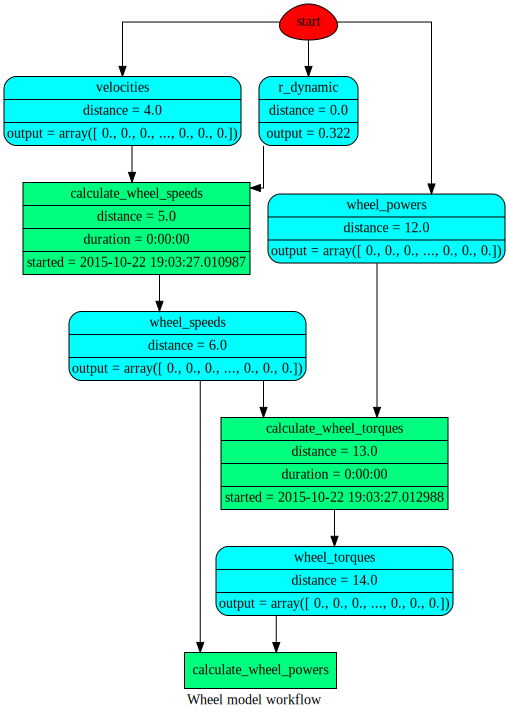

In [16]:
sub_dsp = dsp.get_node('predict_nedc', 'wheels_model')
sub_dsp.plot(depth=0, workflow=True, node_output=True, view=False)